# Mercedes-Benz Greener Manufacturing
Can you cut the time a Mercedes-Benz spends on the test bench?

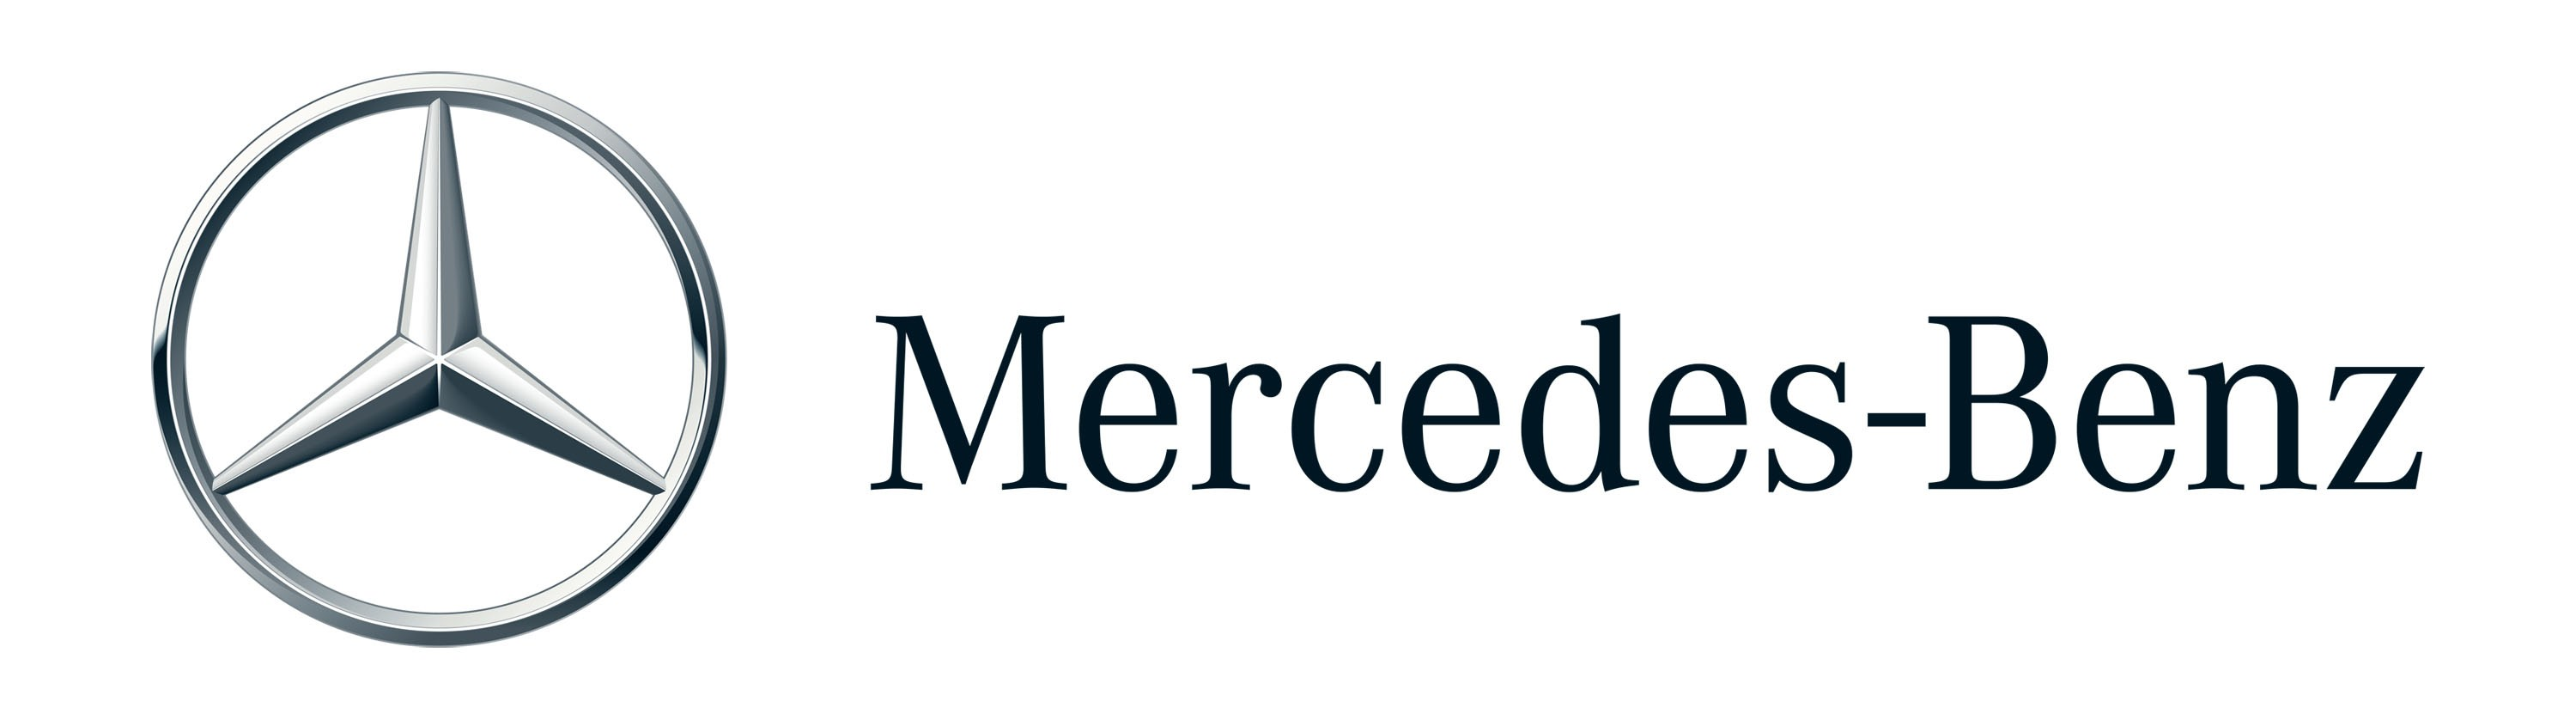

# Content

# EDA Analysis of Mercedes Benz Greener Manufacturing

## 1. Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Shape of Train data: {}'.format(train.shape))
print('Shape of Test data: {}'.format(test.shape))

Shape of Train data: (4209, 378)
Shape of Test data: (4209, 377)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
train.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [5]:
test.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1     0     0     0   
2   3  az  v  as  f  d  a  j  j    0  ...     0     0     0     1     0     0   
3   4  az  l   n  f  d  z  l  n    0  ...     0     0     0     1     0     0   
4   5   w  s  as  c  d  y  i  m    0  ...     1     0     0     0     0     0   

   X382  X383  X384  X385  
0     0     0     0     0  
1     0     0     0     0  
2     0     0     0     0  
3     0     0     0     0  
4     0     0     0     0  

[5 rows x 377 columns]

## 2. Analysis of ground truth values

### 2.1 Checking distribution of Testing Time 

In [6]:
print('75th Percentile value of test time is: ',np.percentile(train['y'],75))
print('='*50)
print('Mean value of test time is: {}'.format(train['y'].mean()))
print('='*50)
print('25th Percentile value of test time is: ',np.percentile(train['y'],25))

75th Percentile value of test time is:  109.01
Mean value of test time is: 100.66931812782121
25th Percentile value of test time is:  90.82


Text(0, 0.5, 'Time (secs)')

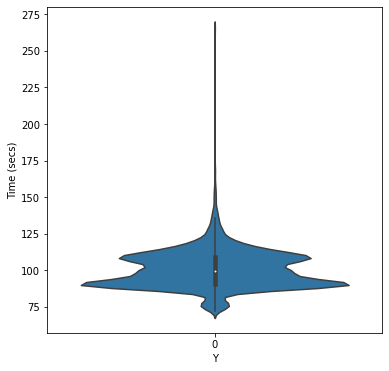

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
sns.violinplot(data=train['y'])
plt.xlabel('Y')
plt.ylabel('Time (secs)')

<h5>Above plot shows us that there are outliers becuase of its long tail. Violin plot have two hills means that our data has most of the distributions falling in these two regions which are around our mean.<h5/>

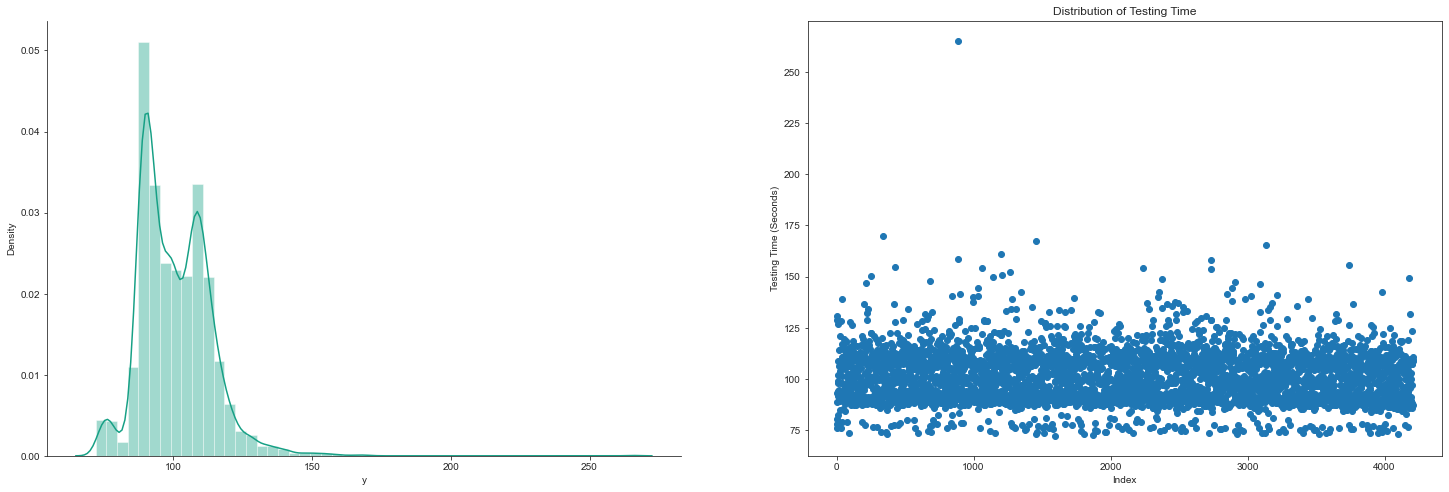

In [8]:
%matplotlib inline
sns.set_style('ticks')
plt.figure(figsize=(25,8))
plt.subplot(121)
sns.distplot(train['y'], color='#16A085')
plt.xlabel('y')
sns.despine()
plt.subplot(122)
plt.scatter(range(len(train['y'])), train['y'])
plt.title("Distribution of Testing Time")
plt.xlabel("Index")
plt.ylabel("Testing Time (Seconds)")
plt.show()

### Observation

We can infer from this observation that most of the data points lies in range of 75 to to 125 secs with mean as 100.66 secs.

### 2.2 Handling Outliers

In [9]:
for i in range(0,11):
    print(90+i,'Percentile value is',np.percentile(train['y'],90+i))

90 Percentile value is 115.25
91 Percentile value is 116.04840000000002
92 Percentile value is 116.89160000000001
93 Percentile value is 118.0376
94 Percentile value is 119.056
95 Percentile value is 120.806
96 Percentile value is 122.4
97 Percentile value is 125.89319999999998
98 Percentile value is 129.2992
99 Percentile value is 137.43040000000002
100 Percentile value is 265.32


In [10]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(train['y'],99+(i/100)))

99.1 percentile value is 139.09024
99.2 percentile value is 140.18360000000004
99.3 percentile value is 140.81639999999993
99.4 percentile value is 142.6480000000001
99.5 percentile value is 146.2304000000001
99.6 percentile value is 149.0374399999998
99.7 percentile value is 151.4276800000003
99.8 percentile value is 154.68695999999994
99.9 percentile value is 160.38328000000087
100.0 percentile value is 265.32


In [11]:
y_limit = 155
ind = train[train.y > y_limit].index
print(ind)

Int64Index([342, 883, 889, 1203, 1459, 2735, 3133, 3744], dtype='int64')


In [12]:
train = train.drop(index = train[train.y > y_limit].index)
train.shape

(4201, 378)

### Observation

1. From the above percentiles we can observe the fact that there is one outlier point which is very large and it should be removed from the data.


2. We can take 155 seconds as our threshold value after which all the points greater than this threshold value can be trated as the outlier points.

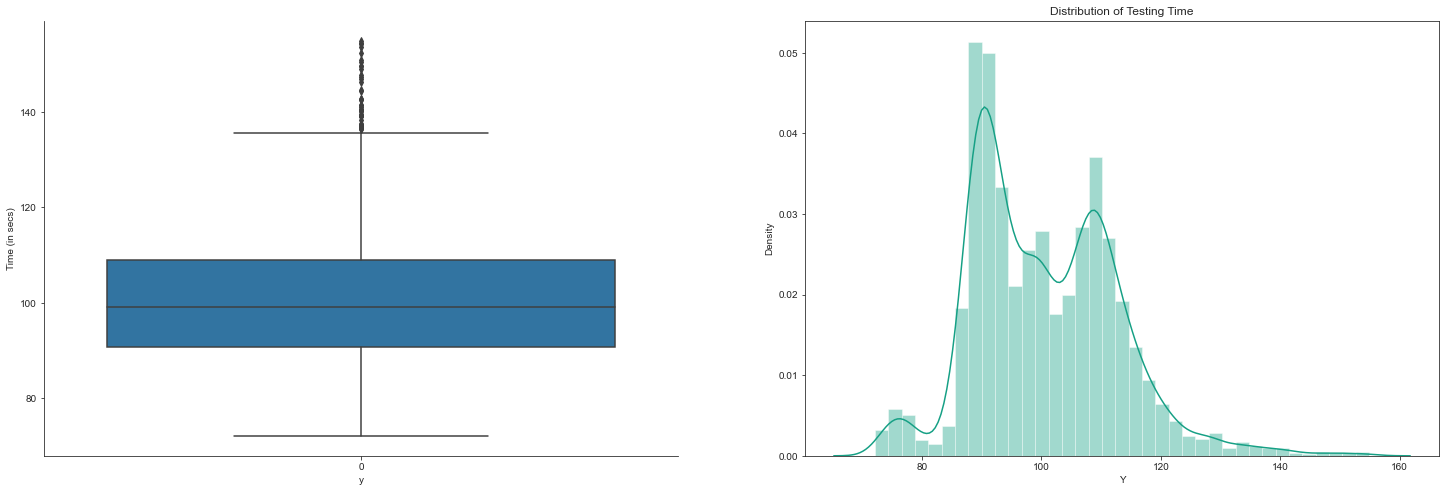

In [13]:
%matplotlib inline
sns.set_style('ticks')
plt.figure(figsize=(25,8))
plt.subplot(121)
sns.boxplot(data=train['y'])
plt.xlabel('y')
plt.ylabel("Time (in secs)")
sns.despine()
plt.subplot(122)
sns.distplot(train['y'], color='#16A085')
plt.title("Distribution of Testing Time")
plt.xlabel("Y")
plt.ylabel("Density")
plt.show()

### Observation

We can now see that the outliers are removed from the test times of the train set and test set and data is now not skewed.

## 3. Handling Missing Values

### 3.1 Checking the Null values in dataset

In [14]:
isNan_train = train.isnull().sum().any()
isNan_test = test.isnull().sum().any()

if isNan_train == True:
    print("There are NaN values in the Train dataset")
else:
    print("There are No NaN values in the Train dataset")
    
if isNan_test == True:
    print("There are NaN values in the Test dataset")
else:
    print("There are No NaN values in the Test dataset")

There are No NaN values in the Train dataset
There are No NaN values in the Test dataset



### 3.2 Checking the duplicate values in dataset

In [15]:
isDup_train = train.duplicated().sum().any()
isDup_test = test.duplicated().sum().any()

if isDup_train == True:
    print("There are Duplicate rows in the Train dataset")
else:
    print("There are No Duplicate rows in the Train dataset")

if isDup_test == True:
    print("There are Duplicate rows in the Test dataset")
else:
    print("There are No Duplicate rows in the Test dataset")

There are No Duplicate rows in the Train dataset
There are No Duplicate rows in the Test dataset


#### Observation

There are no duplicate data and no missing values in train and test data

## 4. Analyzing Categorical Data

### 4.1 Checking the total number of rows having each customization

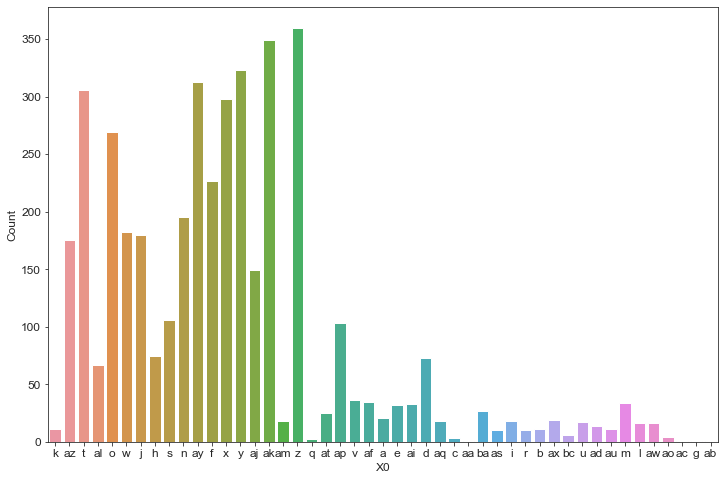

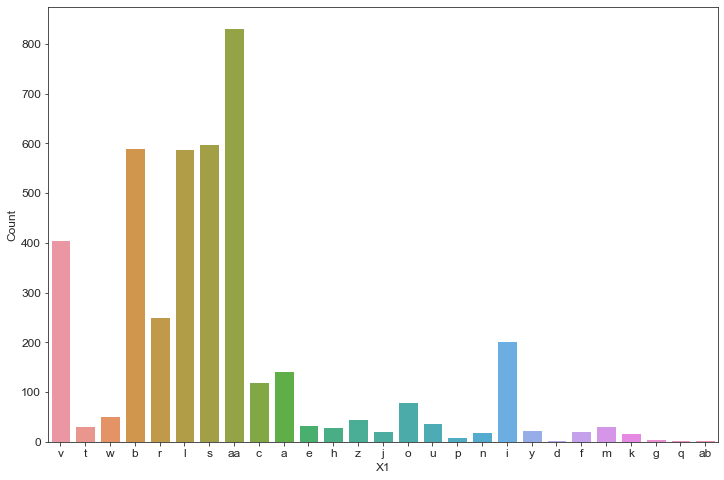

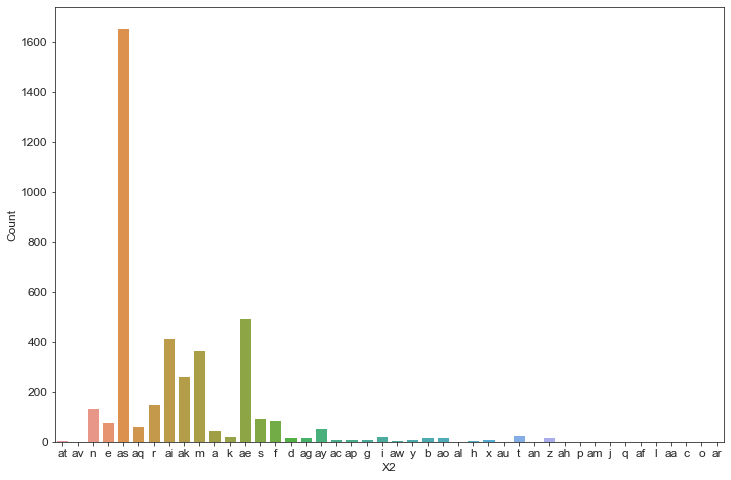

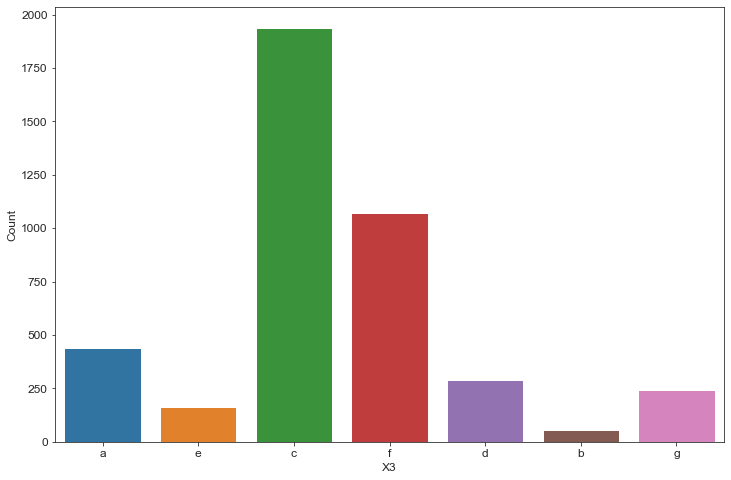

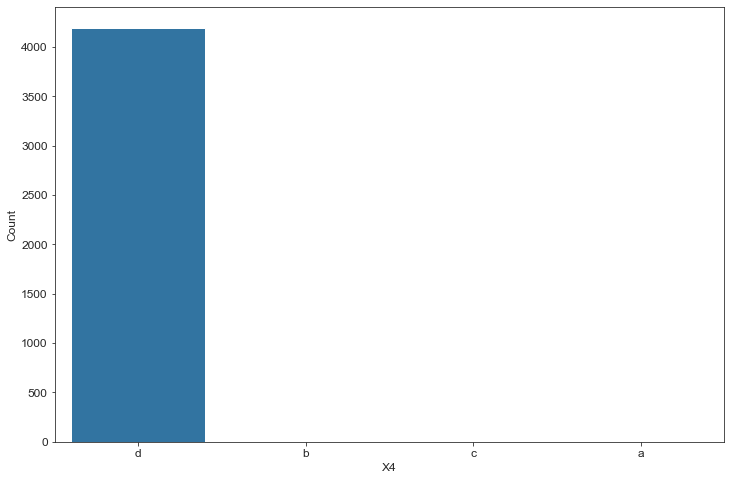

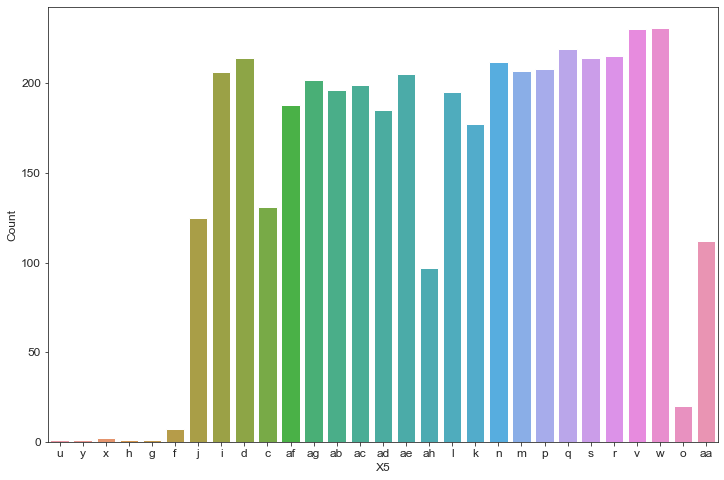

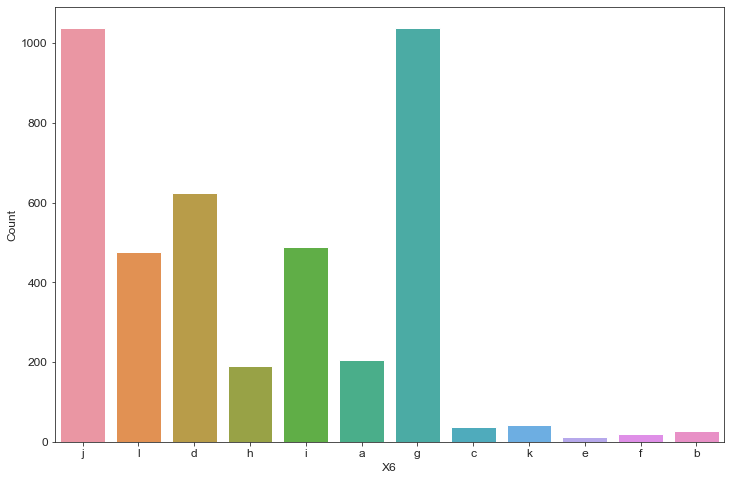

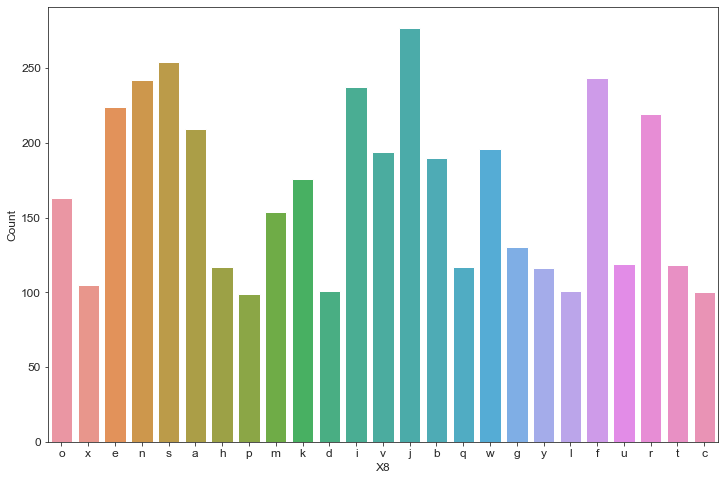

In [16]:
cat_features = train.columns[train.dtypes == 'object']

for col in cat_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,8 )
    sns.countplot(data=train, x=col) 
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)
    plt.show()

### Observation

1. We can observe that X0 , X5 and X8 are the features that are having a large variety of data in it and hence they can be very useful for feature attraction.


2. X4 consists of only the vehicles which have only one customization anonymously named as 'd' and hence the variance is very low and it could not provide us with much information.




### 4.2 Checking the time taken by each customization given a feature

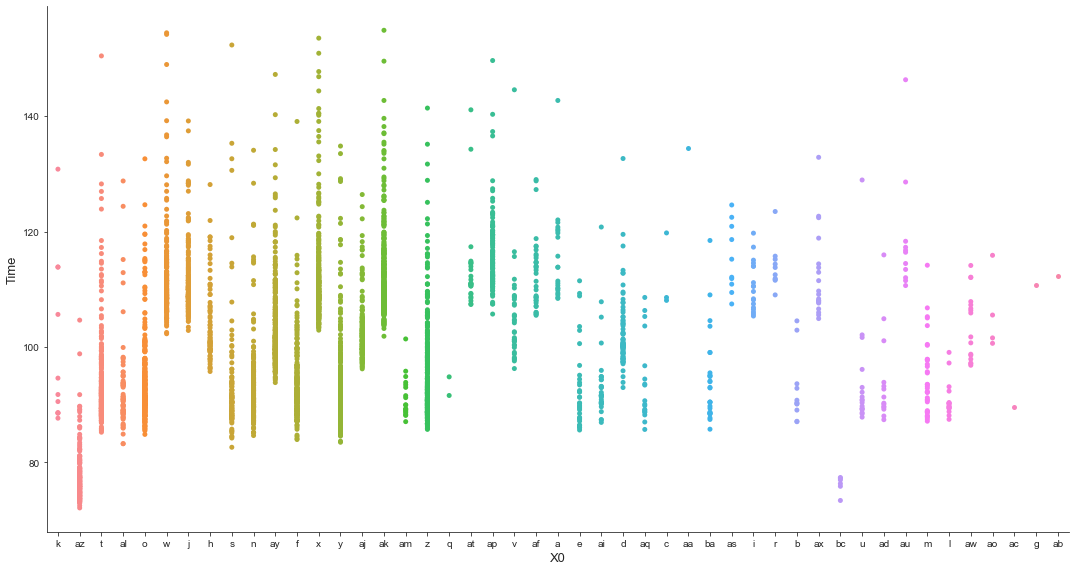

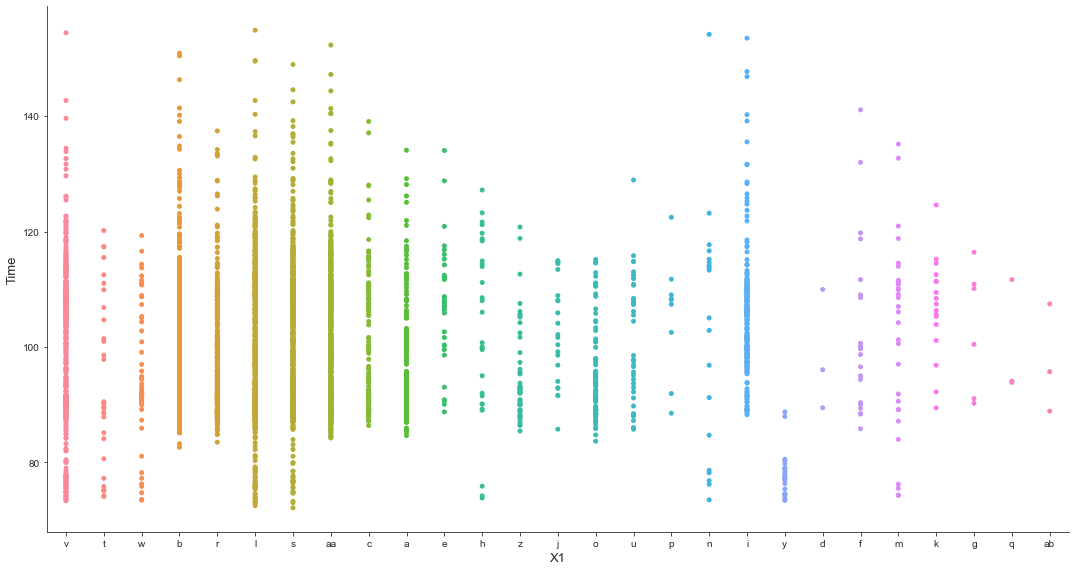

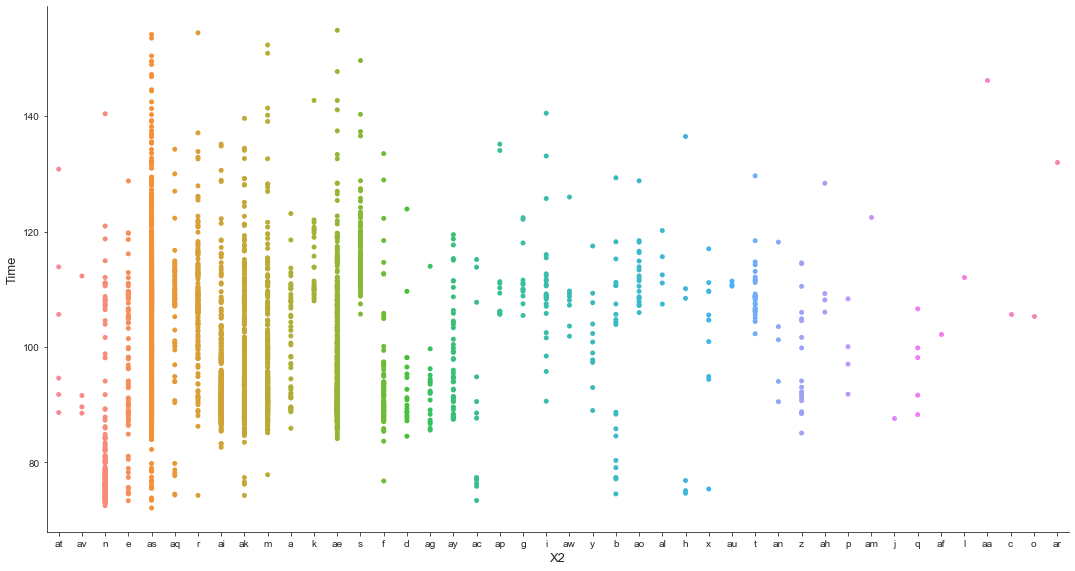

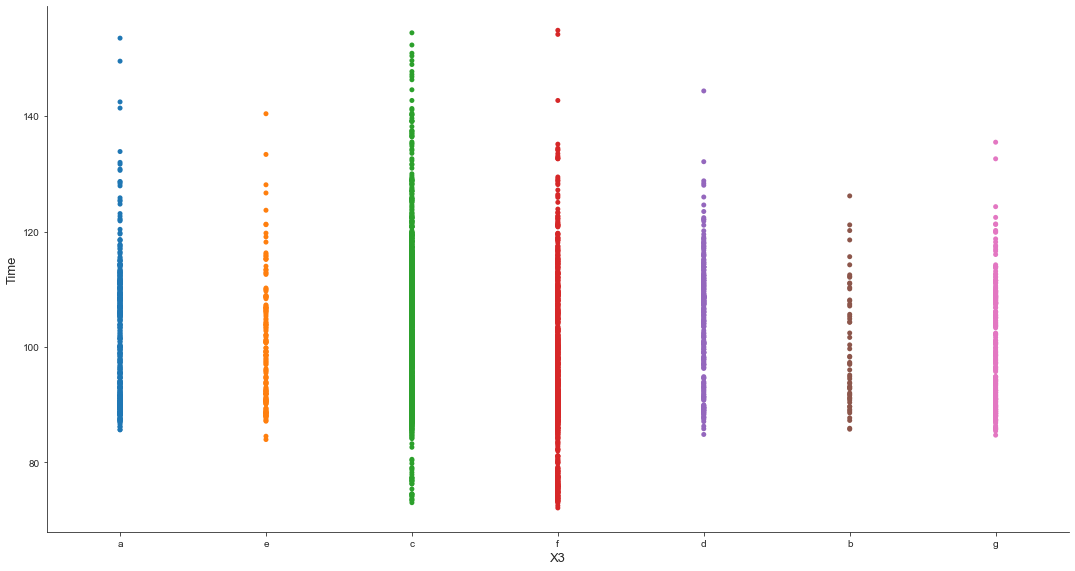

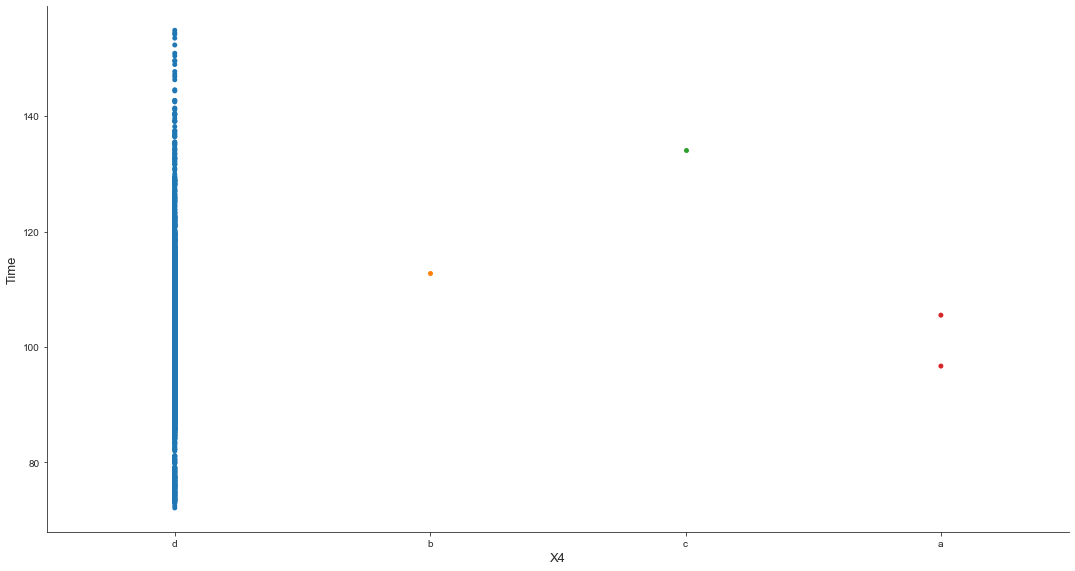

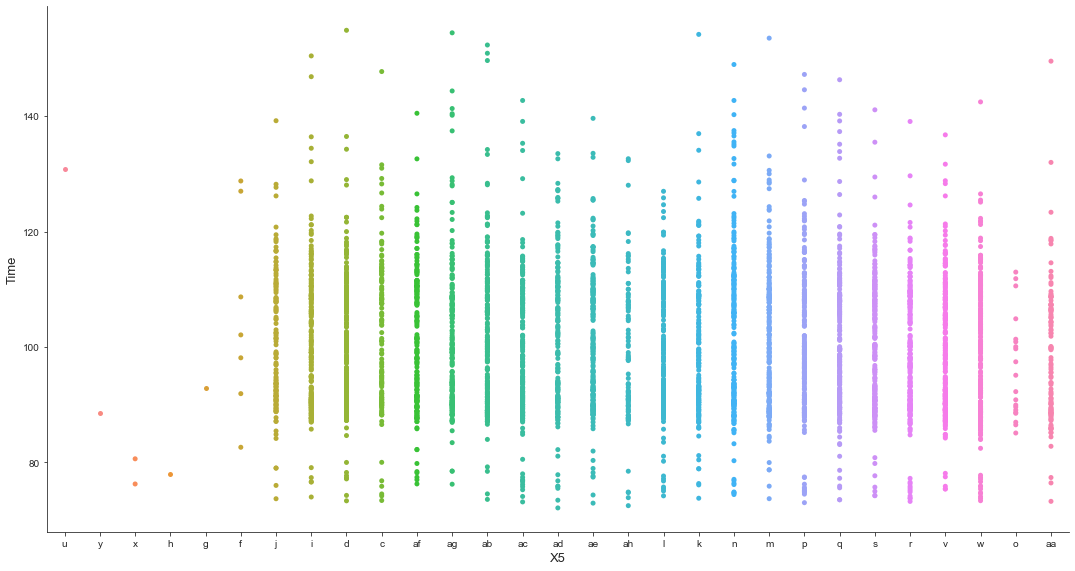

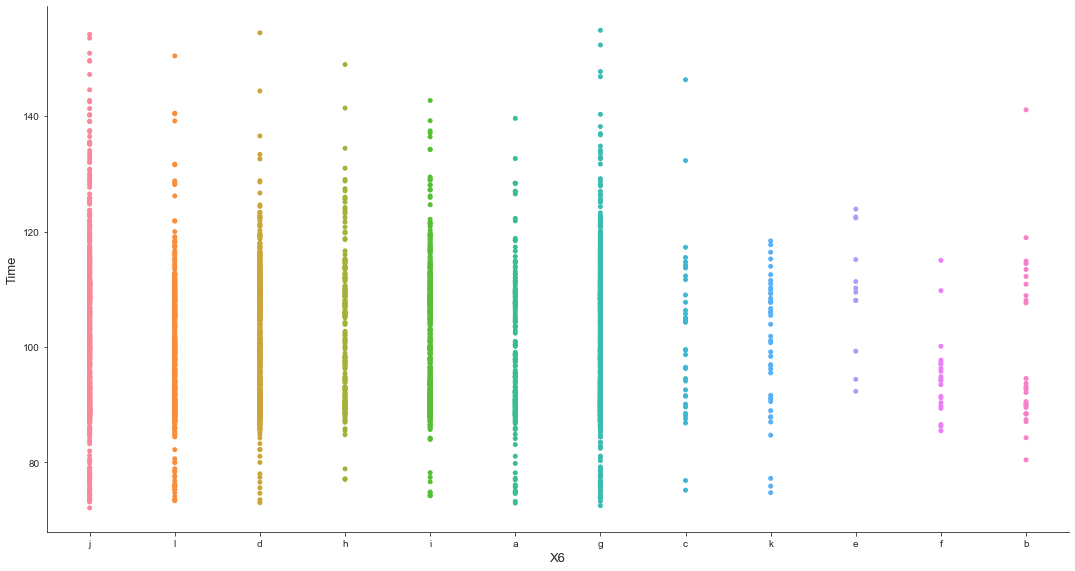

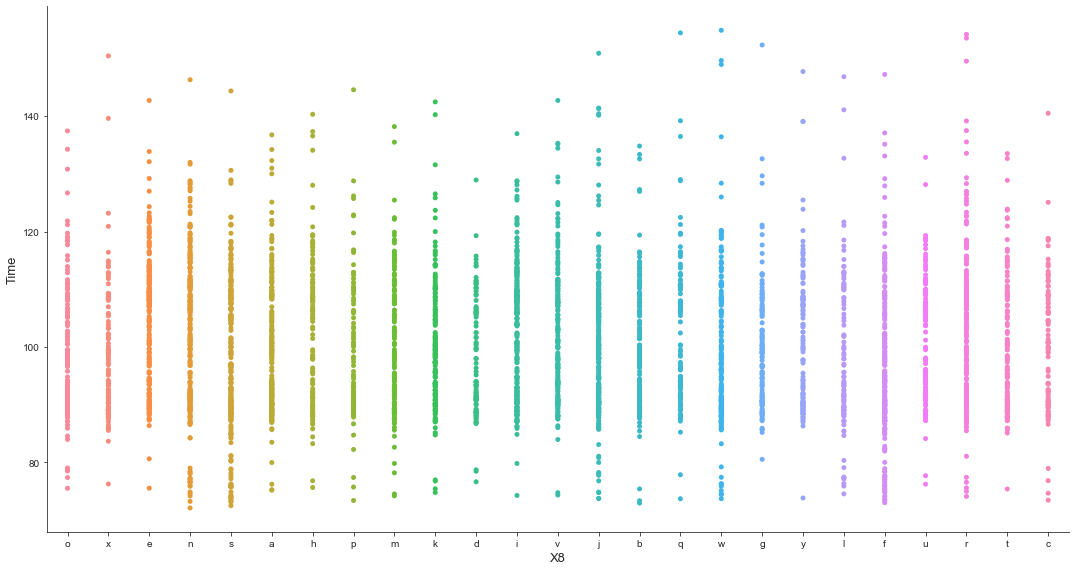

In [17]:
for col in cat_features:
    sns.catplot(ax=ax,data=train,x=col,y='y',jitter=False,height=8, aspect=15/8)
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Time', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    sns.despine()

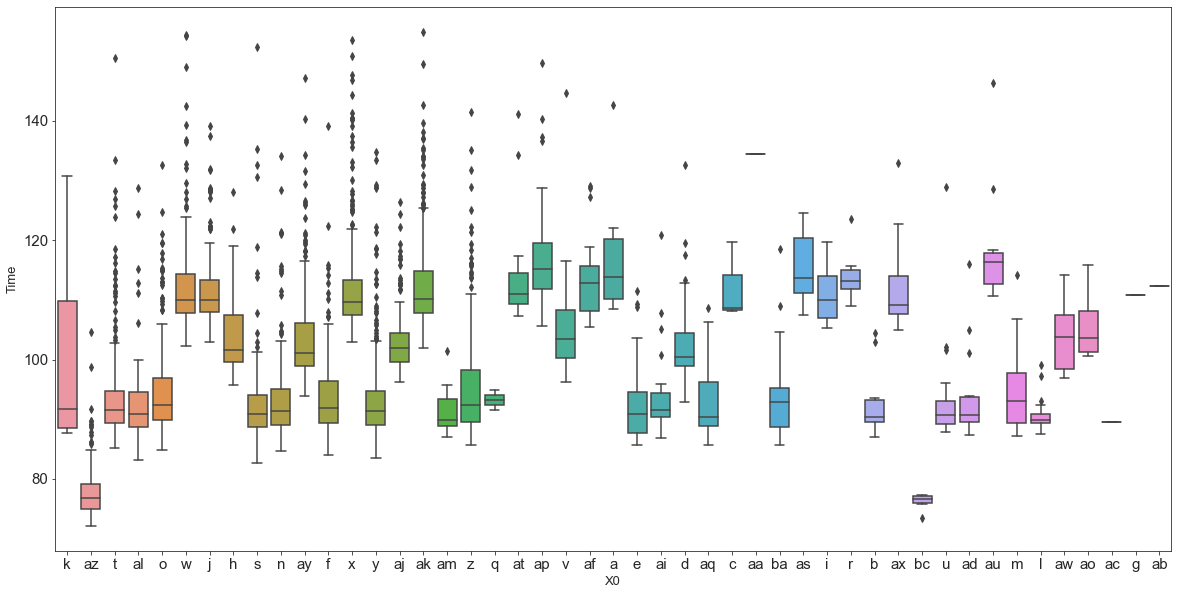

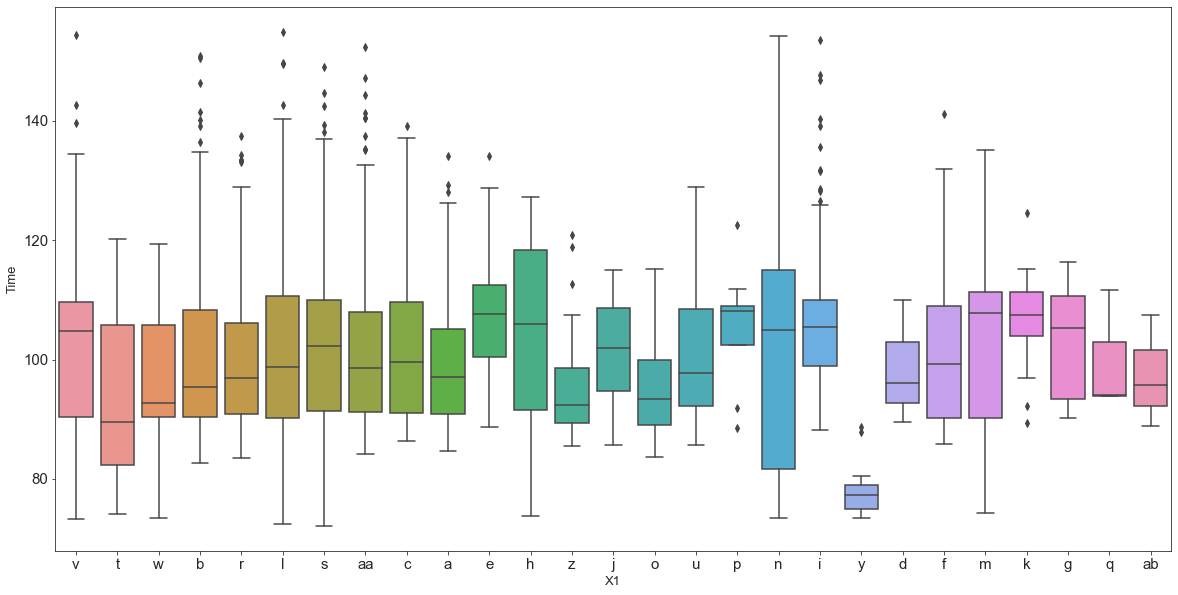

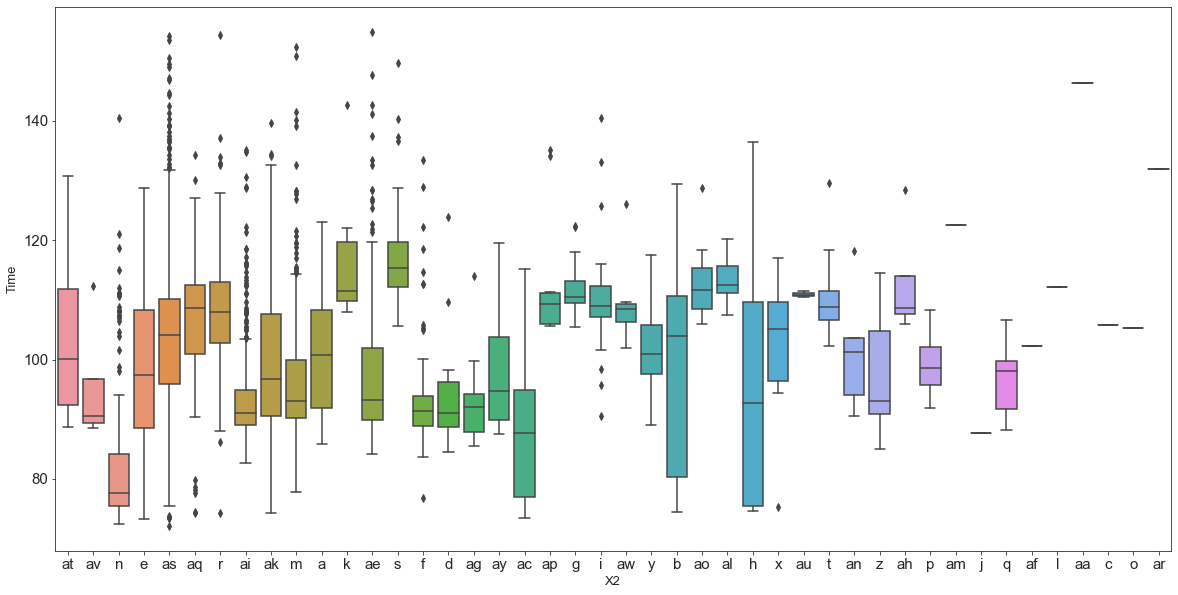

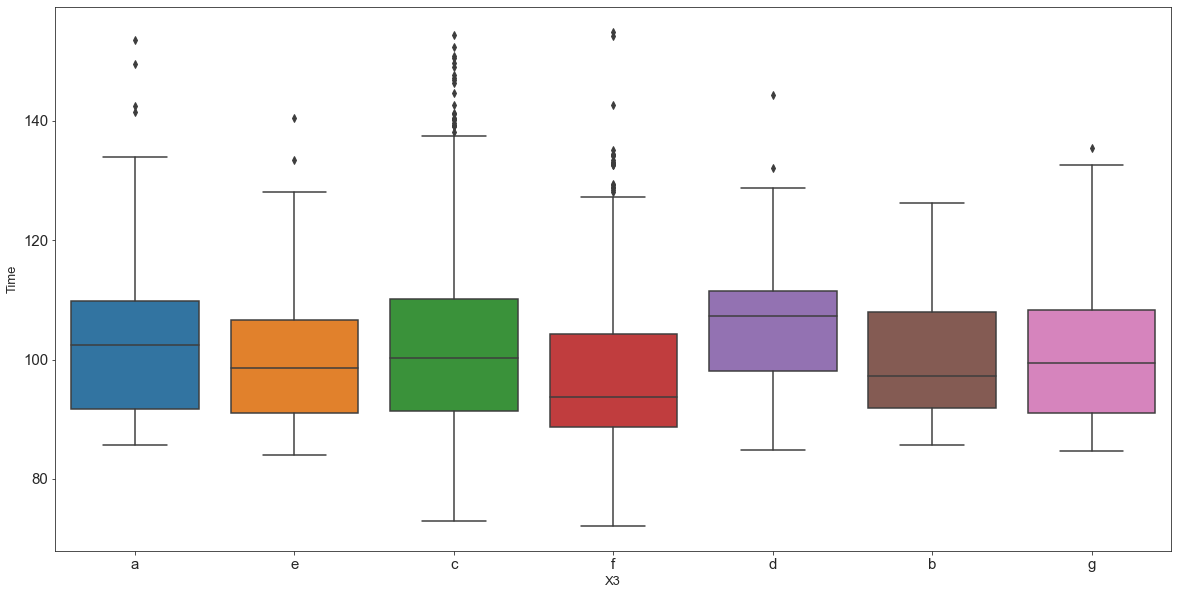

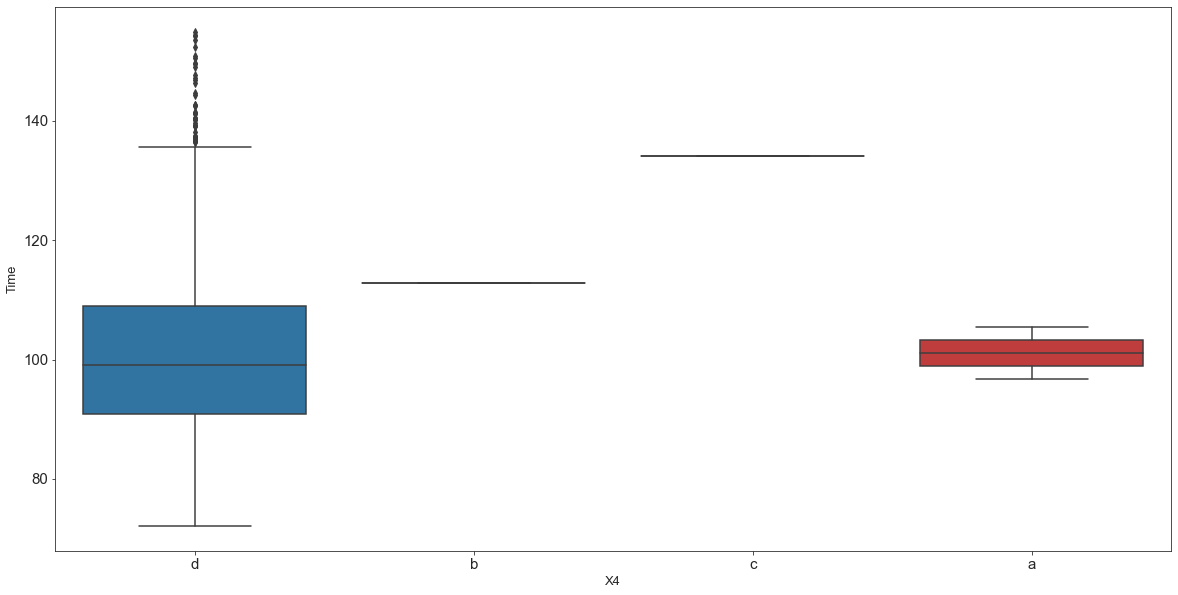

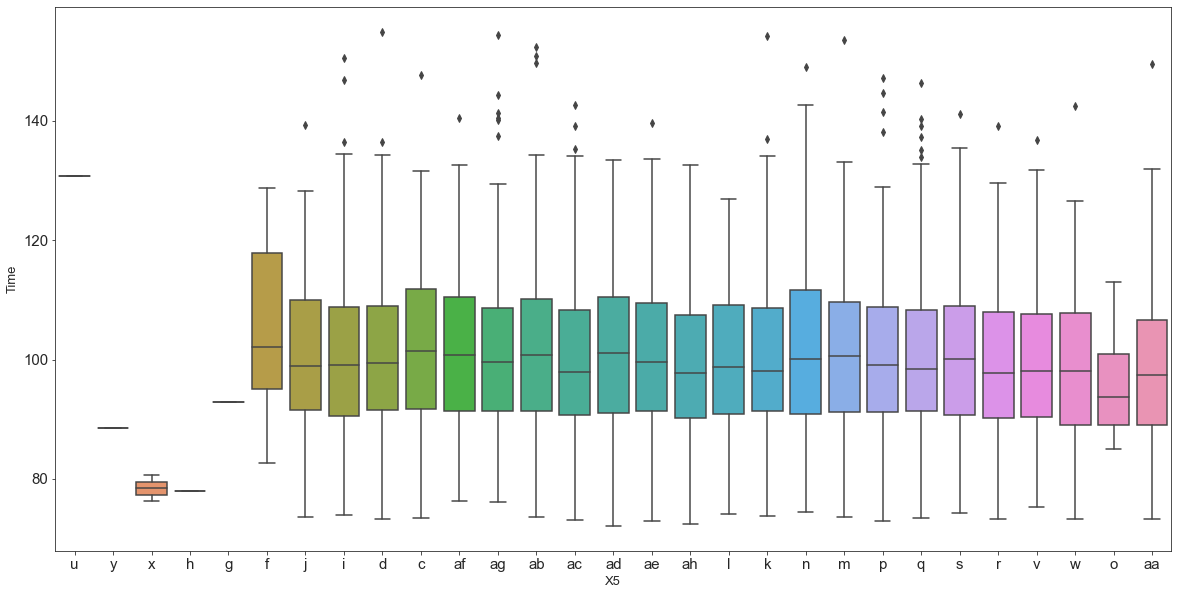

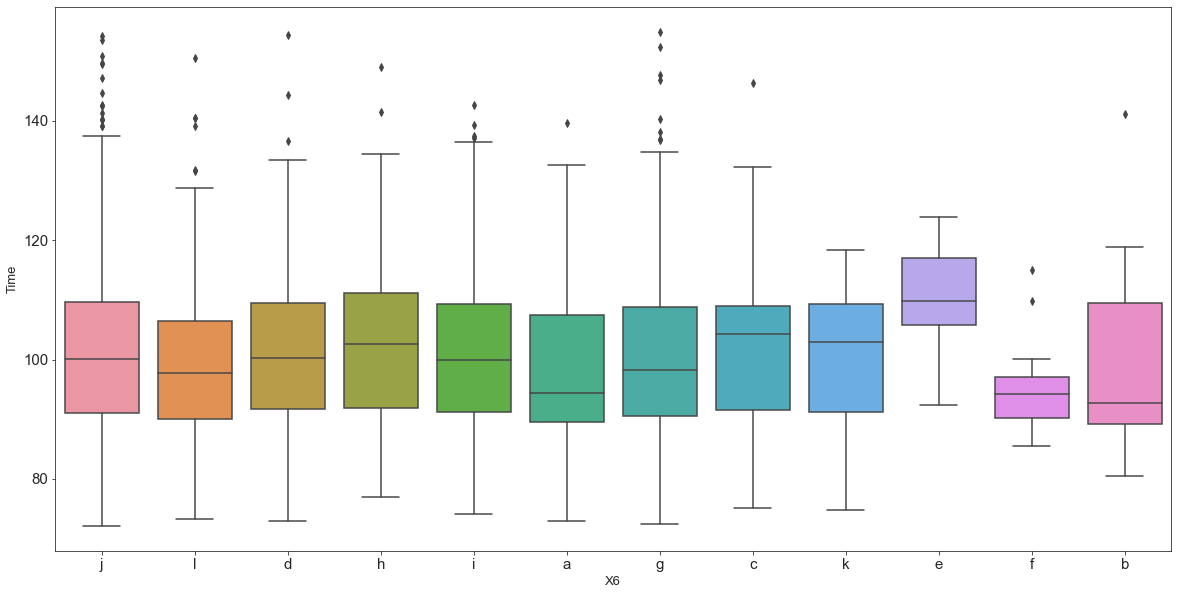

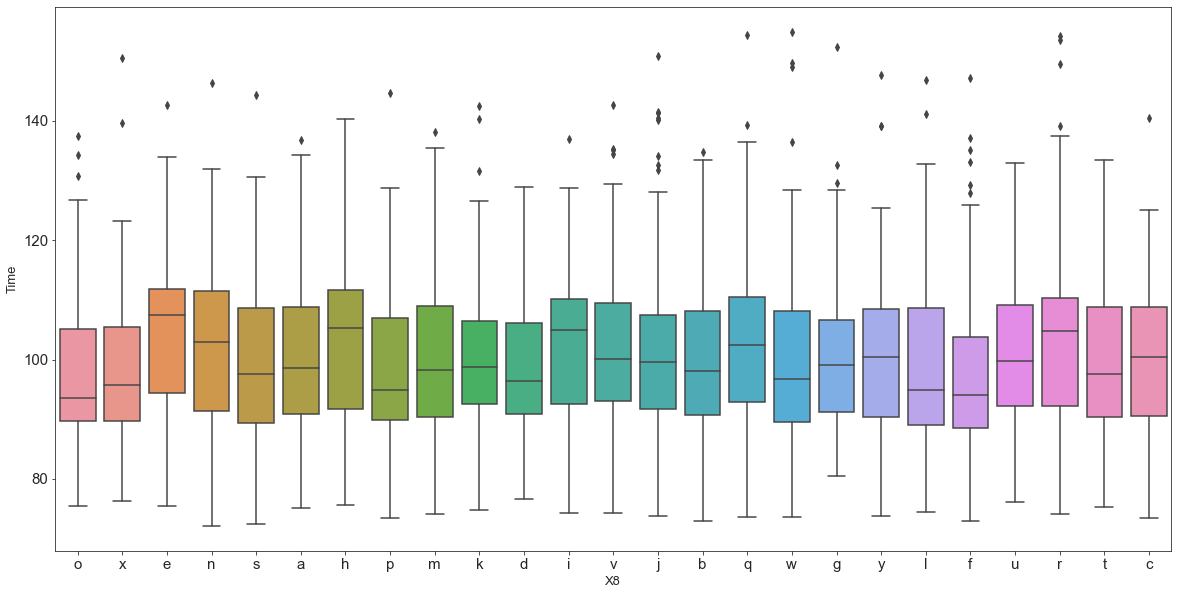

In [18]:
for col in cat_features:
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10 )
    sns.boxplot(x=train[col],y=train['y'])
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Time', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)

### Observation

A. When we observe the box plots of X0 we can clearly see that az and bc are two customizations that are not overlapping with the other customizations and hence they can be grouped as seperate entities. 


    1. Customizations like (s,n,f and y) and (b , u, ad) are all having the same distribution of time. So we can infer from this that maybe the customizations are different in their behaviours but may take same test time.
    
    
    2. Some customizations like k have very large distribution of test time and it concludes that these type of customizations are crucial and they may take large time or may end up early according to the vehicle model.
    
    
    
B. In X1 and X5 all the customizations have almost same distribution except 'v' in X1 and 'x' in X5. X6 and X8 have same distributed customizations.


C. X4 has very less variance and it can be removed as it is not providing that much of the information.

### 4.3 Checking the total test time in hours that each customization took from every row

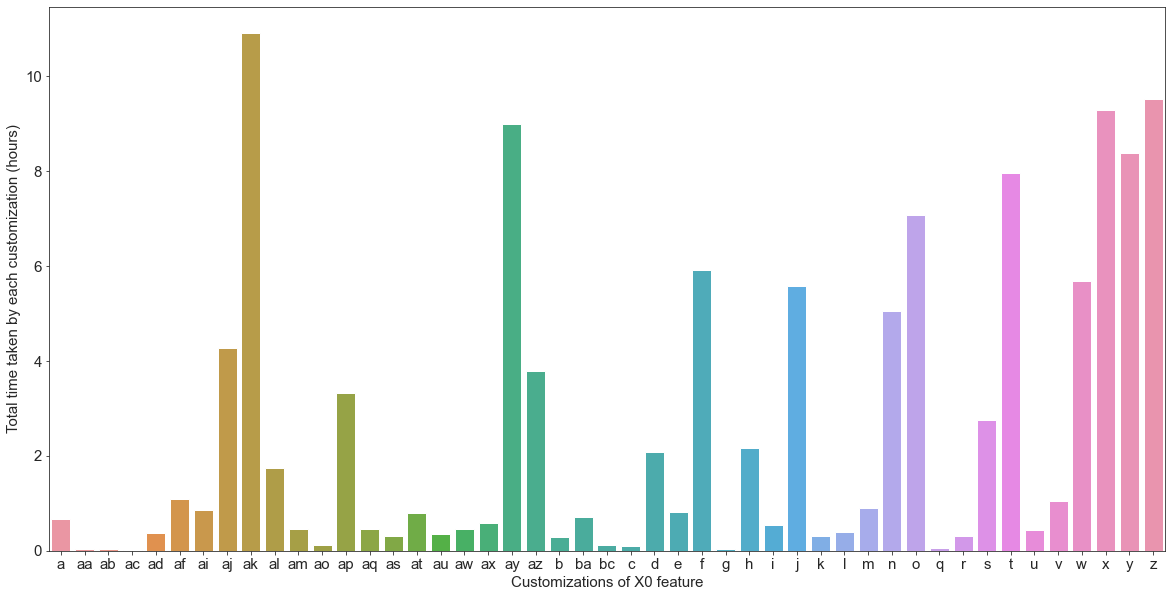

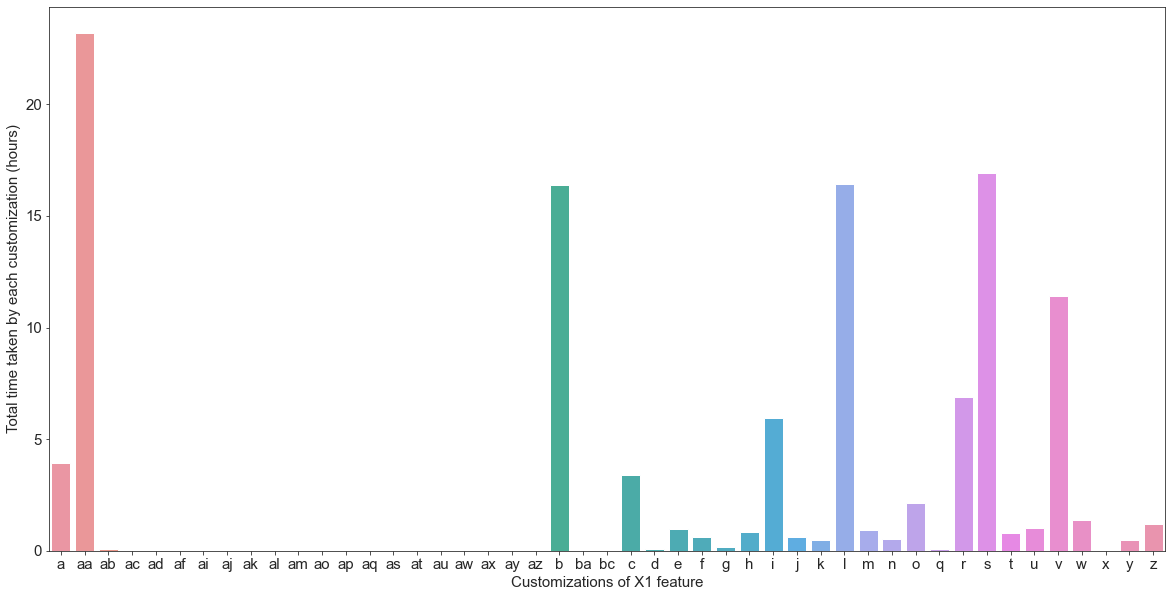

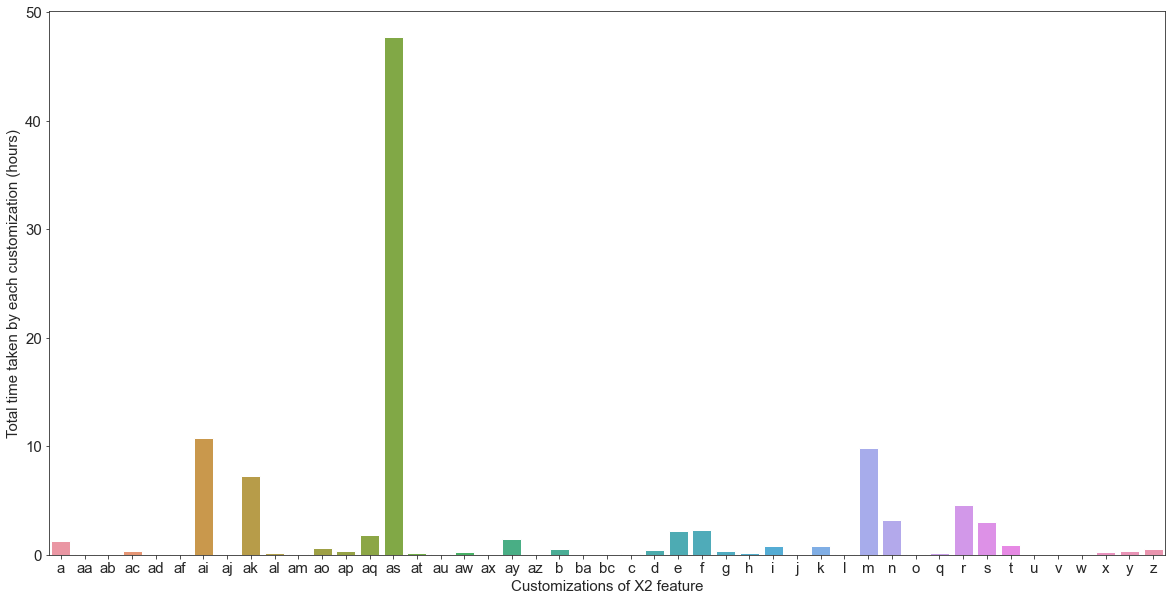

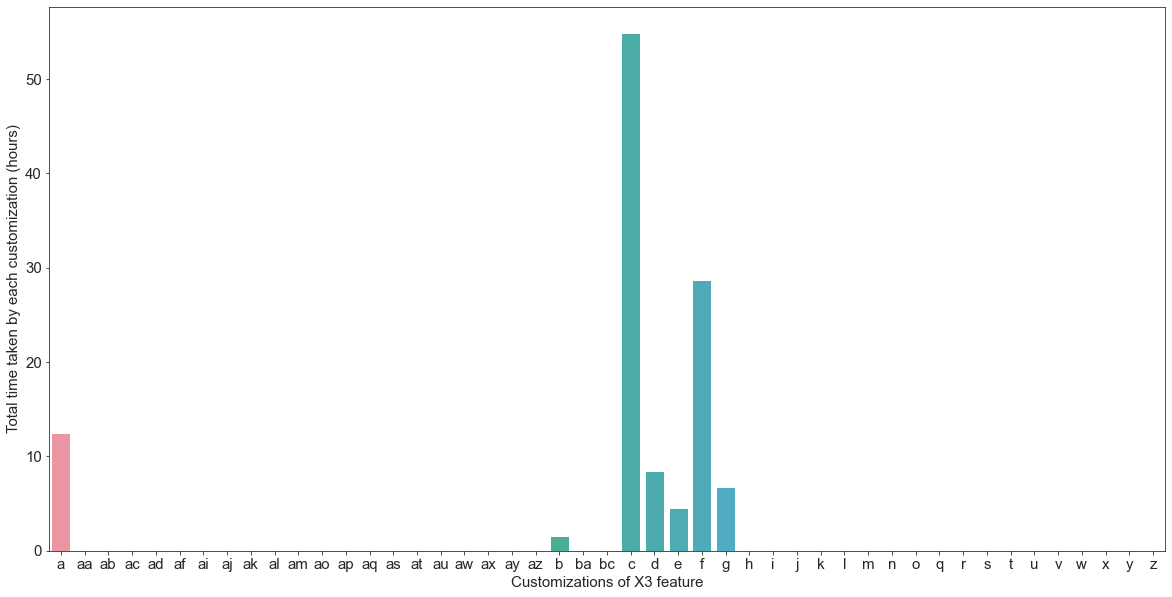

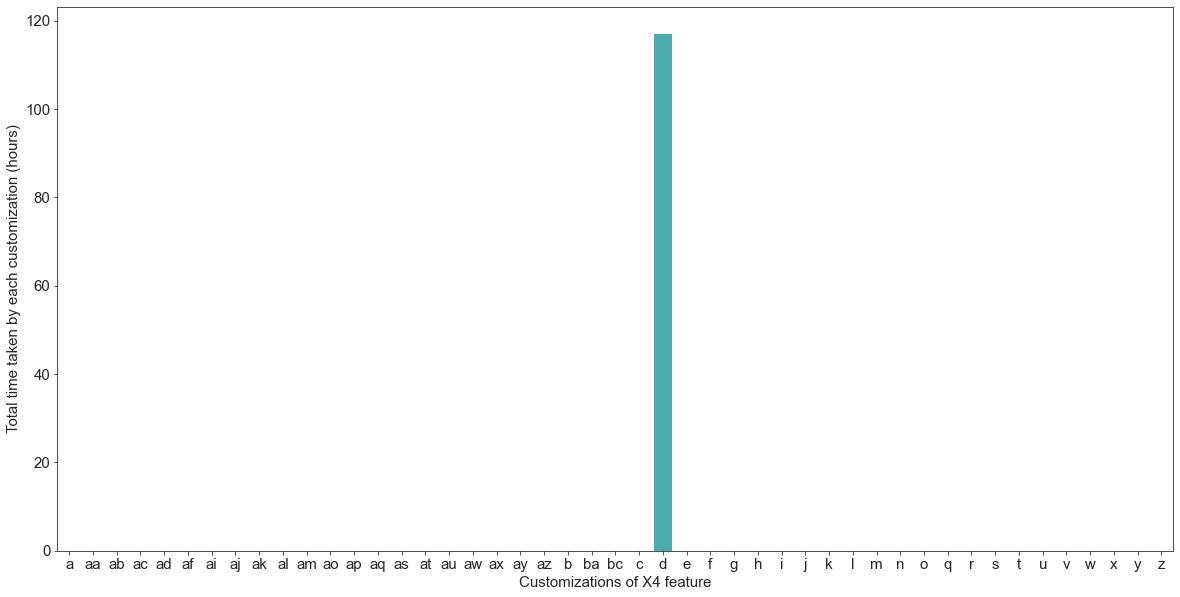

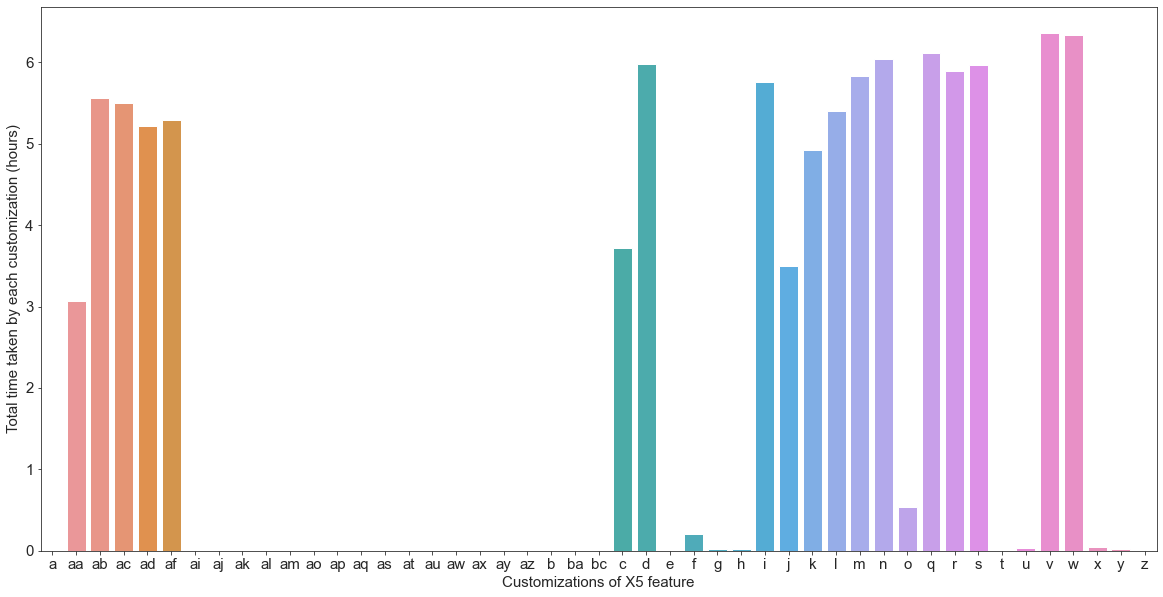

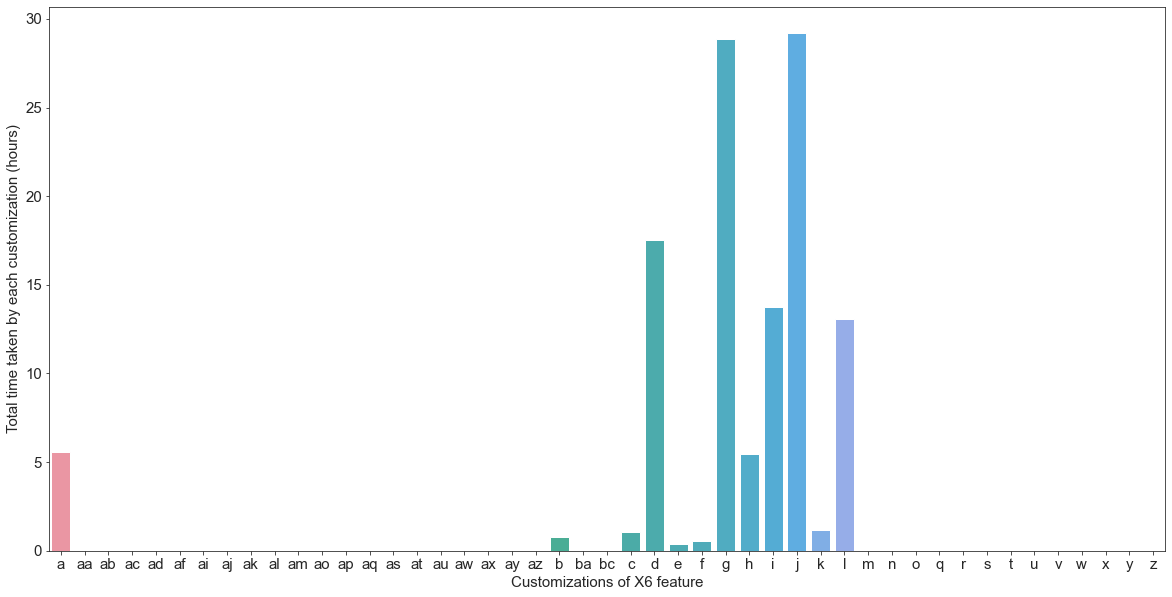

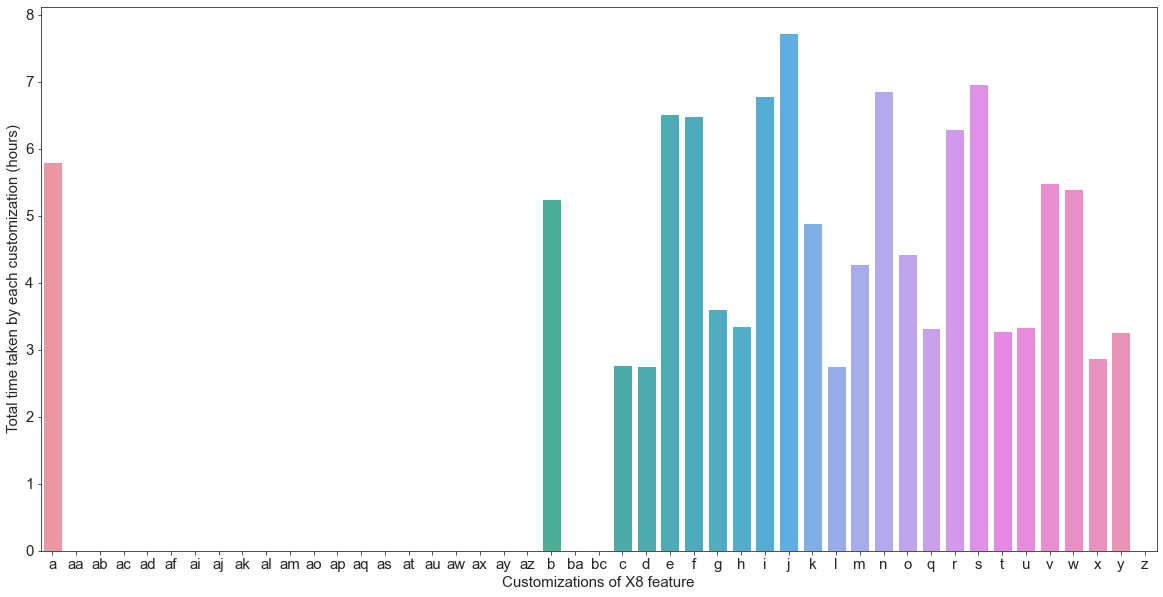

In [19]:
temp = pd.DataFrame(train.groupby('X0'))
for col in cat_features.astype('category'):
    sum_cust = {}
    for cust in temp.iloc[:,0]:
        sum = train['y'][train[col]== cust].sum()
        sum_cust[cust]=sum
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10 )
    result = {key: value / 3600 for key, value in sum_cust.items()}
    keys,values = result.keys(),result.values()
    sns.barplot(x = list(keys), y = list(values))
    plt.xlabel('Customizations of ' + str(col) + ' feature',fontsize=15)
    plt.ylabel('Total time taken by each customization (hours)',fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.show()

### Observation

1. From all of the plots it is observed that in feature X4 customization 'd' in total is taking very large amount of time upto 120 hrs. This is due the fact that almost all vehicles (4000 in count) consists of customization 'd' and also the test time of customization 'd' is also very large hence ending up with such a large total time.


2. In feature X2 'as' took most of the time from all the customizations. Hence it can be concluded that customization 'as' is used in most of the vehicles when we are giving feature X2 to the vehicle.


3. In feature 'X3' total time taken by 'c' is more and hence this customization defines X3 more.

## 4.4 Visualizing Categorical features by t-SNE

In [26]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

def plot_tsne(train, col, perpex=30, iters=1000):
    
    labels = train[col].unique()
    final_data_appended = []
    for idx,custom in enumerate(labels):
        
        dat = train.groupby(col).get_group(custom)
        
        if col == 'X0':
            dat.drop([ 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X1':
            dat.drop([ 'X0', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X2':
            dat.drop([ 'X0', 'X1', 'X3', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X3':
            dat.drop([ 'X0', 'X1', 'X2', 'X4', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X4':
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X5':
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X4', 'X6', 'X8','ID','y'],axis=1,inplace=True)
        elif col == 'X6':
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X8','ID','y'],axis=1,inplace=True)
        else:
            dat.drop([ 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6','ID','y'],axis=1,inplace=True)
            
        dat.columns = dat.columns.str.replace(col, 'Labels')
        final_data_appended.append(dat)
    
    appended_data = pd.concat(final_data_appended).reset_index(drop=True)
    appended_data = shuffle(appended_data)

    data = appended_data.drop('Labels',axis=1)
    label = appended_data['Labels']
    standardized_data = StandardScaler().fit_transform(data)


    model = TSNE(n_components=2, perplexity= perpex,  n_iter = iters, random_state=0)
    # configuring the parameteres
    # the number of components = 2
    # default perplexity = 30
    # default learning rate = 200
    # default Maximum number of iterations for the optimization = 1000

    tsne_data = model.fit_transform(standardized_data)


    # creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, label)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    return tsne_df

## t-SNE for X0

#### Perpexility = 20

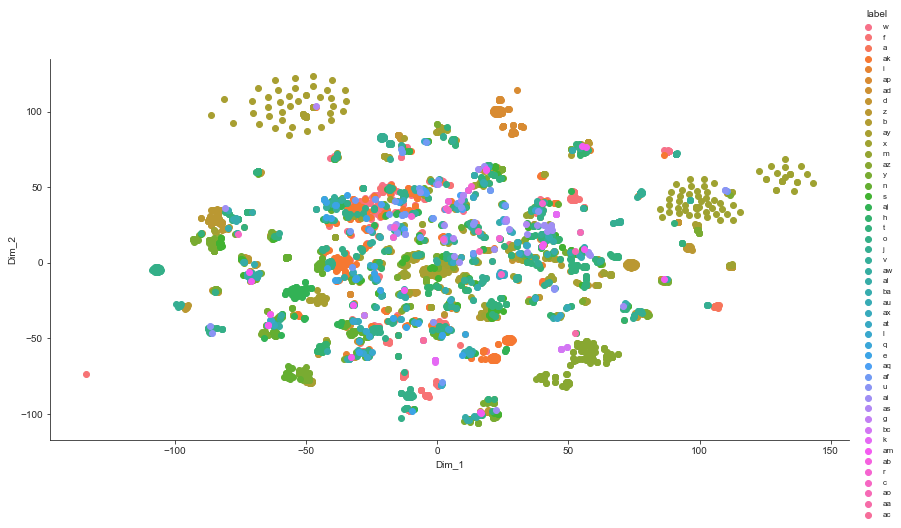

In [27]:
sns.FacetGrid(plot_tsne(train,'X0',20,1500), hue="label", height = 10 ,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

#### Perpexility = 30

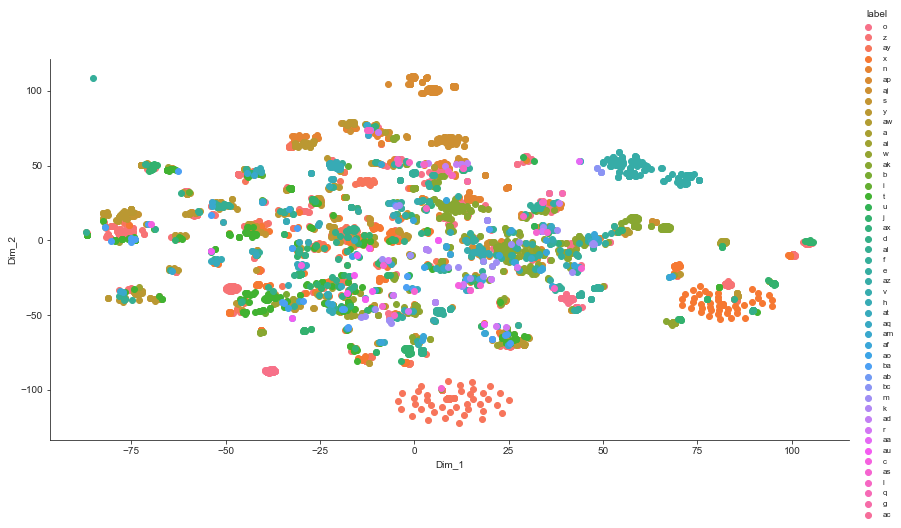

In [28]:
sns.FacetGrid(plot_tsne(train,'X0',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

#### Perpexility = 50

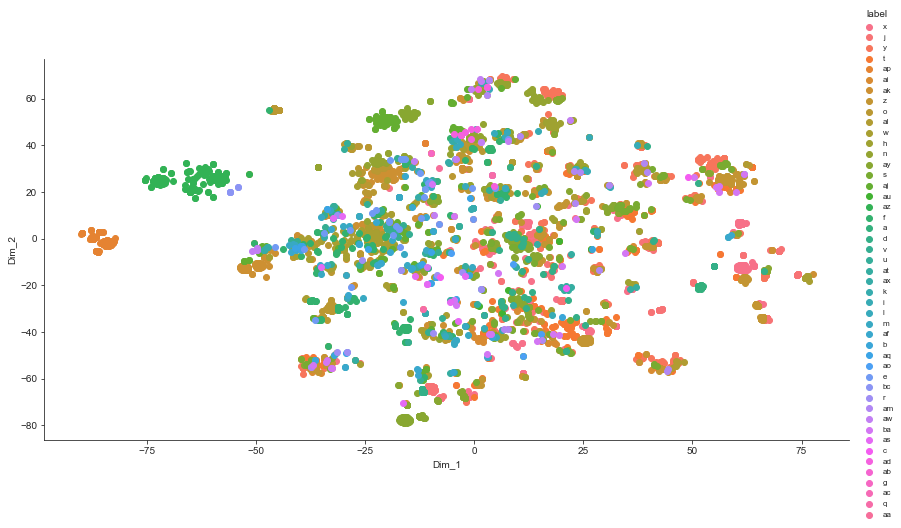

In [32]:
sns.FacetGrid(plot_tsne(train,'X0',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

#### Perpexility = 100

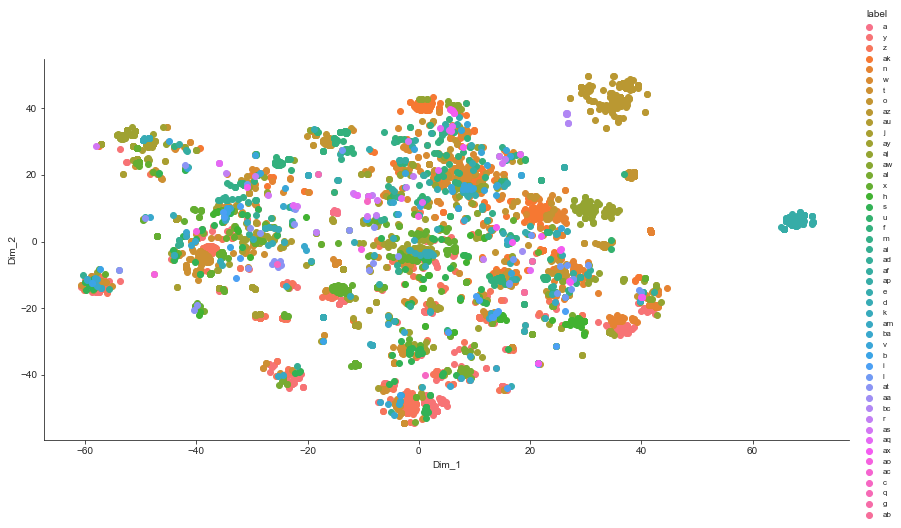

In [33]:
sns.FacetGrid(plot_tsne(train,'X0',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize= 8)
plt.show()

### Observation

1. Perplexity 20 gives us 2 clusters at the top left and at right side (ay) dark green in color. We can also observe from the previous plots that counts for 'ay' customization was maximum for feature X0, so maybe this customization is different from other customizations and can be seperated and is important for feature selection.


2. With perplexity 30 again we are getting a seperate cluster orange in color named as 'ay'.


3. Perplexity 50 and 100 are not making any sense.

## t-SNE for X1

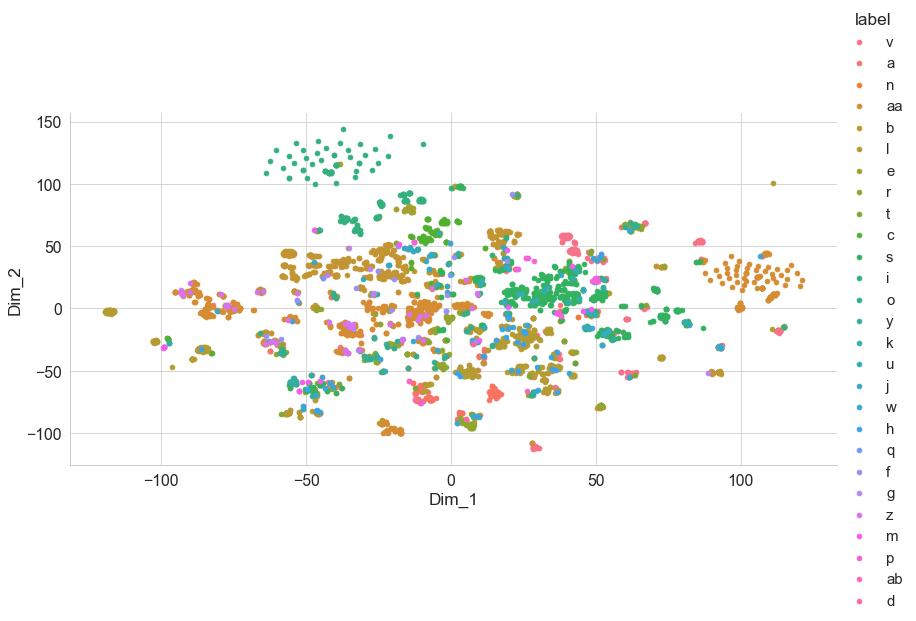

In [365]:
sns.FacetGrid(plot_tsne(train,'X1',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

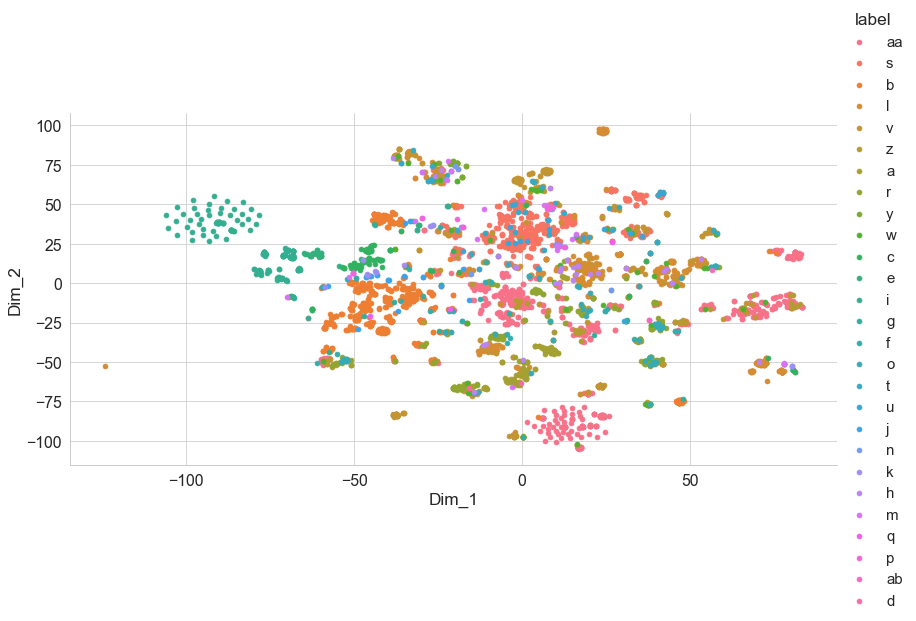

In [366]:
sns.FacetGrid(plot_tsne(train,'X1',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

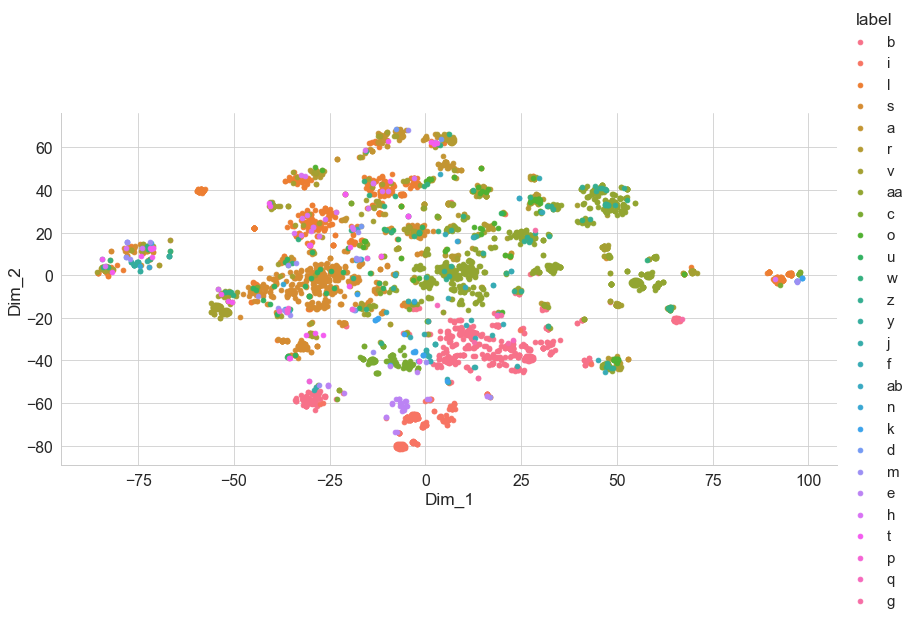

In [367]:
sns.FacetGrid(plot_tsne(train,'X1',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

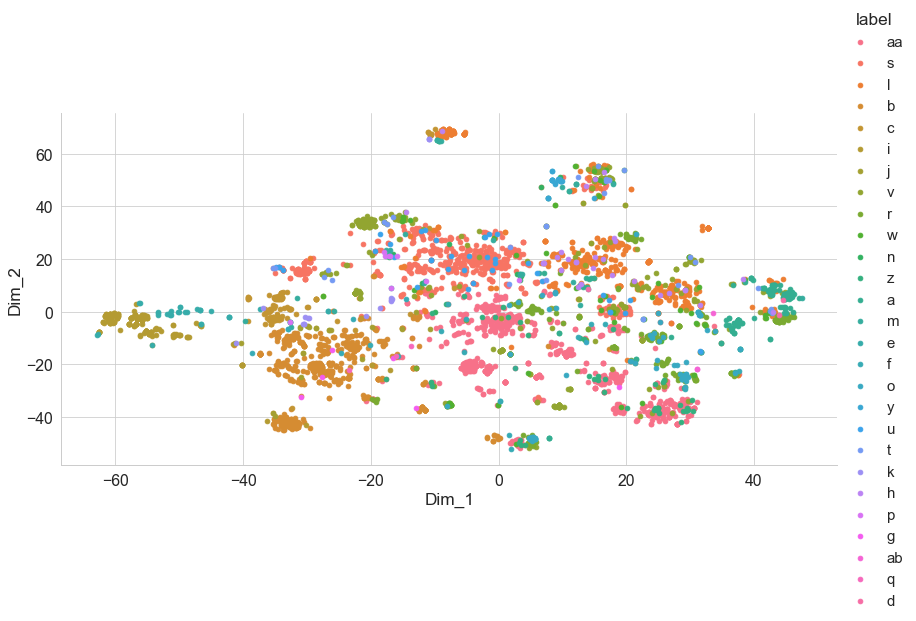

In [368]:
sns.FacetGrid(plot_tsne(train,'X1',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

1. Perpexility 20 gives us 2 clusters one at the top (s)  green in color and one at the right (aa) orange in color. We can also observe from the previous plots that counts for these two customizations were maximum for feature X1, so maybe these customizations are different from other customizations and can be seperated and are important for feature selection. Perpexility 20 is giving more information.


2. With perpexility 30 again we are getting seperate clusters named as 'ab' and 'c'.



## t-SNE for X2

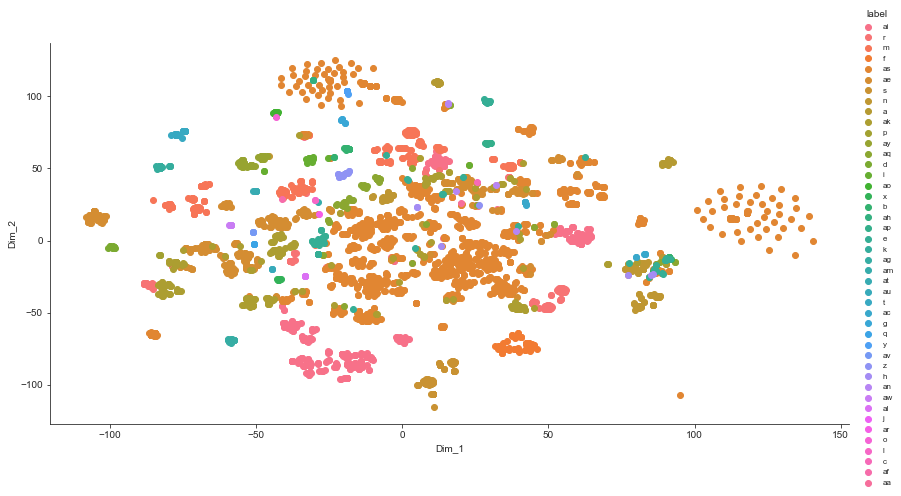

In [34]:
sns.FacetGrid(plot_tsne(train,'X2',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

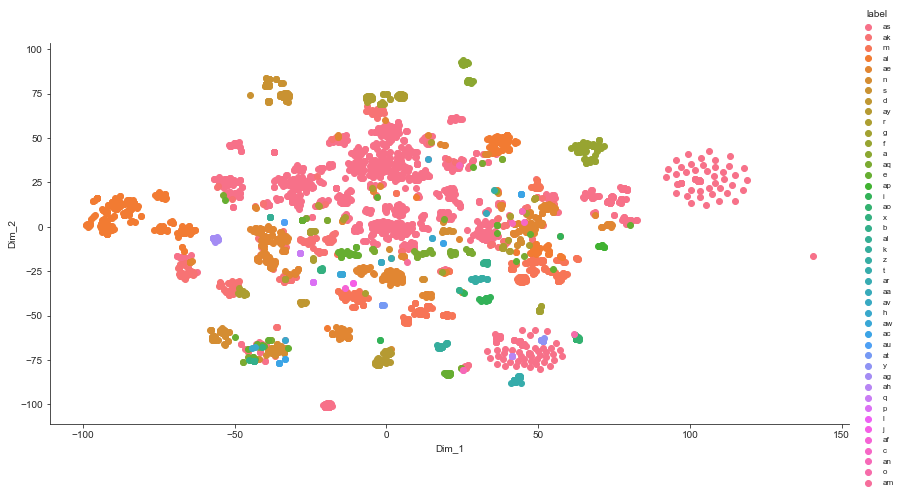

In [35]:
sns.FacetGrid(plot_tsne(train,'X2',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

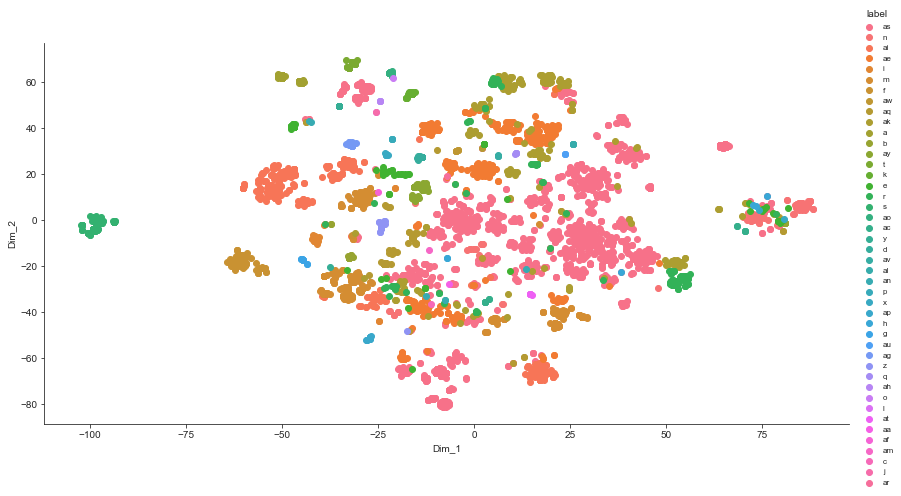

In [36]:
sns.FacetGrid(plot_tsne(train,'X2',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

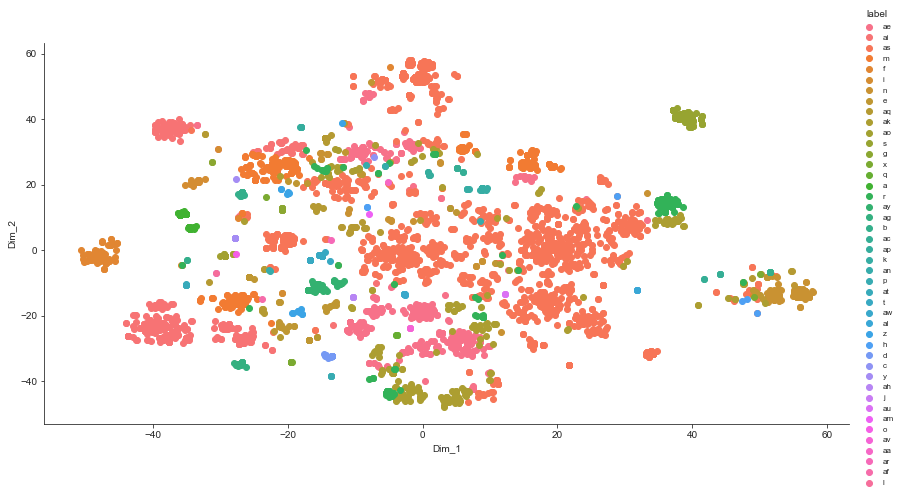

In [37]:
sns.FacetGrid(plot_tsne(train,'X2',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=8)
plt.show()

### Observation

1. From the data is obvious that most of the points belongs to 'as' customization.


2. Perpexility 100 is doing a decent job to seperate the olive colored cluster ('ak') from orange ('as') which is clustered in center and is far more better than the other perpexility values. 

### t-SNE for X3

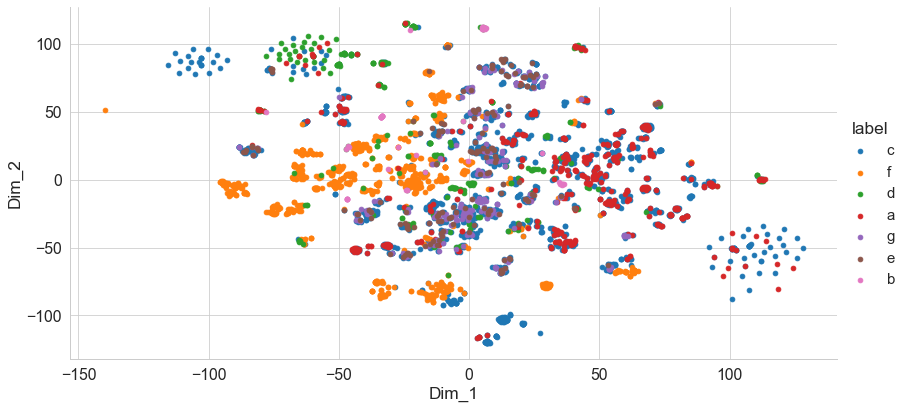

In [373]:
sns.FacetGrid(plot_tsne(train,'X3',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

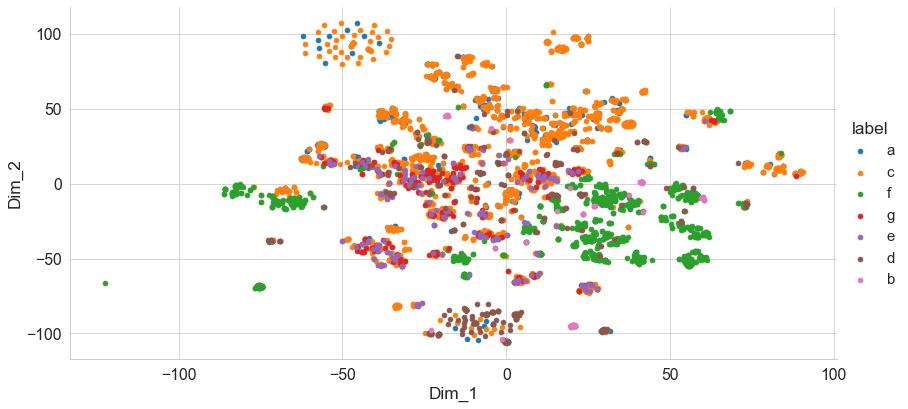

In [374]:
sns.FacetGrid(plot_tsne(train,'X3',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

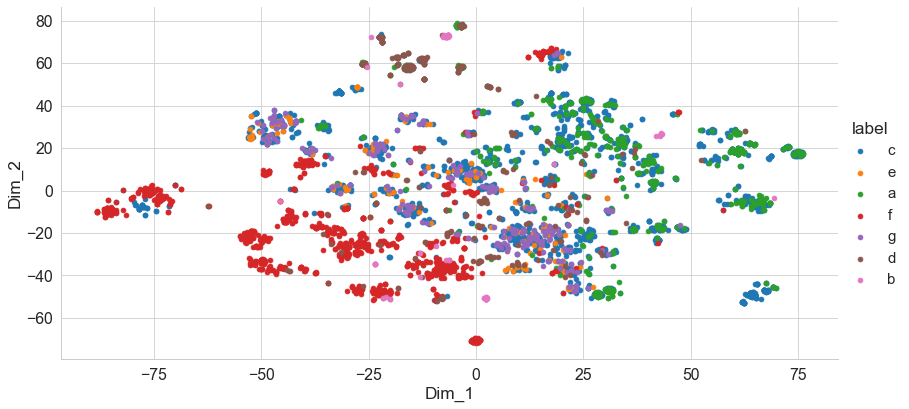

In [375]:
sns.FacetGrid(plot_tsne(train,'X3',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

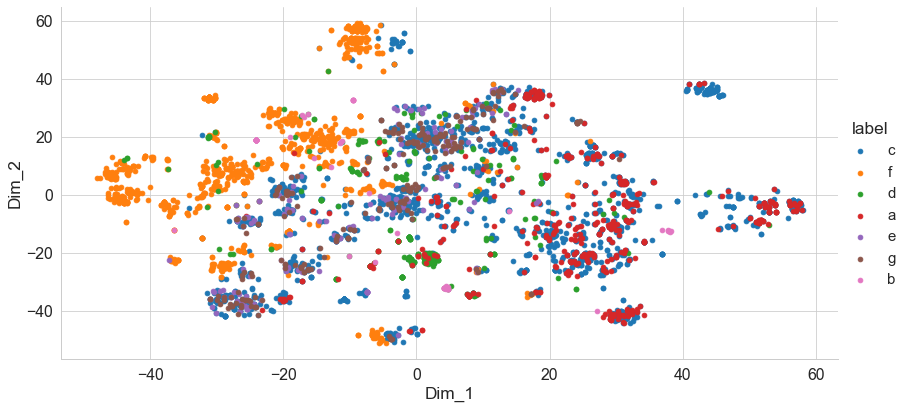

In [376]:
sns.FacetGrid(plot_tsne(train,'X3',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

1. t-SNE with perpexility 20 is doing great job and we can se orange ('f'), blue ('c'), red ('a') and green ('d') clusters   


2. Whereas with perpexility 30 we can only observe orange ('c') and green ('f') clusters to be seperated.


3. Perpexility 50 is seperating red ('f') from green ('a') and perpexility 100 is also seperating orange ('f') from others.


4. This means that the customization 'f' is seperated and different from each others for every perpexility value.

## t-SNE for X4

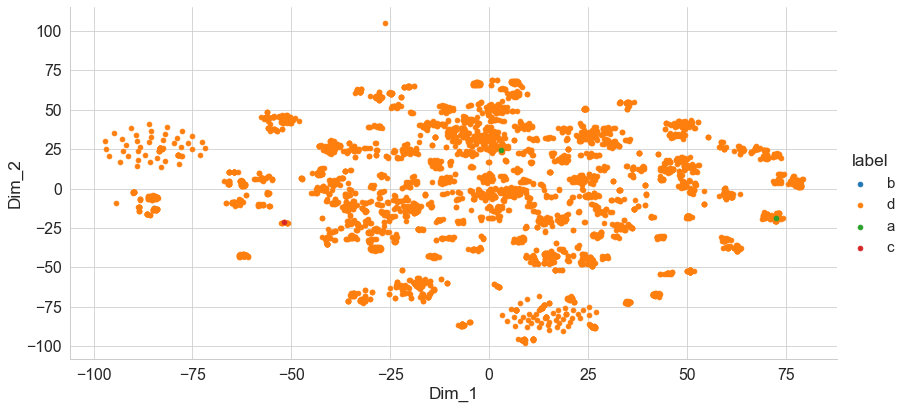

In [390]:
sns.FacetGrid(plot_tsne(train,'X4'), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

So there is only a orange cluster that means the variance for this feature is very low.

### t-SNE for X5

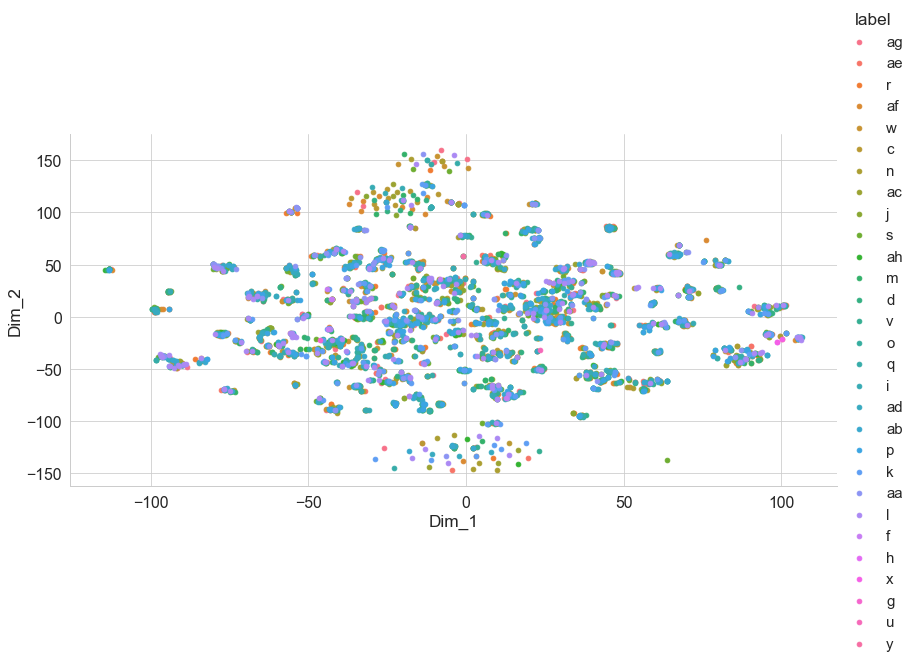

In [377]:
sns.FacetGrid(plot_tsne(train,'X5',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

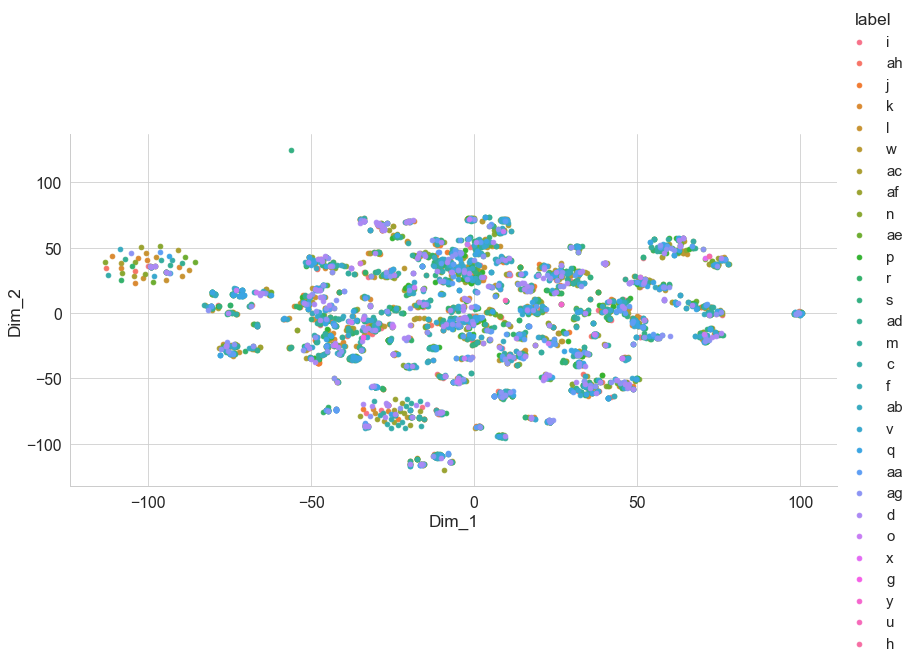

In [378]:
sns.FacetGrid(plot_tsne(train,'X5',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

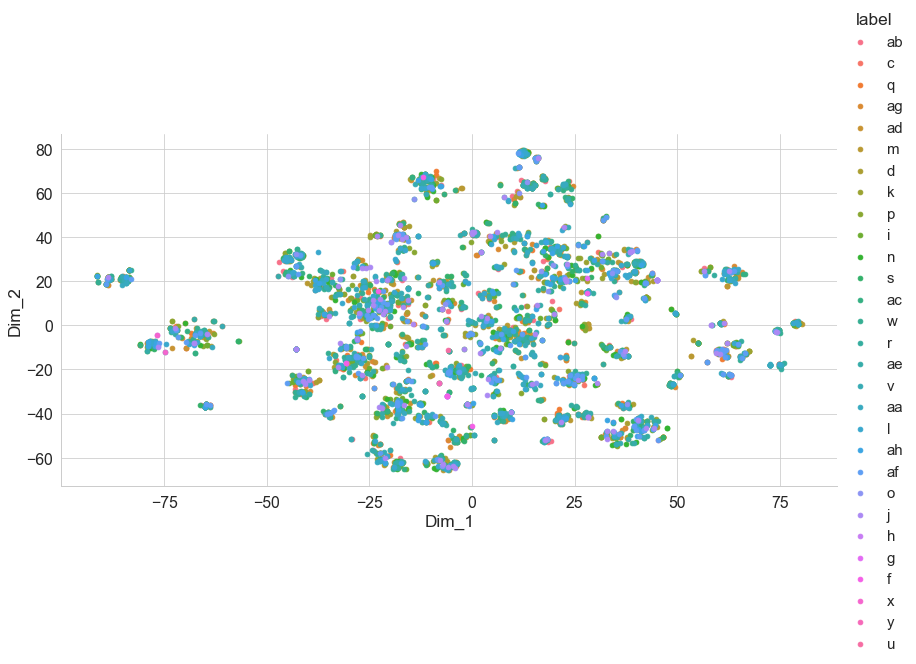

In [379]:
sns.FacetGrid(plot_tsne(train,'X5',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

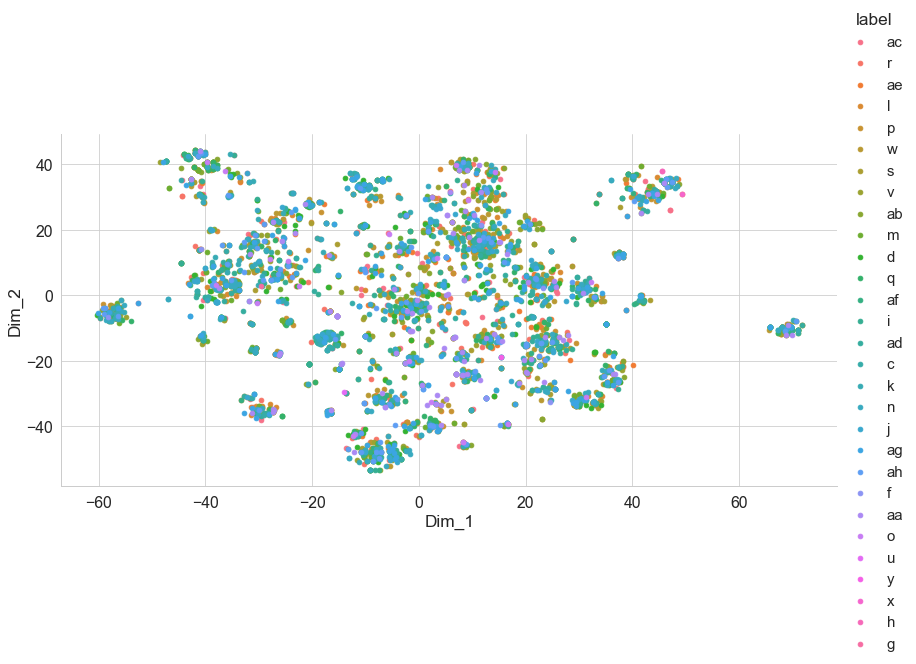

In [380]:
sns.FacetGrid(plot_tsne(train,'X5',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

All the points are scattered and no one cluster can be fornmed and hence no observation can be made for feature 'X5'.

### t-SNE for X6

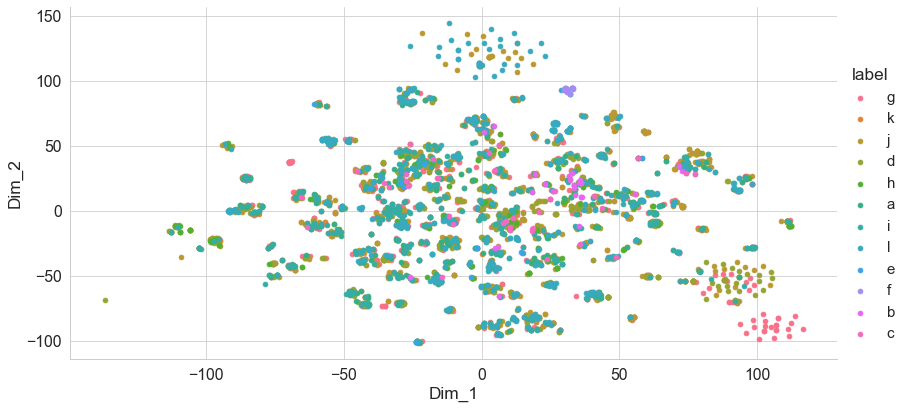

In [381]:
sns.FacetGrid(plot_tsne(train,'X6',20,1500), hue="label", height = 20,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

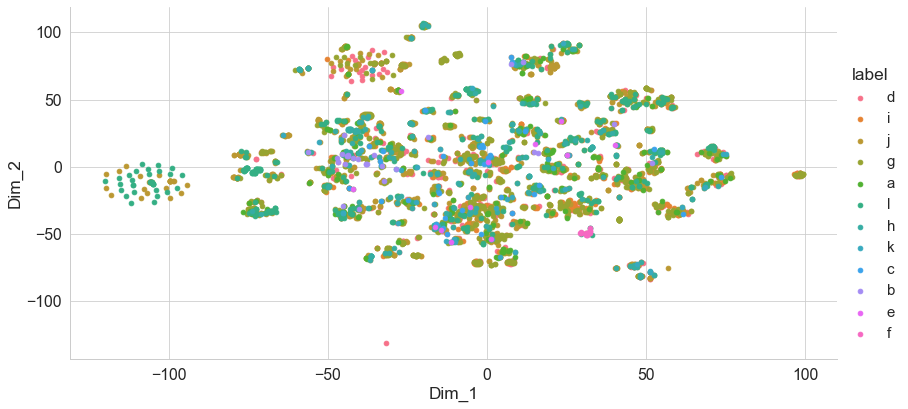

In [382]:
sns.FacetGrid(plot_tsne(train,'X6',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

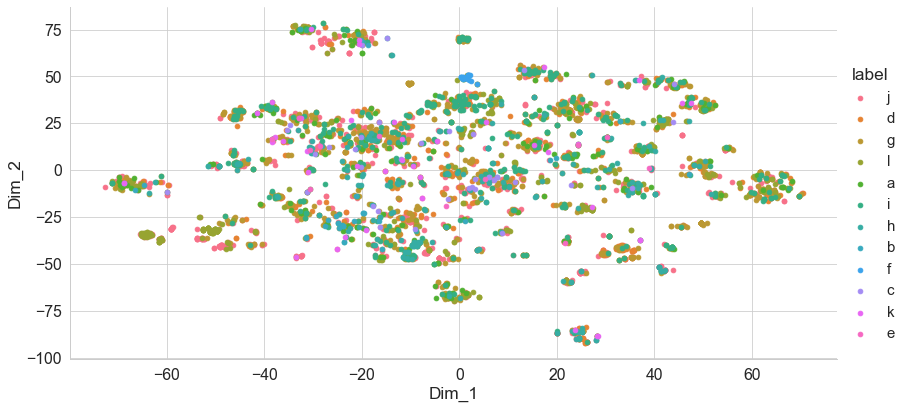

In [383]:
sns.FacetGrid(plot_tsne(train,'X6',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

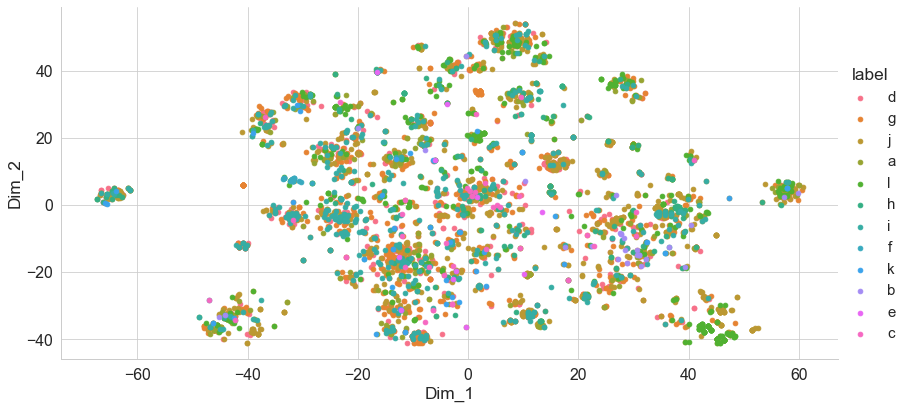

In [384]:
sns.FacetGrid(plot_tsne(train,'X6',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observation

For perpexility 20 only purple cluster at the bottom named as 'c' and blue cluster ('e') can be seperated.

### t-SNE for X8

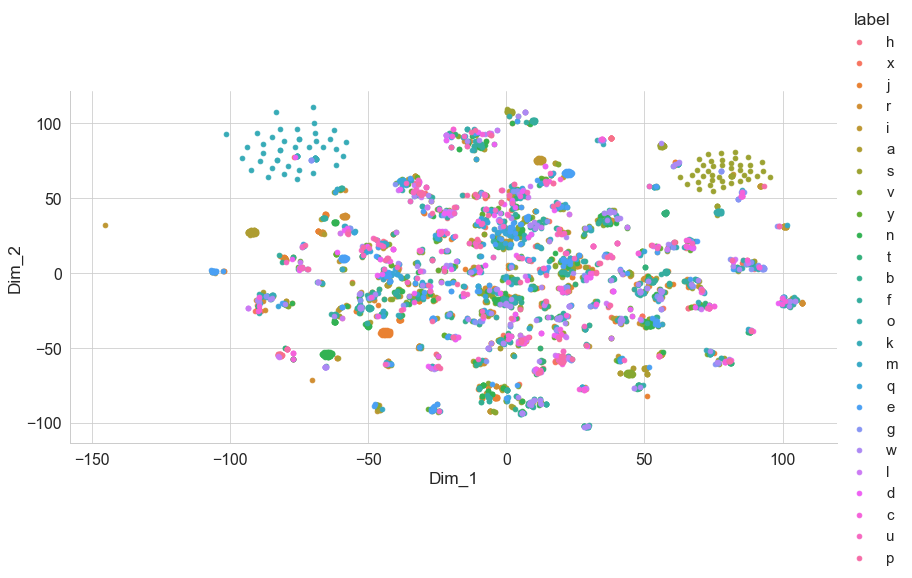

In [385]:
sns.FacetGrid(plot_tsne(train,'X8',20,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                    map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

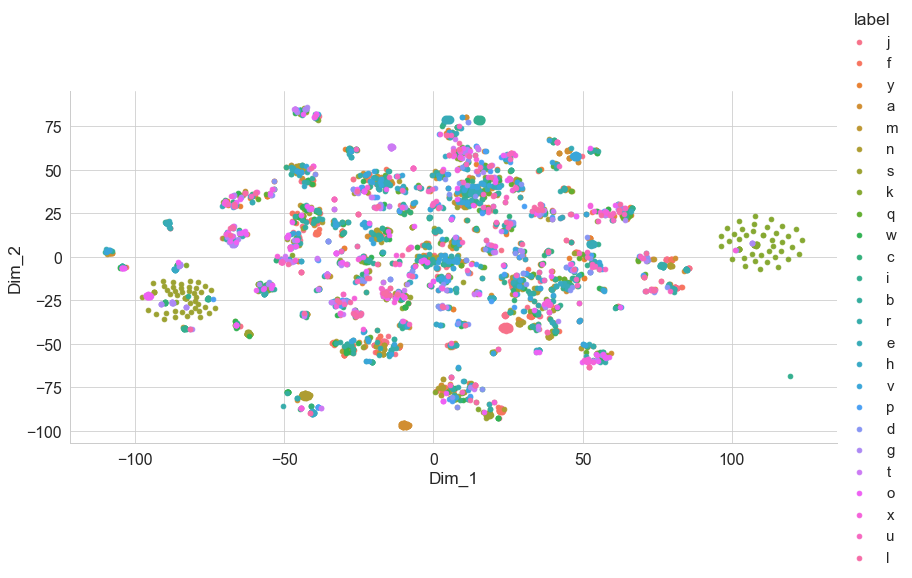

In [386]:
sns.FacetGrid(plot_tsne(train,'X8',30,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                            map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

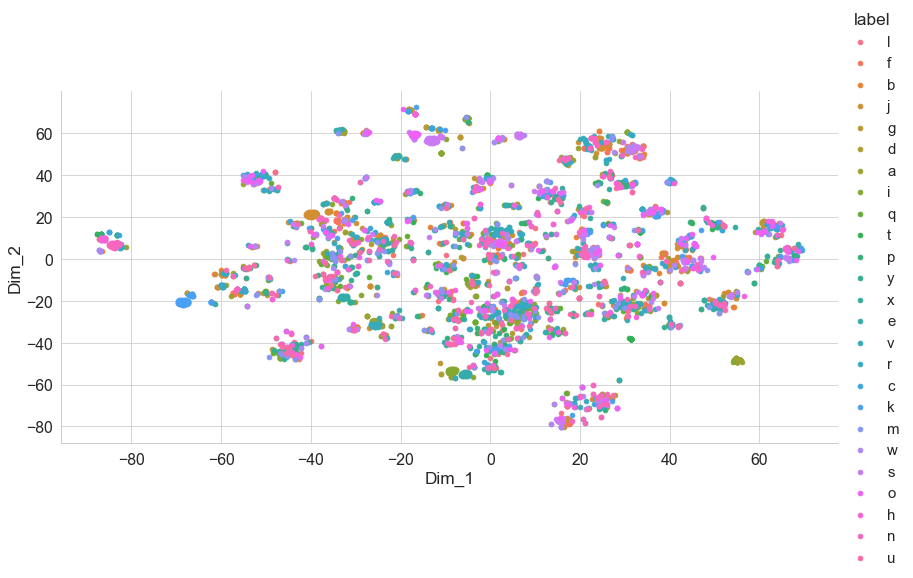

In [387]:
sns.FacetGrid(plot_tsne(train,'X8',50,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                                map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

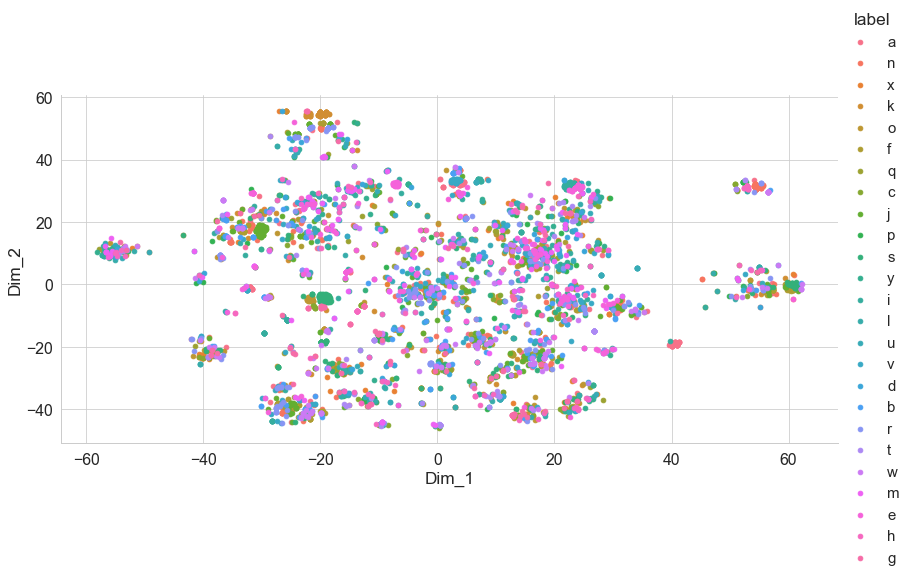

In [388]:
sns.FacetGrid(plot_tsne(train,'X8',100,1500), hue="label", height = 30,aspect=20/10,size=6).\
                                                                    map(plt.scatter, 'Dim_1', 'Dim_2').add_legend(fontsize=15)
plt.show()

### Observations

1. With perpexility 20 blue cluster at top ('e') and olive cluster at top right ('s') are seperable from other customizations.


2. With perpexility 30 light green cluster at right ('k') and olive cluster at left ('s') are seperable from other customizations.


3. From the observation we can infer that customization 's' is different from other customizations for feature X8.

## 5. Binary Feature Analysis and Dimensionality Reduction

In [39]:
#extracting only binary features
binary_features = train.columns.drop(['ID', 'y'] + list(cat_features))
binary_features

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

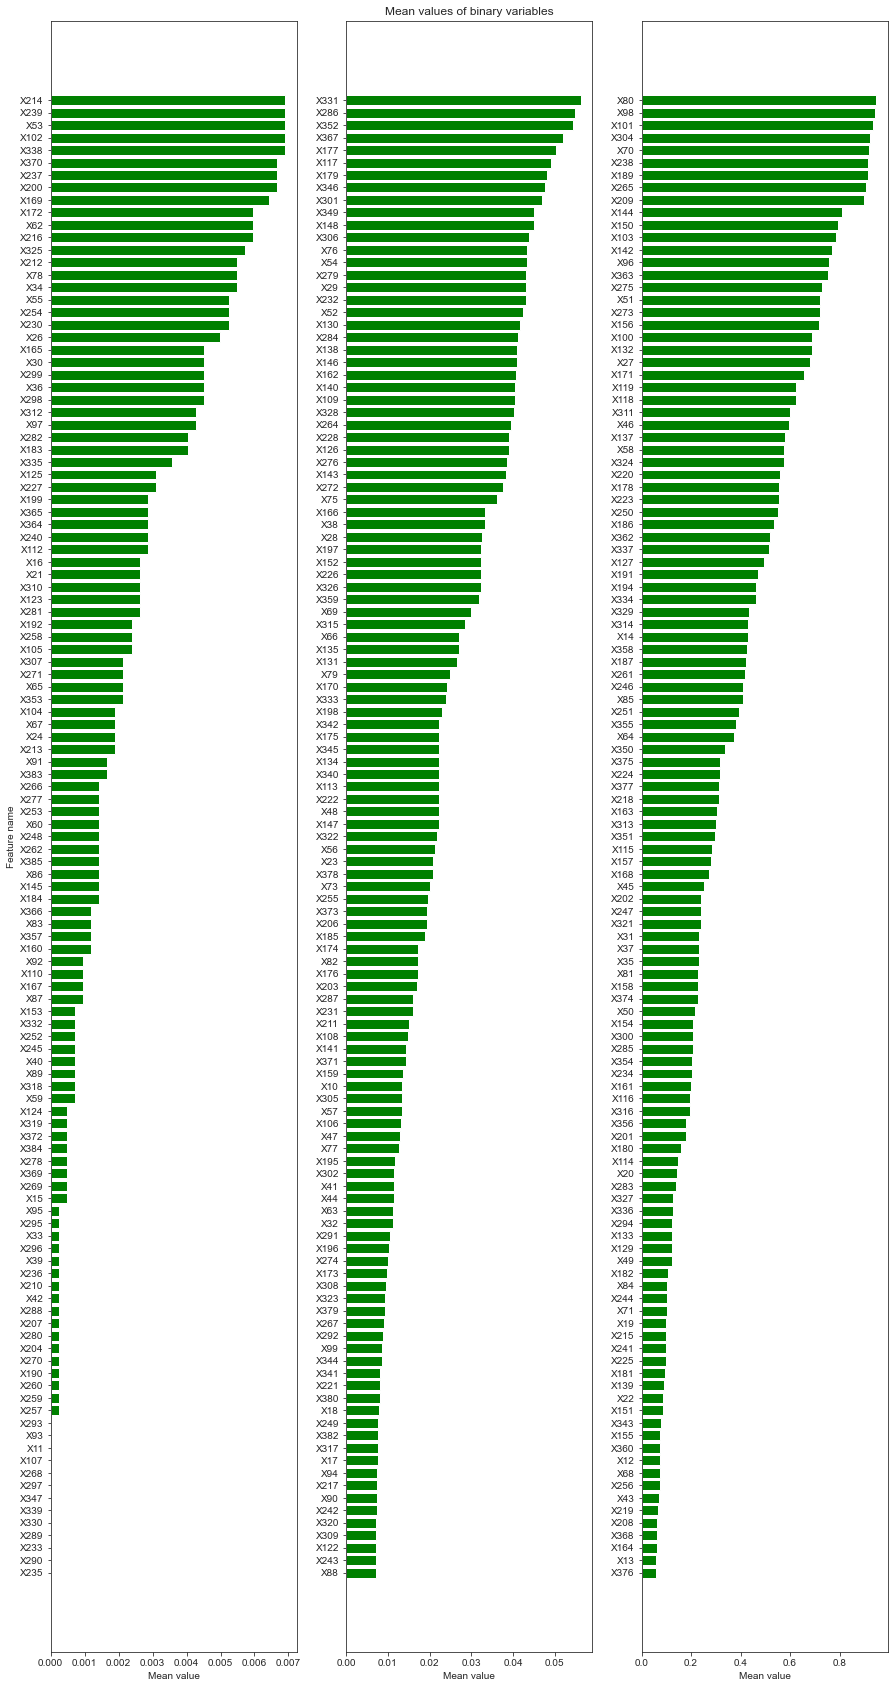

In [83]:
#reference : https://www.kaggle.com/code/eryash15/mercedes-eda-xgboost-testline?scriptVersionId=79247253&cellId=14

binary_means = [np.mean(train[c]) for c in binary_features]
binary_names = np.array(binary_features)[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(15,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color='green')
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

<h5>Above plot gives us the mean value of the 0's and 1's present in a binary feature. Features which are close to 0 mean or less than 0.5 gives us an idea that the feature contains most of the values as 0's in it and features close to 1 like X80 tells us that the feature contains mostly 1's. The counts of 0's and 1's in each of the feature is shown in the below plot.<h5/>
 

In [84]:
# Integer Columns Analysis
unique_value_dict = {}
for col in train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

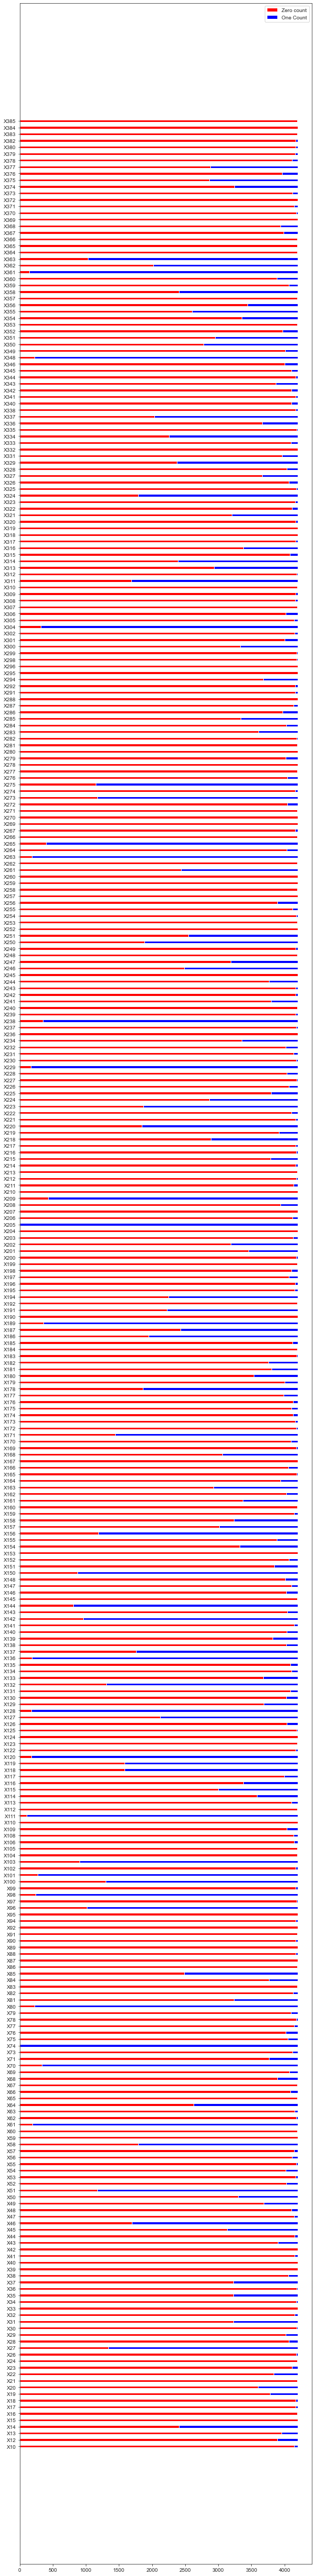

In [85]:
#https://www.kaggle.com/code/tarunsolanki/mercedes-benz-simple-eda?scriptVersionId=69244721&cellId=30

#calculating the sum of 0/s and 1's in all binary_features

zero_list=[]
one_list=[]
col_list = unique_value_dict['[0, 1]']
for col in col_list:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())
l = len(col_list)
arr = np.arange(l)
width = 0.35
plt.figure(figsize=(10,90))
plot_1 = plt.barh(arr, zero_list, width, color='red')
plot_2 = plt.barh(arr, one_list, width, left=zero_list, color="blue")
plt.yticks(arr, col_list)
plt.legend((plot_1[0], plot_2[0]), ('Zero count', 'One Count'))
plt.show()

<h5>From the the above plot and the binary mean plot it can be seen that most of the features consists of 0's in them.<h5/>

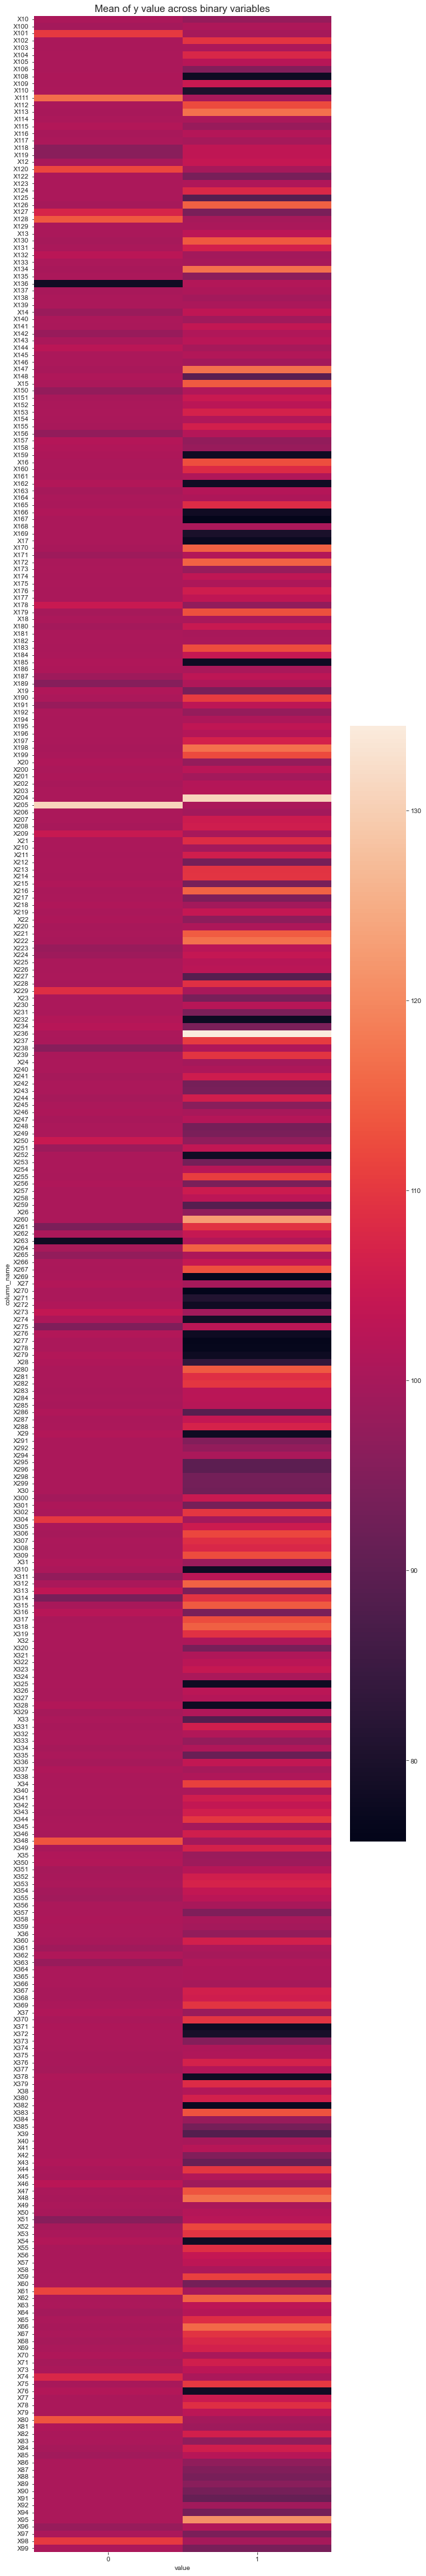

In [86]:
#reference: https://www.kaggle.com/code/tarunsolanki/mercedes-benz-simple-eda?scriptVersionId=69244721&cellId=31

zero_mean_list = []
one_mean_list = []
cols_list = unique_value_dict['[0, 1]']
for col in cols_list:
    zero_mean_list.append(train.loc[train[col]==0].y.mean())
    one_mean_list.append(train.loc[train[col]==1].y.mean())
new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + \
                                                               [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(10,70))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

<h5>Above plot shows us the mean value of test time ('y') for a vehicle in which a binary feature is present or not.<h5/>
<h5>Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive and the count distribution is also good between both the classes (can be seen from the previous graph).<h5/>

#### Checking Variance

In [40]:
binary_train_data = train[binary_features]
print(binary_train_data.shape)
binary_train_data.head(3)

(4201, 368)


X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  ...  X375  X376  X377  \
0    0    0    0    1    0    0    0    0    1    0  ...     0     0     1   
1    0    0    0    0    0    0    0    0    1    0  ...     1     0     0   
2    0    0    0    0    0    0    0    1    0    0  ...     0     0     0   

   X378  X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     1     0     0     0  

[3 rows x 368 columns]

In [41]:
var = []
for f in binary_features:
    v = binary_train_data[f].var()
    var.append((f,v))

# Convert the list of tuples of feature and respective variance into dictionary
var_dict = dict(var)

In [42]:
var_df = pd.DataFrame(var_dict.keys(), columns=['feature'])
var_df['variance'] = var_dict.values()
# let's sort the dataframe by variance
var_df.head()

feature  variance
0     X10  0.013156
1     X11  0.000000
2     X12  0.068971
3     X13  0.054510
4     X14  0.244908

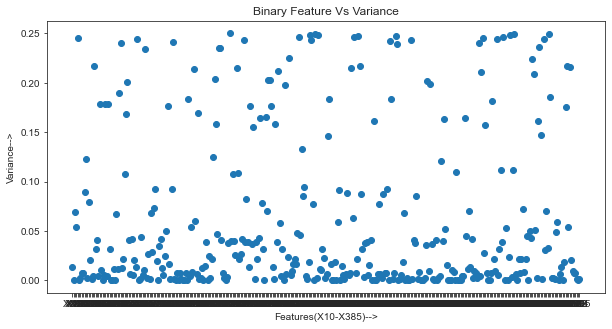

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(var_df['feature'], var_df['variance'])
plt.title("Binary Feature Vs Variance")
plt.xlabel("Features(X10-X385)-->")
plt.ylabel("Variance-->")
plt.show()

- Above scatter plot tells us that there are many values which are having 0 variance.

Let's check for the features which are having 0 variance

### 5.1 Searching Zero variance and Highly correlated features and dropping them 

In [44]:
#searching for the features having zero variance 
zero_var_cols = binary_features[train[binary_features].var()==0]
print('='*50)
print('Columns which have zero variance are :\n {}'.format(zero_var_cols))
print('='*50)

#dropping zero var features
featured_train = train.drop(zero_var_cols,axis=1)
featured_test = test.drop(zero_var_cols,axis=1)
print('Train columns of new dataframe after removing zero variance columns are: {}'.format(featured_train.shape[1]))
print('Test columns of new dataframe after removing zero variance columns are: {}'.format(featured_test.shape[1]))

Columns which have zero variance are :
 Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X339', 'X347'],
      dtype='object')
Train columns of new dataframe after removing zero variance columns are: 365
Test columns of new dataframe after removing zero variance columns are: 364


In [45]:
#Reference: https://stackoverflow.com/a/52509954/19790968

#searching features which have 98% of the correlation with each other
corr_cols = train[binary_features].corr(method='pearson')
upper = corr_cols.where(np.triu(np.ones(corr_cols.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.98)]

#dropping highly correlated features
featured_train.drop(to_drop_corr,axis=1,inplace=True)
featured_test.drop(to_drop_corr,axis=1,inplace=True)
print('='*50)
print('Train and Test Columns which are highly correlated are :\n {}'.format(to_drop_corr))
print('='*50)

Train and Test Columns which are highly correlated are :
 ['X35', 'X37', 'X39', 'X54', 'X76', 'X84', 'X90', 'X94', 'X102', 'X113', 'X119', 'X122', 'X129', 'X134', 'X137', 'X140', 'X146', 'X147', 'X172', 'X198', 'X199', 'X213', 'X214', 'X215', 'X216', 'X217', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X249', 'X250', 'X253', 'X254', 'X262', 'X263', 'X264', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X348', 'X352', 'X360', 'X363', 'X364', 'X365', 'X368', 'X370', 'X371', 'X382', 'X385']


In [46]:
#removing feature X4 
remove_cat_col = 'X4'
featured_train.drop(remove_cat_col,axis=1,inplace=True)
featured_test.drop(remove_cat_col,axis=1,inplace=True)

In [47]:
print('='*100)
print('Number of columns of original Train dataframe are: {}'.format(train.shape[1]))
print('Number of columns of original Test dataframe are: {}'.format(test.shape[1]))
print('='*100)
print('Number of columns of new Train dataframe after removing Zero Variance ,Highly Correlated columns and Categorical \
                                                                            features are: {}'.format(featured_train.shape[1]))
print('Number of columns of new Test dataframe after removing Zero Variance ,Highly Correlated columns and Categorical \
                                                                            features are: {}'.format(featured_test.shape[1]))
print('='*100)
print('Total Features Removed : {}'.format(train.shape[1]-featured_train.shape[1]))

Number of columns of original Train dataframe are: 378
Number of columns of original Test dataframe are: 377
Number of columns of new Train dataframe after removing Zero Variance ,Highly Correlated columns and Categorical                                                                             features are: 301
Number of columns of new Test dataframe after removing Zero Variance ,Highly Correlated columns and Categorical                                                                             features are: 300
Total Features Removed : 77


### 5.2 Feature Importance of binary features

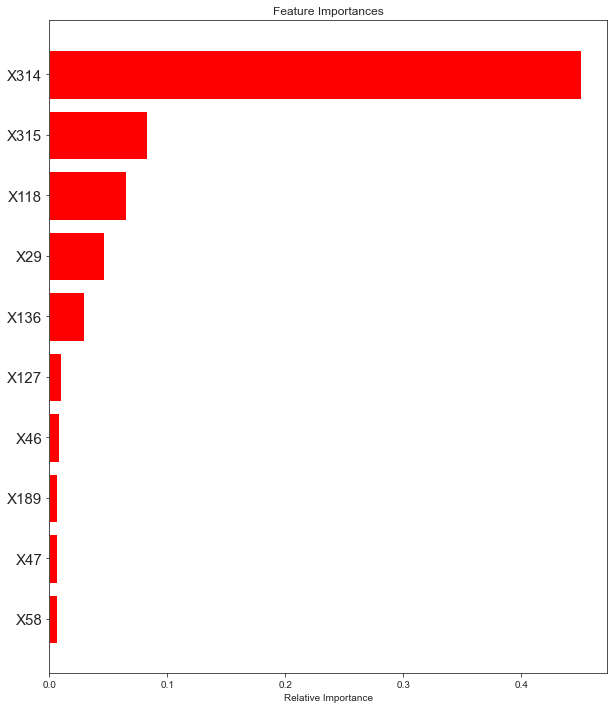

In [48]:
from sklearn.ensemble import RandomForestRegressor
import joblib

binary_dataframe = featured_train.drop(['ID','y','X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8'],axis=1)
result_y = featured_train['y']

#create a Regressor model
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
# fit the model on data
rf.fit(binary_dataframe, result_y)
save_model = joblib.dump(rf,'C:/Users/gaura/Desktop/Mercedes/feature_imp_rf.pkl')
# get the sorted indices of features
features = binary_dataframe.columns
importances = rf.feature_importances_
imp_feat_idx = np.argsort(importances)[-10:]

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(imp_feat_idx)), importances[imp_feat_idx], color='r', align='center')
plt.yticks(range(len(imp_feat_idx)), [features[i] for i in imp_feat_idx],fontsize=15)
plt.xlabel('Relative Importance')
plt.show()

Feature X314 is the most important feature followed by X315 and X118. I can use these three features further in feature selection in the notebook.

In [49]:
top_binary_feat = [features[i] for i in imp_feat_idx]
print(top_binary_feat)

['X58', 'X47', 'X189', 'X46', 'X127', 'X136', 'X29', 'X118', 'X315', 'X314']


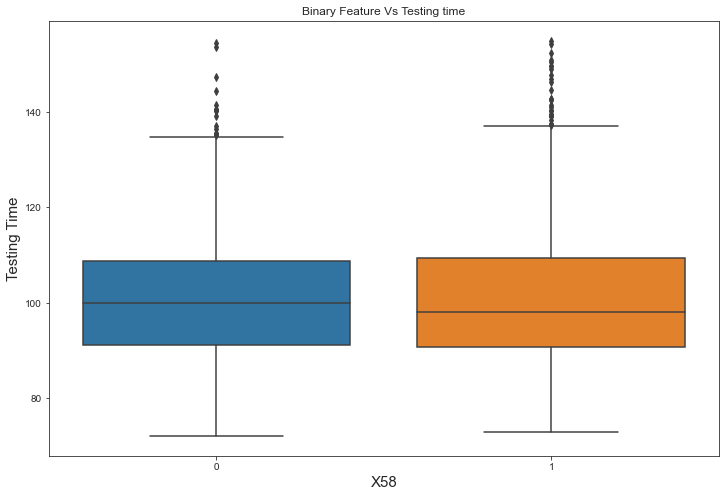

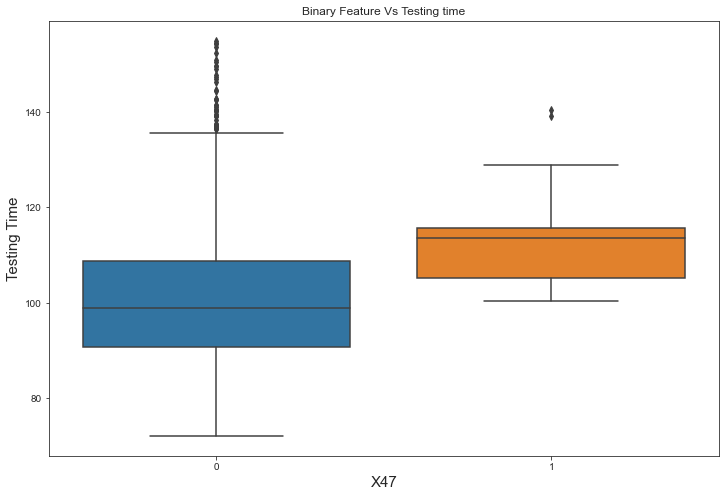

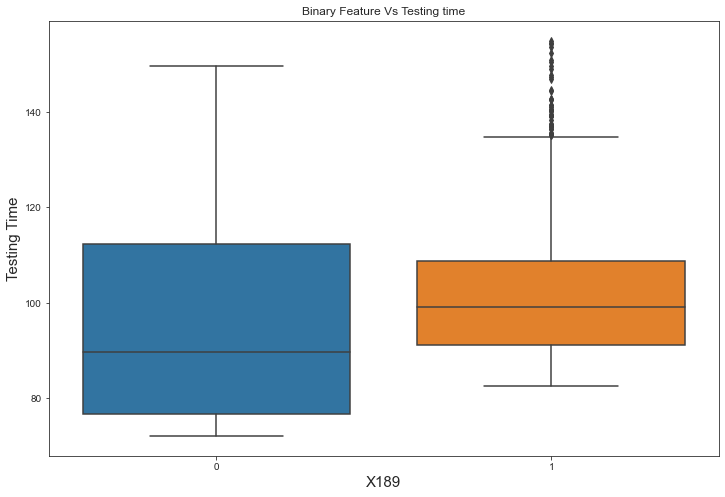

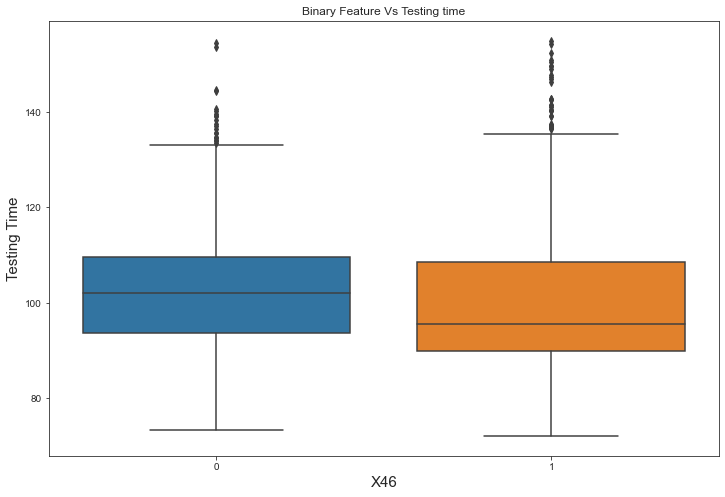

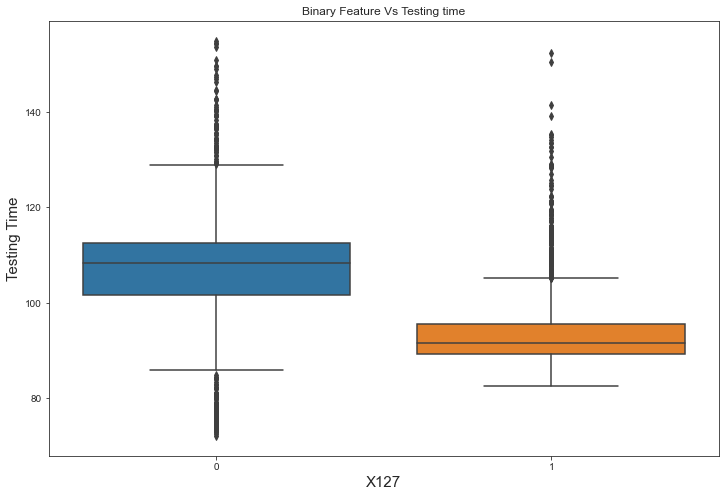

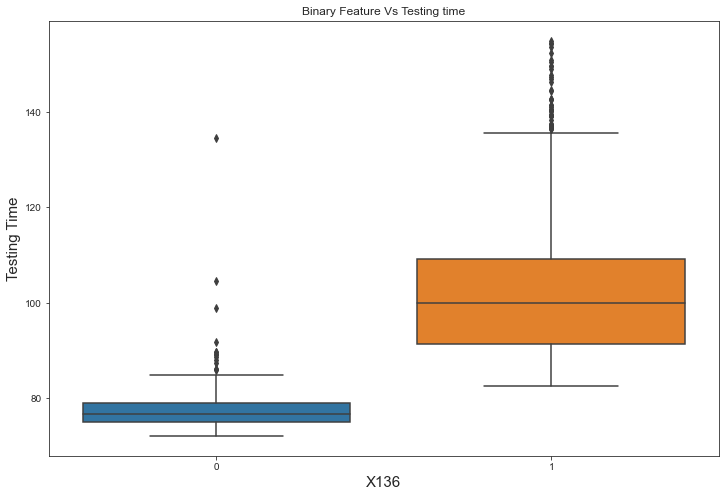

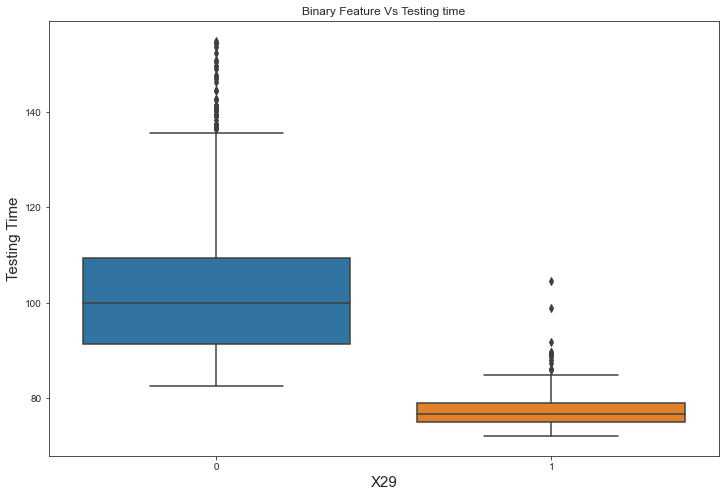

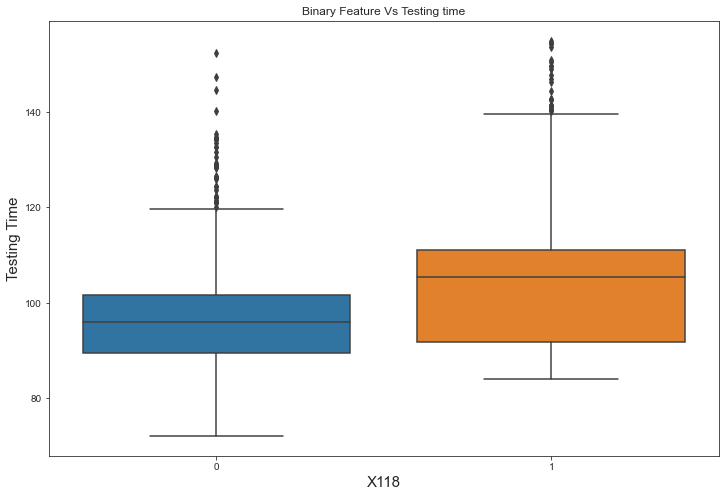

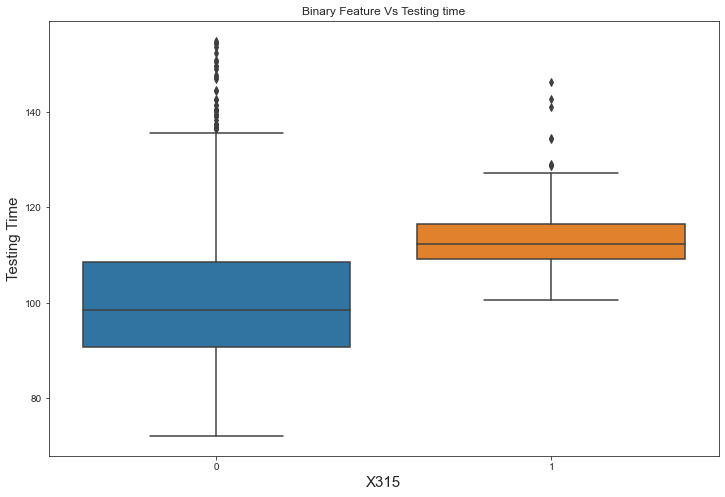

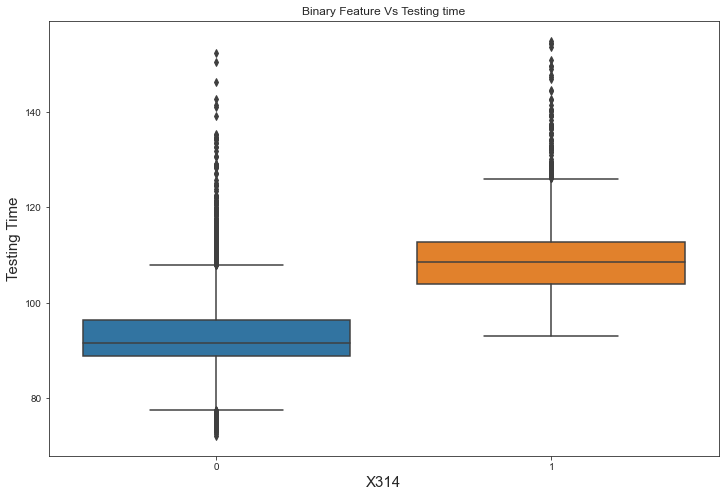

In [50]:
for feat in top_binary_feat:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=binary_dataframe[feat], y=result_y)
    plt.title("Binary Feature Vs Testing time")
    plt.xlabel(feat,fontsize=15)
    plt.ylabel("Testing Time",fontsize=15)

### Observation

From above plots it is observed that the binary variables are pretty well distributed. I can say as the feature's presence or absence is affecting the testing time to change. 
- For features 'X314', 'X315', 'X118', 'X136' 'X47' when these are present in the car configuration then most of the configurations take more time for testing.
- For features 'X29','X127', the configurations which are not having these features are tending to take more testing time.
- For 'X189','X46','X58' the configurations having almost similar testing when it present and also when it is not presnt in the configuration.

## EDA Conclusion

- There are No NaN values in the dataset


- There are No duplicate rows in the dataset


- Considered values all above 155 as outliers


- Removed low variance categorical feature:

  ['X4']
  
  
- Removed zero variance binary features:

  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297', 'X330', 'X339', 'X347']
  

- Removed same variance binary features: 

  ['X35', 'X37', 'X39', 'X54', 'X76', 'X84', 'X90', 'X94', 'X102', 'X113', 'X119', 'X122', 'X129', 'X134', 'X137', 'X140', 'X146', 'X147', 'X172', 'X198', 'X199', 'X213', 'X214', 'X215', 'X216', 'X217', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248', 'X249', 'X250', 'X253', 'X254', 'X262', 'X263', 'X264', 'X266', 'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X348', 'X352', 'X360', 'X363', 'X364', 'X365', 'X368', 'X370', 'X371', 'X382', 'X385']

## 6. Data Pre-Processing

###  Categorical Preprocessing

In [51]:
from sklearn.preprocessing import OrdinalEncoder

def preprocessing(data):
    cat_features = []
    Binary_features = []
    
    # Collect the categorical and binary feature names 
    for f in data.columns:
        if data[f].dtype == 'object':
            cat_features.append(f)
        elif data[f].dtype == 'int' and f != 'ID':
            Binary_features.append(f)
    
    cat_df = data[cat_features]
    oe = OrdinalEncoder()
    enc_cat_df = oe.fit_transform(cat_df)
    enc_df = pd.DataFrame(enc_cat_df,columns=cat_features)
    enc_df.insert(0, 'ID', data['ID'].values)
    binary_df = data.drop(['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8'],axis=1)
    for col in data.columns:
        if col=='y':
            binary_df = binary_df.drop(['y'],axis=1)
            break
            
    final_df = pd.merge(enc_df,binary_df,on='ID',how='left')
    return final_df

In [52]:
original_X_train = preprocessing(featured_train)
original_X_test = preprocessing(featured_test)

original_X_train.drop(['ID'],axis=1,inplace=True)
original_X_test.drop(['ID'],axis=1,inplace=True)

y_train = featured_train['y']

In [53]:
print(original_X_train.shape,y_train.shape)
print(original_X_test.shape)

(4201, 299) (4201,)
(4209, 299)


In [54]:
original_X_train.head()

X0    X1    X2   X3    X5    X6    X8  X10  X12  X13  ...  X373  X374  \
0  32.0  23.0  17.0  0.0  24.0   9.0  14.0    0    0    1  ...     0     0   
1  32.0  21.0  19.0  4.0  28.0  11.0  14.0    0    0    0  ...     0     0   
2  20.0  24.0  34.0  2.0  27.0   9.0  23.0    0    0    0  ...     0     0   
3  20.0  21.0  34.0  5.0  27.0  11.0   4.0    0    0    0  ...     0     0   
4  20.0  23.0  34.0  5.0  12.0   3.0  13.0    0    0    0  ...     0     0   

   X375  X376  X377  X378  X379  X380  X383  X384  
0     0     0     1     0     0     0     0     0  
1     1     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0  

[5 rows x 299 columns]

In [55]:
original_X_test.head()

X0    X1    X2   X3    X5    X6    X8  X10  X12  X13  ...  X373  X374  \
0  21.0  23.0  34.0  5.0  26.0   0.0  22.0    0    0    0  ...     0     0   
1  42.0   3.0   8.0  0.0   9.0   6.0  24.0    0    0    0  ...     0     0   
2  21.0  23.0  17.0  5.0   0.0   9.0   9.0    0    0    0  ...     0     0   
3  21.0  13.0  34.0  5.0  31.0  11.0  13.0    0    0    0  ...     0     0   
4  45.0  20.0  17.0  2.0  30.0   8.0  12.0    0    0    0  ...     0     0   

   X375  X376  X377  X378  X379  X380  X383  X384  
0     0     0     0     1     0     0     0     0  
1     0     0     1     0     0     0     0     0  
2     0     0     0     1     0     0     0     0  
3     0     0     0     1     0     0     0     0  
4     1     0     0     0     0     0     0     0  

[5 rows x 299 columns]

In [56]:
from sklearn.model_selection import train_test_split

#splitting data to train and cv
original_X_train, original_X_cv, y_train, y_cv = train_test_split(original_X_train, y_train, test_size=0.20, \
                                                                                                        random_state = 42)

print(original_X_train.shape,y_train.shape)
print(original_X_cv.shape,y_cv.shape)
print(original_X_test.shape)

(3360, 299) (3360,)
(841, 299) (841,)
(4209, 299)


## 7. Feature Engineering

### 7.1 Principal Component Analysis


In [57]:
 from sklearn.decomposition import PCA

# lets take top 15 pca components

components = 15 
categories = ['X0','X1', 'X2', 'X3', 'X5','X6', 'X8']

pca = PCA(n_components=components, random_state= 42)

pca_train = pca.fit_transform(original_X_train.drop(categories, axis=1))
pca_cv = pca.fit_transform(original_X_cv.drop(categories, axis=1))
pca_test = pca.transform(original_X_test.drop(categories, axis=1))

print(pca_train.shape)
print(pca_cv.shape)
print(pca_test.shape)

(3360, 15)
(841, 15)
(4209, 15)


#### 7.1.1 PCA + Original Data

In [58]:
train_pca = np.hstack((original_X_train, pca_train))
cv_pca = np.hstack((original_X_cv, pca_cv))
test_pca = np.hstack((original_X_test, pca_test))

print(train_pca.shape,y_train.shape)
print(cv_pca.shape,y_cv.shape)
print(test_pca.shape)

(3360, 314) (3360,)
(841, 314) (841,)
(4209, 314)


### 7.2 SVD

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6846297

https://medium.com/swlh/greener-manufacturing-with-machine-learning-6ec77d0e7a91

Recent work by Gavish and Donoho provides an optimal truncation value, or hard threshold, under certain conditions,
providing a principled approach to obtaining low-rank matrix approximations using the SVD.

It determines the optimal hard threshold **'τ'** for
singular value truncation under the assumption that a matrix has a low-rank
structure contaminated with Gaussian white noise. This work builds on a
significant literature surrounding various techniques for hard thresholding of singular values.

If X ∈ R^n×m is rectangular and m < n, then the aspect ratio 

β = m/n

When noise is unknown there is no closed-form solution for **'τ'** , and it must be approximated
numerically,

For unknown noise, and a rectangular matrix X ∈ R^n×m, the optimal hard threshold is given by:

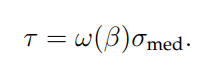

σmed is the median singular value

Here, ω(β) = λ(β)/µβ, where µβ is the solution to the following problem:
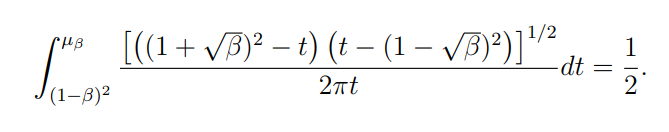

The median µβ and hence the coefficient ω(β) are not
available analytically; 

Some values of coefficient ω(β) are tabulated in
Table below for convenience.

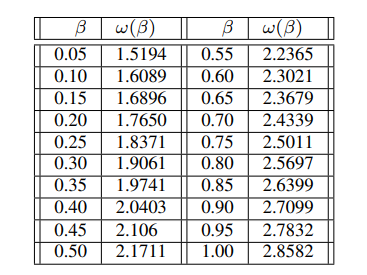


In [59]:
# get the matrix factors
categories = ['X0','X1', 'X2', 'X3', 'X5','X6', 'X8']
U, S, VT = np.linalg.svd(original_X_train.drop(categories, axis=1),full_matrices=1)
# calculate the aspect ratio β
m = original_X_train.drop(categories, axis=1).shape[1]
n = original_X_train.drop(categories, axis=1).shape[0]
β = m/n
β

0.0869047619047619

In [60]:
# 0.08422619047619048 near 0.10
# hence let's take w(β) value for β = 0.10 from the above table
ω_β = 1.6089
# find the median singular value
ymed = np.median(S)
# find Hard threshold
cutoff = ω_β * ymed 
print(f"The Hard Threshold for Truncation = {cutoff}")
# get the number of components
r = np.max(np.where(S > cutoff))
print(f"Number of total components to be selected = {r}")

The Hard Threshold for Truncation = 5.730056513818363
Number of total components to be selected = 111


In [61]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components= r, random_state=420)
tsvd_train = tsvd.fit_transform(original_X_train.drop(["X0","X1","X2","X3","X5","X6","X8"], axis=1))
tsvd_cv = tsvd.transform(original_X_cv.drop(["X0","X1","X2","X3","X5","X6","X8"], axis=1))
tsvd_test = tsvd.transform(original_X_test.drop(["X0","X1","X2","X3","X5","X6","X8"], axis=1))

print(tsvd_train.shape)
print(tsvd_cv.shape)
print(tsvd_test.shape)

(3360, 111)
(841, 111)
(4209, 111)


#### 7.2.1 Combining PCA + SVD + Original data

In [62]:
train_pca_svd = np.hstack((train_pca,tsvd_train))
cv_pca_svd = np.hstack((cv_pca,tsvd_cv))
test_pca_svd = np.hstack((test_pca,tsvd_test))

print(train_pca_svd.shape,y_train.shape)
print(cv_pca_svd.shape,y_cv.shape)
print(test_pca_svd.shape)

(3360, 425) (3360,)
(841, 425) (841,)
(4209, 425)


### 7.3 ICA (Independent Component Analysis)

1. Implementing ICA(Independent Component Analysis) for featurization referred from the 33rd place solution. (https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/discussion/36461)


2. Independent component analysis separates a multivariate signal into additive subcomponents that are maximally independent. Typically, ICA is not used for reducing dimensionality but for separating superimposed signals.

In [63]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components= 15, random_state=42,max_iter=500,tol=0.1)

ica_train = ica.fit_transform(original_X_train.drop(['X0', 'X1', 'X2', 'X3','X5', 'X6', 'X8'],axis=1))
ica_cv = ica.fit_transform(original_X_cv.drop(['X0', 'X1', 'X2', 'X3','X5', 'X6', 'X8'],axis=1))
ica_test = ica.transform(original_X_test.drop(['X0', 'X1', 'X2', 'X3','X5', 'X6', 'X8'],axis=1))

#### 7.3.1 Combining Original + PCA + ICA

In [64]:
train_pca_ica = np.hstack((train_pca, ica_train))
cv_pca_ica = np.hstack((cv_pca, ica_cv))
test_pca_ica = np.hstack((test_pca, ica_test))

print(train_pca_ica.shape,y_train.shape)
print(cv_pca_ica.shape,y_cv.shape)
print(test_pca_ica.shape)

(3360, 329) (3360,)
(841, 329) (841,)
(4209, 329)


#### 7.3.2 combining Original + PCA + ICA + SVD

In [65]:
train_pca_ica_svd = np.hstack((train_pca_svd,ica_train))
cv_pca_ica_svd = np.hstack((cv_pca_svd,ica_cv))
test_pca_ica_svd = np.hstack((test_pca_svd,ica_test))

print(train_pca_ica_svd.shape,y_train.shape)
print(cv_pca_ica_svd.shape,y_cv.shape)
print(test_pca_ica_svd.shape)

(3360, 440) (3360,)
(841, 440) (841,)
(4209, 440)


## 7.4 Adding Some more Features

### 7.4.1 Interactive Features

- Two way interactions X314, X315 (Features which are the most important ones)
- Three way interactions X118,X314,X315

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700

In [66]:
def get_interactions(features):
    """
    features : list of features
    return : interaction between features
    """
    train_inter = 0
    cv_inter = 0
    test_inter = 0
    for f in range(len(features)):
        train_inter += original_X_train[features[f]].values
        cv_inter += original_X_cv[features[f]].values
        test_inter += original_X_test[features[f]].values
        
    return train_inter.reshape(-1,1), cv_inter.reshape(-1,1), test_inter.reshape(-1,1)

train_X314_X315, cv_X314_X315, test_X314_X315 = get_interactions(['X314', 'X315'])
train_X314_X315_X118, cv_X314_X315_X118, test_X314_X315_X118 = get_interactions(['X314', 'X315', 'X118'])

In [67]:
print(train_X314_X315.shape)
print(cv_X314_X315.shape)
print(test_X314_X315.shape)
print(train_X314_X315_X118.shape)
print(cv_X314_X315_X118.shape)
print(test_X314_X315_X118.shape)

(3360, 1)
(841, 1)
(4209, 1)
(3360, 1)
(841, 1)
(4209, 1)


### 7.4.2 Gaussian Random Projections

In [68]:
from sklearn.random_projection import GaussianRandomProjection

# Gaussian Random Projection
n_comp = 10
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_train = grp.fit_transform(original_X_train)
grp_cv = grp.transform(original_X_cv)
grp_test = grp.transform(original_X_test)

print(grp_train.shape)
print(grp_cv.shape)
print(grp_test.shape)

(3360, 10)
(841, 10)
(4209, 10)


### 7.4.3 Combining features (Original data + PCA  + SVD + GRP + Interactive)

In [69]:
pca_svd_int_train = np.hstack((train_pca_svd, grp_train,train_X314_X315,train_X314_X315_X118))
pca_svd_int_cv = np.hstack((cv_pca_svd, grp_cv,cv_X314_X315,cv_X314_X315_X118))
pca_svd_int_test = np.hstack((test_pca_svd, grp_test,test_X314_X315,test_X314_X315_X118))

print(pca_svd_int_train.shape,y_train.shape)
print(pca_svd_int_cv.shape,y_cv.shape)
print(pca_svd_int_test.shape)

(3360, 437) (3360,)
(841, 437) (841,)
(4209, 437)


### 7.4.4 Combining all features (Original data + PCA + ICA + SVD + GRP + Interactive)

In [70]:
combined_train = np.hstack((train_pca_ica_svd, grp_train,train_X314_X315,train_X314_X315_X118))
combined_cv = np.hstack((cv_pca_ica_svd, grp_cv,cv_X314_X315,cv_X314_X315_X118))
combined_test = np.hstack((test_pca_ica_svd, grp_test,test_X314_X315,test_X314_X315_X118))

print(combined_train.shape,y_train.shape)
print(combined_cv.shape,y_cv.shape)
print(combined_test.shape)

(3360, 452) (3360,)
(841, 452) (841,)
(4209, 452)


### 7.4.5 Adding more Interactive Features with (Original + PCA + SVD + Interactive + GRP data)

In [71]:
train_X47_X48, cv_X47_X48, test_X47_X48 = get_interactions(['X47', 'X48'])
train_X118_X29, cv_X118_X29, test_X118_X29 = get_interactions(['X118', 'X29'])
train_X118_X29_X136, cv_X118_X29_X136, test_X118_X29_X136 = get_interactions(['X118', 'X29','X136'])

In [72]:
combined_train_new = np.hstack((pca_svd_int_train, train_X47_X48,train_X118_X29,train_X118_X29_X136))
combined_cv_new = np.hstack((pca_svd_int_cv, cv_X47_X48,cv_X118_X29,cv_X118_X29_X136))
combined_test_new = np.hstack((pca_svd_int_test, test_X47_X48,test_X118_X29,test_X118_X29_X136))

print(combined_train_new.shape,y_train.shape)
print(combined_cv_new.shape,y_cv.shape)
print(combined_test_new.shape)

(3360, 440) (3360,)
(841, 440) (841,)
(4209, 440)


# 8. Machine Learning Models

## First Cut Approach

## 1. Linear Regression

### 1.1 Fitting Original data to LR

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_1_lr = make_pipeline(StandardScaler(), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None))

model_1_lr.fit(original_X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [74]:
orig_train_pred_lr = model_1_lr.predict(original_X_train)
orig_cv_pred_lr = model_1_lr.predict(original_X_cv)

print('*'*100)
print('R2 Score of the Linear Regression model using Original Train dataset: {}'.format(r2_score(y_train, orig_train_pred_lr)))
print('*'*100)
print('R2 Score of the Linear Regression model using Original CV dataset: {}'.format(r2_score(y_cv, orig_cv_pred_lr)))
print('*'*100)

****************************************************************************************************
R2 Score of the Linear Regression model using Original Train dataset: 0.6389633294514212
****************************************************************************************************
R2 Score of the Linear Regression model using Original CV dataset: -1.8988490784836515e+20
****************************************************************************************************


### 1.2 Fitting PCA + Original data with LR

In [105]:
model_2_lr = make_pipeline(StandardScaler(), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None))

model_2_lr.fit(train_pca, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [106]:
pca_train_pred_lr = model_2_lr.predict(train_pca)
pca_cv_pred_lr = model_2_lr.predict(cv_pca)
print('*'*100)
print('R2 Score of the Linear Regression model using PCA + Original Train dataset: {}'.format(r2_score(y_train, pca_train_pred_lr)))
print('*'*100)
print('R2 Score of the Linear Regression model using PCA + Original CV dataset: {}'.format(r2_score(y_cv, pca_cv_pred_lr)))
print('*'*100)

****************************************************************************************************
R2 Score of the Linear Regression model using PCA + Original Train dataset: 0.6393880660973175
****************************************************************************************************
R2 Score of the Linear Regression model using PCA + Original CV dataset: -1.8460376116466175e+26
****************************************************************************************************


### 1.3 Observation

1. I have used a very simple model which is a linear Regression model and fit my model to the original train data.


2. From the observation it is obvious that the model is not able to make better predictions on CV and the R2 score is very close to zero.


3. Hence this model is not performing at all and hence we won't be using it for now and try other models.

## 2. SVR

### 2.1 Fitting SVR on Original data

In [107]:
%%time

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


scorer = make_scorer(mean_squared_error, greater_is_better=False)      #https://stackoverflow.com/a/48093973/19790968

parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],\
                                                                'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5, scoring=scorer,n_jobs=-1)
svr.fit(original_X_train, y_train)

Tuning hyper-parameters
CPU times: total: 2.95 s
Wall time: 3min 3s


GridSearchCV(cv=5, estimator=SVR(epsilon=0.01), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [108]:
best_c = svr.best_params_['C']
best_gamma = svr.best_params_['gamma']
best_kernel = svr.best_params_['kernel']
print(f'Best hyperparameter C for original data is {best_c} with {best_kernel} kernel\
                                                                    and best gamma value as {best_gamma}')

Best hyperparameter C for original data is 1000 with rbf kernel                                                                    and best gamma value as 0.0001


#### 2.1.1 Getting R2 score using SVR on Original data

In [109]:
svr1 = SVR(kernel=best_kernel, C=best_c, gamma = best_gamma, epsilon = 0.01)

svr1.fit(original_X_train,y_train)

svr_predictions_train = svr1.predict(original_X_train)

svr_predictions_cv = svr1.predict(original_X_cv)

train_score_svr = r2_score(y_train, svr_predictions_train)

cv_score_svr = r2_score(y_cv, svr_predictions_cv)

print('*'*100)
print('R2 Score of the SVR model using Original Train dataset: {}'.format(train_score_svr))
print('*'*100)
print('R2 Score of the SVR model using Original CV dataset: {}'.format(cv_score_svr))
print('*'*100)

****************************************************************************************************
R2 Score of the SVR model using Original Train dataset: 0.6033507096290699
****************************************************************************************************
R2 Score of the SVR model using Original CV dataset: 0.545430509018578
****************************************************************************************************


#### 2.1.2 Training SVR on Full Train dataset and saving the model for submission

In [110]:
import joblib
from sklearn.svm import SVR

SVR_model = SVR(kernel=best_kernel, C=best_c, gamma = best_gamma, epsilon = 0.01)

X_full_train_svr = np.vstack((original_X_train, original_X_cv))
y_full_train_svr = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

SVR_model.fit(X_full_train_svr,y_full_train_svr)

filename = 'SVR_Original_feat_model.sav'
SVR_model = joblib.dump(SVR_model, filename)
print(f'Saved {filename}')

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saved SVR_Original_feat_model.sav


In [111]:
filename = 'SVR_Original_feat_model.sav'
SVR_model = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_svr = SVR_model.predict(X_full_train_svr)
train_score = r2_score(y_full_train_svr, pred_train_svr)
print('*'*100)
print(f"Train R2 = {train_score}")

Loaded SVR_Original_feat_model.sav
****************************************************************************************************
Train R2 = 0.5978490594349528


In [112]:
pred_test_svr = SVR_model.predict(original_X_test)
submission_svr = pd.read_csv('sample_submission.csv')
submission_svr['y'] = pred_test_svr
submission_svr.to_csv(f'sample_submission_svr={best_c}.csv', index=False)
submission_svr.head()

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


ID           y
0   1   77.661095
1   2   93.654751
2   3   77.227135
3   4   75.877586
4   5  108.996829

### 2.2 Getting R2 score using SVR on PCA + Original data

In [113]:
%%time

scorer = make_scorer(mean_squared_error, greater_is_better=False)      #https://stackoverflow.com/a/48093973/19790968

parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],\
                                                                'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")

model_svr_pca = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5, scoring=scorer,n_jobs=-1)

model_svr_pca.fit(train_pca, y_train)

best_c_pca = model_svr_pca.best_params_['C']
best_gamma_pca = model_svr_pca.best_params_['gamma']
best_kernel_pca = model_svr_pca.best_params_['kernel']
print(f'Best hyperparameter C for original data + PCA data is {best_c_pca} with {best_kernel_pca} kernel\
                                                                    and best gamma value as {best_gamma_pca}')

Tuning hyper-parameters
Best hyperparameter C for original data + PCA data is 1000 with rbf kernel                                                                    and best gamma value as 0.0001
CPU times: total: 2.55 s
Wall time: 3min 25s


#### 2.2.1 Getting R2 score on Original data + PCA

In [114]:
svr2 = SVR(kernel= best_kernel_pca, C=best_c_pca, gamma = best_gamma_pca, epsilon = 0.01)

svr2.fit(train_pca,y_train)


svr2_predictions_train = svr2.predict(train_pca)

svr2_predictions_cv = svr2.predict(cv_pca)

train_score_svr2 = r2_score(y_train, svr2_predictions_train)

cv_score_svr2 = r2_score(y_cv, svr2_predictions_cv)

print('*'*100)
print('R2 Score of the SVR model using Original+PCA Train dataset: {}'.format(train_score_svr2))
print('*'*100)
print('R2 Score of the SVR model using Original+PCA CV dataset: {}'.format(cv_score_svr2))
print('*'*100)

****************************************************************************************************
R2 Score of the SVR model using Original+PCA Train dataset: 0.6058526422725512
****************************************************************************************************
R2 Score of the SVR model using Original+PCA CV dataset: 0.4693091123998484
****************************************************************************************************


#### 2.2.2 Training SVR on Full Train dataset and saving the model for submission

In [115]:
import joblib
from sklearn.svm import SVR

SVR_model_pca = SVR(kernel=best_kernel_pca, C=best_c_pca, gamma = best_gamma_pca, epsilon = 0.01)

X_full_train_svr_pca = np.vstack((train_pca, cv_pca))
y_full_train_svr_pca = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

SVR_model_pca.fit(X_full_train_svr_pca,y_full_train_svr_pca)

filename = 'SVR_PCA_Original_feat_model.sav'
SVR_model_pca = joblib.dump(SVR_model_pca, filename)
print(f'Saved {filename}')

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Saved SVR_PCA_Original_feat_model.sav


In [116]:
filename = 'SVR_PCA_Original_feat_model.sav'
SVR_model_pca = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_svr_pca = SVR_model_pca.predict(X_full_train_svr_pca)
train_score_pca = r2_score(y_full_train_svr_pca, pred_train_svr_pca)
print('*'*100)
print(f"Train R2 score Full Train Data is = {train_score_pca}")
print('*'*100)

Loaded SVR_PCA_Original_feat_model.sav
****************************************************************************************************
Train R2 score Full Train Data is = 0.6000590172548839
****************************************************************************************************


In [118]:
pred_test_svr_pca = SVR_model_pca.predict(test_pca)
submission_svr_pca = pd.read_csv('sample_submission.csv')
submission_svr_pca['y'] = pred_test_svr_pca
submission_svr_pca.to_csv(f'sample_submission_svr_pca={best_c_pca}.csv', index=False)
submission_svr_pca.head()

ID           y
0   1   78.954186
1   2   94.435963
2   3   78.133475
3   4   77.377747
4   5  109.460121

### Observation

The R2 Score of the SVR model on Original Train dataset is 0.6033 and on CV dataset: 0.5454 which is a good start for a base model.



R2 Score of the SVR model on Original+PCA Train dataset: 0.60585 and CV dataset: 0.4693. The score of CV dataset is very low when I added the features to original data. So I can further move to the next model to improve the score

## 3. Decision Tree Regressor

### 3.1 Fitting on Original data using DTR

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import time

%%time

# create parameters dictionary
parameters = {'max_depth':[1, 3, 10, 30, 50],'min_samples_split':[5, 10, 100, 150,200 ,300, 500],\
             'min_samples_leaf' : [1, 2, 5, 10,20,50]}

#Create a Decision Tree Regressor model
dtr = DecisionTreeRegressor(criterion='squared_error')
#Tune hyperparameters using GridSearchCV
clf1 = GridSearchCV(dtr, parameters, cv= 10,verbose=1,return_train_score=True,n_jobs=-1)
#Fit the model
clf1.fit(original_X_train, y_train)
# get the best parameters
bestMaxDepth = clf1.best_params_['max_depth']
bestMinSampleSplit = clf1.best_params_['min_samples_split']
bestMinSampleLeaf = clf1.best_params_['min_samples_leaf']
bestScore = clf1.best_score_
print("BEST MAX DEPTH on  Original Data: ",clf1.best_params_['max_depth']," \nBEST SCORE on  Original Data: ",
                                  clf1.best_score_,"\nBEST MIN SAMPLE SPLIT on  Original Data: ",
                                    clf1.best_params_['min_samples_split'],"\nBEST MIN SAMPLE LEAF on  Original Data: ",
                                    clf1.best_params_['min_samples_leaf']) #clf.best_estimator_.alpha


Fitting 10 folds for each of 210 candidates, totalling 2100 fits
BEST MAX DEPTH on  Original Data:  10  
BEST SCORE on  Original Data:  0.611367762350513 
BEST MIN SAMPLE SPLIT on  Original Data:  500 
BEST MIN SAMPLE LEAF on  Original Data:  10
Time elapsed: 24.74130606651306


#### 3.1.1 Getting R2 score using DT on Original data

In [120]:
dt_testModel = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit,
                                            max_depth=bestMaxDepth,min_samples_leaf=bestMinSampleLeaf)


dt_testModel.fit(original_X_train, y_train)

predictions_train = dt_testModel.predict(original_X_train)

predictions_cv = dt_testModel.predict(original_X_cv)

train_score_dt_original = r2_score(y_train, predictions_train)

cv_score_dt_original = r2_score(y_cv, predictions_cv)

print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original Train dataset: {}'.format(train_score_dt_original))
print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original CV dataset: {}'.format(cv_score_dt_original))
print('*'*100)

****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original Train dataset: 0.6311308910065211
****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original CV dataset: 0.6018956476586803
****************************************************************************************************


#### 3.1.2 Training DTR on Full Train dataset and saving the model for submission

In [121]:
import joblib

DTR_model = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit,
                                            max_depth=bestMaxDepth,min_samples_leaf=bestMinSampleLeaf)

X_full_train_dtr = np.vstack((original_X_train, original_X_cv))
y_full_train_dtr = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

DTR_model.fit(X_full_train_dtr,y_full_train_dtr)

filename = 'DTR_Original_feat_model.sav'
DTR_model = joblib.dump(DTR_model, filename)
print(f'Saved {filename}')

Saved DTR_Original_feat_model.sav


In [122]:
filename = 'DTR_Original_feat_model.sav'
DTR_model = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_dtr = DTR_model.predict(X_full_train_dtr)
train_score = r2_score(y_full_train_dtr, pred_train_dtr)
print('*'*100)
print(f"Train R2 using DecisionTree Regressor on Original Data = {train_score}")

Loaded DTR_Original_feat_model.sav
****************************************************************************************************
Train R2 using DecisionTree Regressor on Original Data = 0.628170042962656


In [123]:
pred_test_dtr = DTR_model.predict(original_X_test)
submission_dtr = pd.read_csv('sample_submission.csv')
submission_dtr['y'] = pred_test_dtr
submission_dtr.to_csv(f'sample_submission_dtr={bestMaxDepth}.csv', index=False)
submission_dtr.head()

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


ID           y
0   1   77.964862
1   2   92.515703
2   3   77.964862
3   4   77.964862
4   5  110.368405

### 3.2 Fitting on PCA + Original data using DTR

In [128]:
start = time.time()

# create parameters dictionary
parameters = {'max_depth':[1, 3, 10, 30, 50],'min_samples_split':[5, 10, 100, 150,200 ,300, 500],\
             'min_samples_leaf' : [1, 2, 5, 10,20,50]}

#Create a Decision Tree Regressor model
dtr2 = DecisionTreeRegressor(criterion='squared_error')
#Tune hyperparameters using GridSearchCV
clf2 = GridSearchCV(dtr2, parameters, cv= 10,verbose=1,return_train_score=True,n_jobs=-1)
#Fit the model\n
clf2.fit(train_pca, y_train)
# get the best parameters
bestMaxDepth2 = clf2.best_params_['max_depth']
bestMinSampleSplit2 = clf2.best_params_['min_samples_split']
bestMinSampleLeaf2 = clf2.best_params_['min_samples_leaf']
bestScore2 = clf2.best_score_
print("BEST MAX DEPTH on PCA + Original: ",clf2.best_params_['max_depth']," \nBEST SCORE on PCA + Original: ",
                                    clf2.best_score_,"\nBEST MIN SAMPLE SPLIT on PCA + Original: ",
                                    clf2.best_params_['min_samples_split'],"\nBEST MIN SAMPLE LEAF on PCA + Original: ",
                                    clf2.best_params_['min_samples_leaf']) #clf.best_estimator_.alpha

elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
BEST MAX DEPTH on PCA + Original:  3  
BEST SCORE on PCA + Original:  0.6086525711260465 
BEST MIN SAMPLE SPLIT on PCA + Original:  500 
BEST MIN SAMPLE LEAF on PCA + Original:  5
Time elapsed: 36.80877470970154


#### 3.2.1 Getting R2 score using DTR on Original data + PCA 

In [129]:
dt_testModel2 = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit2,
                                            max_depth=bestMaxDepth2,min_samples_leaf=bestMinSampleLeaf2)


dt_testModel2.fit(train_pca, y_train)

predictions_train2 = dt_testModel2.predict(train_pca)

predictions_cv2 = dt_testModel2.predict(cv_pca)

train_score2 = r2_score(y_train, predictions_train2)

cv_score2 = r2_score(y_cv, predictions_cv2)

print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original Train dataset stacked with PCA: {}'.format(train_score2))
print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original CV dataset stacked with PCA: {}'.format(cv_score2))
print('*'*100)

****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original Train dataset stacked with PCA: 0.6162828790467418
****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original CV dataset stacked with PCA: 0.5972972906246476
****************************************************************************************************


#### 3.2.2 Training DTR on Full Train dataset and saving the model for submission

In [130]:
DTR_model_pca = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit2,
                                            max_depth=bestMaxDepth2,min_samples_leaf=bestMinSampleLeaf2)

X_full_train_dtr_pca = np.vstack((train_pca, cv_pca))
y_full_train_dtr_pca = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

DTR_model_pca.fit(X_full_train_dtr_pca,y_full_train_dtr_pca)

filename = 'DTR_PCA_Original_feat_model.sav'
DTR_model_pca = joblib.dump(DTR_model_pca, filename)
print(f'Saved {filename}')

Saved DTR_PCA_Original_feat_model.sav


In [131]:
filename = 'DTR_PCA_Original_feat_model.sav'
DTR_model_pca = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_dtr_pca = DTR_model_pca.predict(X_full_train_dtr_pca)
train_score_pca = r2_score(y_full_train_dtr_pca, pred_train_dtr_pca)
print('*'*100)
print(f"Train R2 On Original Data + PCA using Decision Tree Regressor = {train_score_pca}")

Loaded DTR_PCA_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA using Decision Tree Regressor = 0.6124454246608937


In [132]:
pred_test_dtr_pca = DTR_model_pca.predict(test_pca)
submission_dtr_pca = pd.read_csv('sample_submission.csv')
submission_dtr_pca['y'] = pred_test_dtr_pca
submission_dtr_pca.to_csv(f'sample_submission_dtr_pca={bestMaxDepth2}.csv', index=False)
submission_dtr_pca.head()

ID           y
0   1   78.001099
1   2   94.048802
2   3   78.001099
3   4   78.001099
4   5  112.242113

### 3.3 Fitting on PCA + SVD + Original data using DTR

In [133]:
start = time.time()

# create parameters dictionary
parameters = {'max_depth':[1, 3, 10, 30, 50],'min_samples_split':[5, 10, 100, 150,200 ,300, 500],\
             'min_samples_leaf' : [1, 2, 5, 10,20,50]}

#Create a Decision Tree Regressor model
dtr3 = DecisionTreeRegressor(criterion='squared_error')
#Tune hyperparameters using GridSearchCV
clf3 = GridSearchCV(dtr3, parameters, cv= 10,verbose=1,return_train_score=True,n_jobs=-1)
#Fit the model
clf3.fit(train_pca_svd, y_train)
# get the best parameters
bestMaxDepth3 = clf3.best_params_['max_depth']
bestMinSampleSplit3 = clf3.best_params_['min_samples_split']
bestMinSampleLeaf3 = clf3.best_params_['min_samples_leaf']
bestScore3 = clf3.best_score_
print("BEST MAX DEPTH on PCA + Original + SVD: ",clf3.best_params_['max_depth']," \nBEST SCORE on PCA + Original + SVD: ",
                                    clf3.best_score_,"\nBEST MIN SAMPLE SPLIT on PCA + Original + SVD: ",
                                    clf3.best_params_['min_samples_split'],"\nBEST MIN SAMPLE LEAF on PCA + Original + SVD: ",
                                    clf3.best_params_['min_samples_leaf']) #clf.best_estimator_.alpha

elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
BEST MAX DEPTH on PCA + Original + SVD:  3  
BEST SCORE on PCA + Original + SVD:  0.6090344756721613 
BEST MIN SAMPLE SPLIT on PCA + Original + SVD:  150 
BEST MIN SAMPLE LEAF on PCA + Original + SVD:  50
Time elapsed: 98.61197066307068


#### 3.3.1 Getting R2 score using DTR on Original data + PCA + SVD

In [135]:
dt_testModel3 = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit3,
                                            max_depth=bestMaxDepth3,min_samples_leaf=bestMinSampleLeaf3)


dt_testModel3.fit(train_pca_svd, y_train)

predictions_train3 = dt_testModel3.predict(train_pca_svd)

predictions_cv3 = dt_testModel3.predict(cv_pca_svd)

train_score3 = r2_score(y_train, predictions_train3)

cv_score3 = r2_score(y_cv, predictions_cv3)

print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original Train dataset + PCA + SVD : {}'.format(train_score3))
print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original CV dataset + PCA + SVD : {}'.format(cv_score3))
print('*'*100)

****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original Train dataset + PCA + SVD : 0.6170260054359381
****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original CV dataset + PCA + SVD : 0.5973544568284856
****************************************************************************************************


#### 3.3.2 Training DTR on Full Train dataset and saving the model for submission

In [136]:
DTR_model_pca_svd = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit3,
                                            max_depth=bestMaxDepth3,min_samples_leaf=bestMinSampleLeaf3)

X_full_train_dtr_pca_svd = np.vstack((train_pca_svd, cv_pca_svd))
y_full_train_dtr_pca_svd = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

DTR_model_pca_svd.fit(X_full_train_dtr_pca_svd,y_full_train_dtr_pca_svd)

filename = 'DTR_PCA_SVD_Original_feat_model.sav'
DTR_model_pca_svd = joblib.dump(DTR_model_pca_svd, filename)
print(f'Saved {filename}')

Saved DTR_PCA_SVD_Original_feat_model.sav


In [137]:
filename = 'DTR_PCA_SVD_Original_feat_model.sav'
DTR_model_pca_svd = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_dtr_pca_svd = DTR_model_pca_svd.predict(X_full_train_dtr_pca_svd)
train_score_pca_svd = r2_score(y_full_train_dtr_pca_svd, pred_train_dtr_pca_svd)
print('*'*100)
print(f"Train R2 On Original Data + PCA + SVD using Decision Tree Regressor = {train_score_pca_svd}")

Loaded DTR_PCA_SVD_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA + SVD using Decision Tree Regressor = 0.6130940042628212


In [138]:
pred_test_dtr_pca_svd = DTR_model_pca_svd.predict(test_pca_svd)
submission_dtr_pca_svd = pd.read_csv('sample_submission.csv')
submission_dtr_pca_svd['y'] = pred_test_dtr_pca_svd
submission_dtr_pca_svd.to_csv(f'sample_submission_dtr_pca_svd={bestMaxDepth3}.csv', index=False)
submission_dtr_pca_svd.head()

ID           y
0   1   78.001099
1   2   94.048802
2   3   78.001099
3   4   78.001099
4   5  112.307053

### 3.4 Fitting on original data + PCA + ICA using DTR

In [144]:
start = time.time()

# create parameters dictionary
parameters = {'max_depth':[1, 3, 10, 30, 50],'min_samples_split':[5, 10, 100, 150,200 ,300, 500],\
             'min_samples_leaf' : [1, 2, 5, 10,20,50]}

#Create a Decision Tree Regressor model
dtr4 = DecisionTreeRegressor(criterion='squared_error')
#Tune hyperparameters using GridSearchCV
clf4 = GridSearchCV(dtr4, parameters, cv= 10,verbose=1,return_train_score=True,n_jobs=-1)
#Fit the model
clf4.fit(train_pca_ica, y_train)
# get the best parameters
bestMaxDepth4 = clf4.best_params_['max_depth']
bestMinSampleSplit4 = clf4.best_params_['min_samples_split']
bestMinSampleLeaf4 = clf4.best_params_['min_samples_leaf']
bestScore4 = clf4.best_score_
print("BEST MAX DEPTH on PCA + Original + ICA: ",clf4.best_params_['max_depth']," \nBEST SCORE on PCA + Original + ICA: ",
                                    clf4.best_score_,"\nBEST MIN SAMPLE SPLIT on PCA + Original + ICA: ",
                                    clf4.best_params_['min_samples_split'],"\nBEST MIN SAMPLE LEAF on PCA + Original + ICA: ",
                                    clf4.best_params_['min_samples_leaf']) #clf.best_estimator_.alpha

elapsed = time.time() - start
print(f"Time elapsed: {elapsed}")

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
BEST MAX DEPTH on PCA + Original + ICA:  3  
BEST SCORE on PCA + Original + ICA:  0.6080777300327459 
BEST MIN SAMPLE SPLIT on PCA + Original + ICA:  500 
BEST MIN SAMPLE LEAF on PCA + Original + ICA:  50
Time elapsed: 40.07312607765198


#### 3.4.1 Getting R2 score on Original data + PCA + ICA using DTR

In [145]:
dt_testModel4 = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit4,
                                            max_depth=bestMaxDepth4,min_samples_leaf=bestMinSampleLeaf4)


dt_testModel4.fit(train_pca_ica, y_train)

predictions_train4 = dt_testModel4.predict(train_pca_ica)

predictions_cv4 = dt_testModel4.predict(cv_pca_ica)

train_score4 = r2_score(y_train, predictions_train4)

cv_score4 = r2_score(y_cv, predictions_cv4)

print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original Train dataset + PCA + ICA : {}'.format(train_score4))
print('*'*100)
print('R2 Score of the DecisionTree Regression model using Original CV dataset + PCA + ICA : {}'.format(cv_score4))
print('*'*100)

****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original Train dataset + PCA + ICA : 0.6162377673322267
****************************************************************************************************
R2 Score of the DecisionTree Regression model using Original CV dataset + PCA + ICA : 0.5969553440641002
****************************************************************************************************


#### 3.4.2 Training DTR on Full Train dataset and saving the model for submission

In [146]:
DTR_model_pca_ica = DecisionTreeRegressor(min_samples_split=bestMinSampleSplit4,
                                            max_depth=bestMaxDepth4,min_samples_leaf=bestMinSampleLeaf4)

X_full_train_dtr_pca_ica = np.vstack((train_pca_ica,cv_pca_ica))
y_full_train_dtr_pca_ica = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

DTR_model_pca_ica.fit(X_full_train_dtr_pca_ica,y_full_train_dtr_pca_ica)

filename = 'DTR_PCA_ICA_Original_feat_model.sav'
DTR_model_pca_ica = joblib.dump(DTR_model_pca_ica, filename)
print(f'Saved {filename}')

Saved DTR_PCA_ICA_Original_feat_model.sav


In [147]:
filename = 'DTR_PCA_ICA_Original_feat_model.sav'
DTR_model_pca_ica = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_dtr_pca_ica = DTR_model_pca_ica.predict(X_full_train_dtr_pca_ica)
train_score_pca_ica = r2_score(y_full_train_dtr_pca_ica, pred_train_dtr_pca_ica)
print('*'*100)
print(f"Train R2 On Original Data + PCA + ICA using Decision Tree Regressor = {train_score_pca_ica}")

Loaded DTR_PCA_ICA_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA + ICA using Decision Tree Regressor = 0.6124626977938281


In [148]:
pred_test_dtr_pca_ica = DTR_model_pca_ica.predict(test_pca_ica)
submission_dtr_pca_ica = pd.read_csv('sample_submission.csv')
submission_dtr_pca_ica['y'] = pred_test_dtr_pca_ica
submission_dtr_pca_ica.to_csv(f'sample_submission_dtr_pca_ica={bestMaxDepth4}.csv', index=False)
submission_dtr_pca_ica.head()

ID           y
0   1   78.001099
1   2   94.048802
2   3   78.001099
3   4   78.001099
4   5  112.242113

### Observation on Decision Tree Regressor

In [149]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Features used With Original Data", "Model", "Min. Sample Split","Max Depth","Train R2", " CV R2", 'FUll Train R2']

x.add_row(["Original", "DTR", bestMinSampleSplit,bestMaxDepth,round(train_score_dt_original,5),round(cv_score_dt_original,5),round(train_score,5)])
x.add_row(["Original+PCA", "DTR", bestMinSampleSplit2,bestMaxDepth2,round(train_score2,5),round(cv_score2,5),round(train_score_pca,5)])
x.add_row(["Original + PCA + SVD", "DTR", bestMinSampleSplit3,bestMaxDepth3,round(train_score3,5),round(cv_score3,5),round(train_score_pca_svd,5)])
x.add_row(["Original + PCA + ICA", "DTR", bestMinSampleSplit4,bestMaxDepth4,round(train_score4,5),round(cv_score4,5),round(train_score_pca_ica,5)])

print(x)

+----------------------------------+-------+-------------------+-----------+----------+---------+---------------+
| Features used With Original Data | Model | Min. Sample Split | Max Depth | Train R2 |   CV R2 | FUll Train R2 |
+----------------------------------+-------+-------------------+-----------+----------+---------+---------------+
|             Original             |  DTR  |        500        |     10    | 0.63113  |  0.6019 |    0.62817    |
|           Original+PCA           |  DTR  |        500        |     3     | 0.61628  |  0.5973 |    0.61245    |
|       Original + PCA + SVD       |  DTR  |        150        |     3     | 0.61703  | 0.59735 |    0.61309    |
|       Original + PCA + ICA       |  DTR  |        500        |     3     | 0.61624  | 0.59696 |    0.61246    |
+----------------------------------+-------+-------------------+-----------+----------+---------+---------------+


1. From the above table we can observe that the R2 score of Train and R2 score of CV are higher for Original data and for Original + PCA data.


2. Original + PCA + SVD data is giving us less overfit but Train Score is not that much good.


3. We will not use Original + PCA + ICA for scoring because of its lower CV R2 than the others

#### Submission Score of DTR using Original data set (Depth = 3)

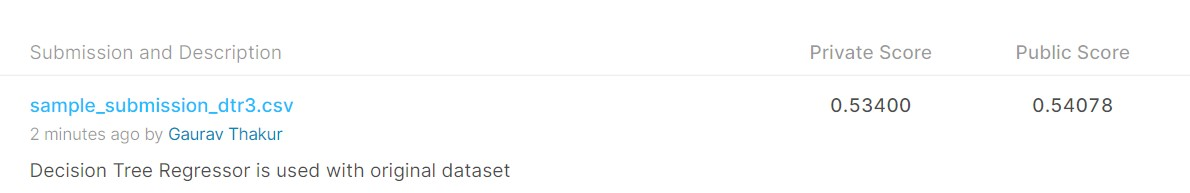

#### Submission Score of DTR using Original data set (Depth = 10)

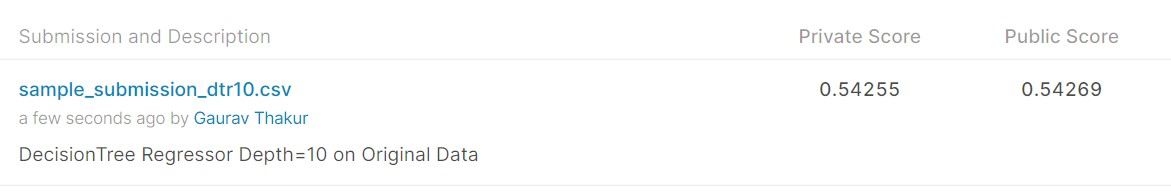

#### Submission Score of DTR using Original data set + PCA (Depth = 10)

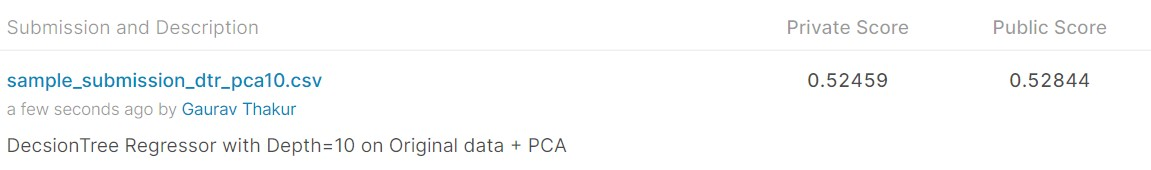

1. Submission score on PCA + Original data is very low and Score on Original data is good.Further improvement cannot be done. We have to move on to next models to try further improvement. 



2. DecisionTree Regressor is performing better than SVR.

## 4. Random Forest Regressor

### 4.1 Fitting original data to RandomForest Regressor

In [150]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 3, 5, 10, 15, 20, 25, 30,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15,30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor = RandomizedSearchCV(rf, param_distributions = parameters, cv = 10, verbose=10, n_jobs=-1,random_state = 25)
#Fit the model
best_regressor = regressor.fit(original_X_train, y_train)
# get the best parameters
best_max_depth = best_regressor.best_estimator_.get_params()['max_depth']
best_n_estimators = best_regressor.best_estimator_.get_params()['n_estimators']
best_max_features = best_regressor.best_estimator_.get_params()['max_features']
best_min_samples_split = best_regressor.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf = best_regressor.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)
print('Best max_features:', best_max_features)
print('Best min_samples_split:', best_min_samples_split)
print('Best min_samples_leaf:', best_min_samples_leaf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth: 5
Best n_estimators: 500
Best max_features: auto
Best min_samples_split: 5
Best min_samples_leaf: 10
CPU times: total: 8 s
Wall time: 51 s


#### 4.1.1 Getting R2 score on Original data using RFR 

In [151]:
rf1 = RandomForestRegressor(n_estimators=best_n_estimators,
               max_features=best_max_features,
               max_depth=best_max_depth,
               min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf)

rf1.fit(original_X_train, y_train)

pred_train_rf = rf1.predict(original_X_train)
train_score_rf_original = r2_score(y_train, pred_train_rf)
print('*'*100)
print(f"For max_depth={best_max_depth}, Train R2 on Original data using RF = {train_score_rf_original}")
print('*'*100)
pred_cv_rf = rf1.predict(original_X_cv)
cv_score_rf_original = r2_score(y_cv, pred_cv_rf)
print(f"For max_depth={best_max_depth}, CV R2 on Original data using RF = {cv_score_rf_original}")
print('*'*100)

****************************************************************************************************
For max_depth=5, Train R2 on Original data using RF = 0.6376538541056835
****************************************************************************************************
For max_depth=5, CV R2 on Original data using RF = 0.5915758496524668
****************************************************************************************************


#### 4.1.2 Training RFR on Full Train dataset and saving the model for submission

In [152]:
RF_model = RandomForestRegressor(n_estimators=best_n_estimators,
               max_features=best_max_features,
               max_depth=best_max_depth,
               min_samples_split=best_min_samples_split,
               min_samples_leaf= best_min_samples_leaf)

X_full_train_rf = np.vstack((original_X_train, original_X_cv))
y_full_train_rf = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

RF_model.fit(X_full_train_rf,y_full_train_rf)

filename = 'RF_Original_feat_model.sav'
RF_model = joblib.dump(RF_model, filename)
print(f'Saved {filename}')

C:\Users\gaura\AppData\Local\Temp\ipykernel_2432\928297581.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_full_train_rf,y_full_train_rf)


Saved RF_Original_feat_model.sav


In [153]:
filename = 'RF_Original_feat_model.sav'
RF_model = joblib.load(filename)
print(f'Loaded {filename}')

pred_trainfull_rf = RF_model.predict(X_full_train_rf)
train_score_rf = r2_score(y_full_train_rf, pred_trainfull_rf)
print('*'*100)
print(f"Train R2 On Original Data using RandomForest Regressor = {train_score_rf}")

Loaded RF_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data using RandomForest Regressor = 0.6325722179826352


In [154]:
pred_test_rf = RF_model.predict(original_X_test)
submission_rf = pd.read_csv('sample_submission.csv')
submission_rf['y'] = pred_test_rf
submission_rf.to_csv(f'sample_submission_rf={best_max_depth}.csv', index=False)
submission_rf.head()

C:\Users\gaura\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ID           y
0   1   77.766958
1   2   94.068862
2   3   78.269545
3   4   76.846013
4   5  111.871149

### 4.2 Fitting on PCA  +  Original Data using RandomForest Regressor

In [155]:
%%time

n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 3, 5, 10, 15, 20, 25, 30,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15,30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf2 = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor2 = RandomizedSearchCV(rf2, param_distributions = parameters, cv = 10, verbose=10, n_jobs=-1,random_state = 25)
#Fit the model
best_regressor2 = regressor2.fit(train_pca, y_train)
# get the best parameters
best_max_depth2 = best_regressor2.best_estimator_.get_params()['max_depth']
best_n_estimators2 = best_regressor2.best_estimator_.get_params()['n_estimators']
best_max_features2 = best_regressor2.best_estimator_.get_params()['max_features']
best_min_samples_split2 = best_regressor2.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf2 = best_regressor2.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth using RF on Original Data + PCA:', best_max_depth2)
print('Best n_estimators using RF on Original Data + PCA:', best_n_estimators2)
print('Best max_features using RF on Original Data + PCA:', best_max_features2)
print('Best min_samples_split using RF on Original Data + PCA:', best_min_samples_split2)
print('Best min_samples_leaf using RF on Original Data + PCA:', best_min_samples_leaf2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth using RF on Original Data + PCA: 5
Best n_estimators using RF on Original Data + PCA: 500
Best max_features using RF on Original Data + PCA: auto
Best min_samples_split using RF on Original Data + PCA: 5
Best min_samples_leaf using RF on Original Data + PCA: 10
CPU times: total: 12.5 s
Wall time: 1min 27s


#### 4.2.1 Getting R2 score on Original data + PCA using RFR 

In [156]:
rf2 = RandomForestRegressor(n_estimators=best_n_estimators2,
               max_features=best_max_features2,
               max_depth=best_max_depth2,
             #### 4.2.2 Training DTR on Full Train dataset and saving the model for submission  min_samples_split=best_min_samples_split2,
               min_samples_leaf= best_min_samples_leaf2)

rf2.fit(train_pca, y_train)

pred_train_rf2 = rf2.predict(train_pca)
train_score_rf2 = r2_score(y_train, pred_train_rf2)
print('*'*100)
print(f"For max_depth={best_max_depth2}, Train R2 using RF on Original + PCA data= {train_score_rf2}")
print('*'*100)
pred_cv_rf2 = rf2.predict(cv_pca)
cv_score_rf2 = r2_score(y_cv, pred_cv_rf2)
print(f"For max_depth={best_max_depth2}, CV R2 using RF on Original + PCA data= {cv_score_rf2}")
print('*'*100)

****************************************************************************************************
For max_depth=5, Train R2 using RF on Original + PCA data= 0.6442814628952133
****************************************************************************************************
For max_depth=5, CV R2 using RF on Original + PCA data= 0.5909155320529964
****************************************************************************************************


#### 4.2.2 Training DTR on Full Train dataset and saving the model for submission

In [157]:
RF_model_pca = RandomForestRegressor(n_estimators=best_n_estimators2,
               max_features=best_max_features2,
               max_depth=best_max_depth2,
               min_samples_split=best_min_samples_split2,
               min_samples_leaf= best_min_samples_leaf2)

X_full_train_rf_pca = np.vstack((train_pca,cv_pca))
y_full_train_rf_pca = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

RF_model_pca.fit(X_full_train_rf_pca,y_full_train_rf_pca)

filename = 'RF_PCA_Original_feat_model.sav'
RF_model_pca = joblib.dump(RF_model_pca, filename)
print(f'Saved {filename}')

C:\Users\gaura\AppData\Local\Temp\ipykernel_2432\2506115890.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_pca.fit(X_full_train_rf_pca,y_full_train_rf_pca)


Saved RF_PCA_Original_feat_model.sav


In [158]:
filename = 'RF_PCA_Original_feat_model.sav'
RF_model_pca = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_rf_pca = RF_model_pca.predict(X_full_train_rf_pca)
train_score_rf_pca = r2_score(y_full_train_rf_pca, pred_train_rf_pca)
print('*'*100)
print(f"Train R2 On Original Data + PCA using RF = {train_score_rf_pca}")

Loaded RF_PCA_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA using RF = 0.637632242592443


In [159]:
pred_test_rf_pca = RF_model_pca.predict(test_pca)
submission_rf_pca = pd.read_csv('sample_submission.csv')
submission_rf_pca['y'] = pred_test_dtr_pca_ica
submission_rf_pca.to_csv(f'sample_submission_rf_pca={bestMaxDepth4}.csv', index=False)
submission_rf_pca.head()

ID           y
0   1   78.001099
1   2   94.048802
2   3   78.001099
3   4   78.001099
4   5  112.242113

### 4.3 Fitting on PCA + SVD + Original Data using RandomForest Regressor

In [160]:
%%time

n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 3, 5, 10, 15, 20, 25, 30,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15,30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf3 = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor3 = RandomizedSearchCV(rf3, param_distributions = parameters, cv = 10, verbose=10, n_jobs=-1,random_state = 25)
#Fit the model
best_regressor3 = regressor3.fit(train_pca_svd, y_train)
# get the best parameters
best_max_depth3 = best_regressor3.best_estimator_.get_params()['max_depth']
best_n_estimators3 = best_regressor3.best_estimator_.get_params()['n_estimators']
best_max_features3 = best_regressor3.best_estimator_.get_params()['max_features']
best_min_samples_split3 = best_regressor3.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf3 = best_regressor3.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth using RF on Original Data + PCA + SVD:', best_max_depth3)
print('Best n_estimators using RF on Original Data + PCA + SVD:', best_n_estimators3)
print('Best max_features using RF on Original Data + PCA + SVD:', best_max_features3)
print('Best min_samples_split using RF on Original Data + PCA + SVD:', best_min_samples_split3)
print('Best min_samples_leaf using RF on Original Data + PCA + SVD:', best_min_samples_leaf3)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth using RF on Original Data + PCA + SVD: 5
Best n_estimators using RF on Original Data + PCA + SVD: 500
Best max_features using RF on Original Data + PCA + SVD: auto
Best min_samples_split using RF on Original Data + PCA + SVD: 5
Best min_samples_leaf using RF on Original Data + PCA + SVD: 10
CPU times: total: 44.6 s
Wall time: 4min 59s


#### 4.3.1 Getting R2 score on Original data + PCA + SVD using RFR

In [161]:
rf3 = RandomForestRegressor(n_estimators=best_n_estimators3,
               max_features=best_max_features3,
               max_depth=best_max_depth3,
               min_samples_split=best_min_samples_split3,
               min_samples_leaf= best_min_samples_leaf3)

rf3.fit(train_pca_svd, y_train)

pred_train_rf3 = rf3.predict(train_pca_svd)
train_score_rf3 = r2_score(y_train, pred_train_rf3)
print('*'*100)
print(f"For max_depth={best_max_depth3}, Train R2 on Original data + PCA + SVD using RF = {train_score_rf3}")
print('*'*100)
pred_cv_rf3 = rf3.predict(cv_pca_svd)
cv_score_rf3 = r2_score(y_cv, pred_cv_rf3)
print(f"For max_depth={best_max_depth3}, CV R2 on Original data + PCA + SVD using RF = {cv_score_rf3}")
print('*'*100)

****************************************************************************************************
For max_depth=5, Train R2 on Original data + PCA + SVD using RF = 0.6555116316462519
****************************************************************************************************
For max_depth=5, CV R2 on Original data + PCA + SVD using RF = 0.5963029299324463
****************************************************************************************************


#### 4.3.2 Training RFR on Full Train dataset and saving the model for submission

In [162]:
RF_model_pca_svd = RandomForestRegressor(n_estimators=best_n_estimators3,
               max_features=best_max_features3,
               max_depth=best_max_depth3,
               min_samples_split=best_min_samples_split3,
               min_samples_leaf= best_min_samples_leaf3)

X_full_train_rf_pca_svd = np.vstack((train_pca_svd,cv_pca_svd))
y_full_train_rf_pca_svd = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

RF_model_pca_svd.fit(X_full_train_rf_pca_svd,y_full_train_rf_pca_svd)

filename = 'RF_PCA_SVD_Original_feat_model.sav'
RF_model_pca_svd = joblib.dump(RF_model_pca_svd, filename)
print(f'Saved {filename}')

C:\Users\gaura\AppData\Local\Temp\ipykernel_2432\1572987160.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_pca_svd.fit(X_full_train_rf_pca_svd,y_full_train_rf_pca_svd)


Saved RF_PCA_SVD_Original_feat_model.sav


In [163]:
filename = 'RF_PCA_SVD_Original_feat_model.sav'
RF_model_pca_svd = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_rf_pca_svd = RF_model_pca_svd.predict(X_full_train_rf_pca_svd)
train_score_rf_pca_svd = r2_score(y_full_train_rf_pca_svd, pred_train_rf_pca_svd)
print('*'*100)
print(f"Train R2 On Original Data + PCA + SVD using RF = {train_score_rf_pca_svd}")

Loaded RF_PCA_SVD_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA + SVD using RF = 0.6468685171003918


In [164]:
pred_test_rf_pca_svd = RF_model_pca_svd.predict(test_pca_svd)
submission_rf_pca_svd = pd.read_csv('sample_submission.csv')
submission_rf_pca_svd['y'] = pred_test_dtr_pca_svd
submission_rf_pca_svd.to_csv(f'sample_submission_rf_pca_svd={best_max_depth3}.csv', index=False)
submission_rf_pca_svd.head()

ID           y
0   1   78.001099
1   2   94.048802
2   3   78.001099
3   4   78.001099
4   5  112.307053

### 4.4 Fitting PCA + ICA + Original Data on RandomForest Regressor

In [165]:
%%time

n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 3, 5, 10, 15, 20, 25, 30,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15,30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50]


# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf4 = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor4 = RandomizedSearchCV(rf4, param_distributions = parameters, cv = 10, verbose=10, n_jobs=-1,random_state = 25)
#Fit the model
best_regressor4 = regressor4.fit(train_pca_ica, y_train)
# get the best parameters
best_max_depth4 = best_regressor4.best_estimator_.get_params()['max_depth']
best_n_estimators4 = best_regressor4.best_estimator_.get_params()['n_estimators']
best_max_features4 = best_regressor4.best_estimator_.get_params()['max_features']
best_min_samples_split4 = best_regressor4.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf4 = best_regressor4.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth using RF on Original Data + PCA + ICA:', best_max_depth4)
print('Best n_estimators using RF on Original Data + PCA + ICA:', best_n_estimators4)
print('Best max_features using RF on Original Data + PCA + ICA:', best_max_features4)
print('Best min_samples_split using RF on Original Data + PCA + ICA:', best_min_samples_split4)
print('Best min_samples_leaf using RF on Original Data + PCA + ICA:', best_min_samples_leaf4)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth using RF on Original Data + PCA + ICA: 3
Best n_estimators using RF on Original Data + PCA + ICA: 200
Best max_features using RF on Original Data + PCA + ICA: auto
Best min_samples_split using RF on Original Data + PCA + ICA: 5
Best min_samples_leaf using RF on Original Data + PCA + ICA: 20
CPU times: total: 4.86 s
Wall time: 1min 49s


#### 4.4.1 Random Forest Regressor on PCA + ICA + Original Dataset

In [166]:
rf4 = RandomForestRegressor(n_estimators=best_n_estimators4,
               max_features=best_max_features4,
               max_depth=best_max_depth4,
               min_samples_split=best_min_samples_split4,
               min_samples_leaf= best_min_samples_leaf4)

rf4.fit(train_pca_ica, y_train)

pred_train_rf4 = rf4.predict(train_pca_ica)
train_score_rf4 = r2_score(y_train, pred_train_rf4)
print('*'*100)
print(f"For max_depth={best_max_depth4}, Train R2 on Oiginal + PCA + ICA Data= {train_score_rf4}")
print('*'*100)
pred_cv_rf4 = rf4.predict(cv_pca_ica)
cv_score_rf4 = r2_score(y_cv, pred_cv_rf4)
print(f"For max_depth={best_max_depth4}, CV R2 on Oiginal + PCA + ICA Data= {cv_score_rf4}")
print('*'*100)

****************************************************************************************************
For max_depth=3, Train R2 on Oiginal + PCA + ICA Data= 0.6211189340540423
****************************************************************************************************
For max_depth=3, CV R2 on Oiginal + PCA + ICA Data= 0.5900838657823642
****************************************************************************************************


#### 4.3.2 Training DTR on Full Train dataset and saving the model for submission

In [167]:
RF_model_pca_ica = RandomForestRegressor(n_estimators=best_n_estimators4,
               max_features=best_max_features4,
               max_depth=best_max_depth4,
               min_samples_split=best_min_samples_split4,
               min_samples_leaf= best_min_samples_leaf4)

X_full_train_rf_pca_ica = np.vstack((train_pca_ica,cv_pca_ica))
y_full_train_rf_pca_ica = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

RF_model_pca_ica.fit(X_full_train_rf_pca_ica,y_full_train_rf_pca_ica)

filename = 'RF_PCA_ICA_Original_feat_model.sav'
RF_model_pca_ica = joblib.dump(RF_model_pca_ica, filename)
print(f'Saved {filename}')

C:\Users\gaura\AppData\Local\Temp\ipykernel_2432\4291355188.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_pca_ica.fit(X_full_train_rf_pca_ica,y_full_train_rf_pca_ica)


Saved RF_PCA_ICA_Original_feat_model.sav


In [168]:
filename = 'RF_PCA_ICA_Original_feat_model.sav'
RF_model_pca_ica = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_rf_pca_ica = RF_model_pca_ica.predict(X_full_train_rf_pca_ica)
train_score_rf_pca_ica = r2_score(y_full_train_rf_pca_ica, pred_train_rf_pca_ica)
print('*'*100)
print(f"Train R2 On Original Data + PCA + SVD using RF = {train_score_rf_pca_ica}")

Loaded RF_PCA_ICA_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA + SVD using RF = 0.615556236348068


In [169]:
pred_test_rf_pca_ica = RF_model_pca_ica.predict(test_pca_ica)
submission_rf_pca_ica = pd.read_csv('sample_submission.csv')
submission_rf_pca_ica['y'] = pred_test_rf_pca_ica
submission_rf_pca_ica.to_csv(f'sample_submission_rf_pca_ica={best_max_depth4}.csv', index=False)
submission_rf_pca_ica.head()

ID           y
0   1   77.727915
1   2   94.050710
2   3   77.990045
3   4   77.744132
4   5  112.154180

### 4.5 Fitting PCA + SVD + ICA + Original Data on RandomForest Regressor

In [170]:
train_pca_ica_svd = np.hstack((train_pca_svd,ica_train))
cv_pca_ica_svd = np.hstack((cv_pca_svd,ica_cv))
test_pca_ica_svd = np.hstack((test_pca_svd,ica_test))

print(train_pca_ica_svd.shape,y_train.shape)
print(cv_pca_ica_svd.shape,y_cv.shape)
print(test_pca_ica_svd.shape)

(3360, 440) (3360,)
(841, 440) (841,)
(4209, 440)


In [171]:
%%time

n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 3, 5, 10, 15, 20, 25, 30,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15,30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf5 = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor5 = RandomizedSearchCV(rf5, param_distributions=parameters, cv = 10, verbose=10,return_train_score=True, n_jobs=-1)
#Fit the model
best_regressor5 = regressor5.fit(train_pca_ica_svd, y_train)
# get the best parameters
best_max_depth5 = best_regressor5.best_estimator_.get_params()['max_depth']
best_n_estimators5 = best_regressor5.best_estimator_.get_params()['n_estimators']
best_max_features5 = best_regressor5.best_estimator_.get_params()['max_features']
best_min_samples_split5 = best_regressor5.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf5 = best_regressor5.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth using RF on Original Data + PCA + ICA + SVD:', best_max_depth5)
print('Best n_estimators using RF on Original Data + PCA + ICA + SVD:', best_n_estimators5)
print('Best max_features using RF on Original Data + PCA + ICA + SVD:', best_max_features5)
print('Best min_samples_split using RF on Original Data + PCA + ICA + SVD:', best_min_samples_split5)
print('Best min_samples_leaf using RF on Original Data + PCA + ICA + SVD:', best_min_samples_leaf5)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth using RF on Original Data + PCA + ICA + SVD: 30
Best n_estimators using RF on Original Data + PCA + ICA + SVD: 50
Best max_features using RF on Original Data + PCA + ICA + SVD: auto
Best min_samples_split using RF on Original Data + PCA + ICA + SVD: 2
Best min_samples_leaf using RF on Original Data + PCA + ICA + SVD: 50
CPU times: total: 6.11 s
Wall time: 7min 21s


#### 4.5.1 RandomForest Regressor on Pca + ICA + SVD + Original Dataset

In [172]:
rf5 = RandomForestRegressor(n_estimators=best_n_estimators5,
               max_features=best_max_features5,
               max_depth=best_max_depth5,
               min_samples_split=best_min_samples_split5,
               min_samples_leaf= best_min_samples_leaf5)

rf5.fit(train_pca_ica_svd, y_train)

pred_train_rf5 = rf5.predict(train_pca_ica_svd)
train_score_rf5 = r2_score(y_train, pred_train_rf5)
print('*'*100)
print(f"For max_depth={best_max_depth5}, Train R2 on Original + PCA + SVD + ICA using RF = {train_score_rf5}")
print('*'*100)
pred_cv_rf5 = rf5.predict(cv_pca_ica_svd)
cv_score_rf5 = r2_score(y_cv, pred_cv_rf5)
print(f"For max_depth={best_max_depth5}, CV R2 on Original + PCA + SVD + ICA using RF = {cv_score_rf5}")
print('*'*100)

****************************************************************************************************
For max_depth=30, Train R2 on Original + PCA + SVD + ICA using RF = 0.6638978195017656
****************************************************************************************************
For max_depth=30, CV R2 on Original + PCA + SVD + ICA using RF = 0.5961263108108453
****************************************************************************************************


#### 4.5.2 Training RFR on Full Train dataset and saving the model for submission

In [173]:
RF_model_pca_ica_svd = RandomForestRegressor(n_estimators=best_n_estimators5,
               max_features=best_max_features5,
               max_depth=best_max_depth5,
               min_samples_split=best_min_samples_split5,
               min_samples_leaf= best_min_samples_leaf5)

X_full_train_rf_pca_ica_svd = np.vstack((train_pca_ica_svd,cv_pca_ica_svd))
y_full_train_rf_pca_ica_svd = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

RF_model_pca_ica_svd.fit(X_full_train_rf_pca_ica_svd,y_full_train_rf_pca_ica_svd)

filename = 'RF_PCA_ICA_SVD_Original_feat_model.sav'
RF_model_pca_ica_svd = joblib.dump(RF_model_pca_ica_svd, filename)
print(f'Saved {filename}')

C:\Users\gaura\AppData\Local\Temp\ipykernel_2432\1101672848.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_pca_ica_svd.fit(X_full_train_rf_pca_ica_svd,y_full_train_rf_pca_ica_svd)


Saved RF_PCA_ICA_SVD_Original_feat_model.sav


In [174]:
filename = 'RF_PCA_ICA_SVD_Original_feat_model.sav'
RF_model_pca_ica_svd = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_rf_pca_ica_svd = RF_model_pca_ica_svd.predict(X_full_train_rf_pca_ica_svd)
train_score_rf_pca_ica_svd = r2_score(y_full_train_rf_pca_ica_svd, pred_train_rf_pca_ica_svd)
print('*'*100)
print(f"Train R2 On Original Data + PCA + ICA + SVD using RF = {train_score_rf_pca_ica_svd}")

Loaded RF_PCA_ICA_SVD_Original_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA + ICA + SVD using RF = 0.6626833885112662


In [175]:
pred_test_rf_pca_ica_svd = RF_model_pca_ica_svd.predict(test_pca_ica_svd)
submission_rf_pca_ica_svd = pd.read_csv('sample_submission.csv')
submission_rf_pca_ica_svd['y'] = pred_test_rf_pca_ica_svd
submission_rf_pca_ica_svd.to_csv(f'sample_submission_rf_pca_ica_svd={best_max_depth5}.csv', index=False)
submission_rf_pca_ica_svd.head()

ID           y
0   1   78.522865
1   2   93.435227
2   3   78.082071
3   4   77.829948
4   5  111.481353

## Observation for RandomForest Regressor

In [188]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Features used With Original Data", "Model", "N_Estimators","Max Depth","Train R2", " CV R2", 'FUll Train R2']

x.add_row(["Original", "RFR", best_n_estimators,best_max_depth,round(train_score_rf_original,5),round(cv_score_rf_original,5),round(train_score_rf,5)])
x.add_row(["Original+PCA", "RFR", best_n_estimators2,best_max_depth2,round(train_score_rf2,5),round(cv_score_rf2,5),round(train_score_rf_pca,5)])
x.add_row(["Original + PCA + SVD", "RFR", best_n_estimators3,best_max_depth3,round(train_score_rf3,5),round(cv_score_rf3,5),round(train_score_rf_pca_svd,5)])
x.add_row(["Original + PCA + ICA", "RFR",best_n_estimators4,best_max_depth4,round(train_score_rf4,5),round(cv_score_rf4,5),round(train_score_rf_pca_ica,5)])
x.add_row(["Original + PCA + ICA + SVD", "RFR", best_n_estimators5,best_max_depth5,round(train_score_rf5,5),round(cv_score_rf5,5),round(train_score_rf_pca_ica_svd,5)])
print(x)

+----------------------------------+-------+--------------+-----------+----------+---------+---------------+
| Features used With Original Data | Model | N_Estimators | Max Depth | Train R2 |   CV R2 | FUll Train R2 |
+----------------------------------+-------+--------------+-----------+----------+---------+---------------+
|             Original             |  RFR  |     500      |     5     | 0.63765  | 0.59158 |    0.63257    |
|           Original+PCA           |  RFR  |     500      |     5     | 0.64428  | 0.59092 |    0.63763    |
|       Original + PCA + SVD       |  RFR  |     500      |     5     | 0.65551  |  0.5963 |    0.64687    |
|       Original + PCA + ICA       |  RFR  |     200      |     3     | 0.62112  | 0.59008 |    0.61556    |
|    Original + PCA + ICA + SVD    |  RFR  |      50      |     30    |  0.6639  | 0.59613 |    0.66268    |
+----------------------------------+-------+--------------+-----------+----------+---------+---------------+


### Submission Score of RFR using Original data + PCA +SVD   (Depth = 5)

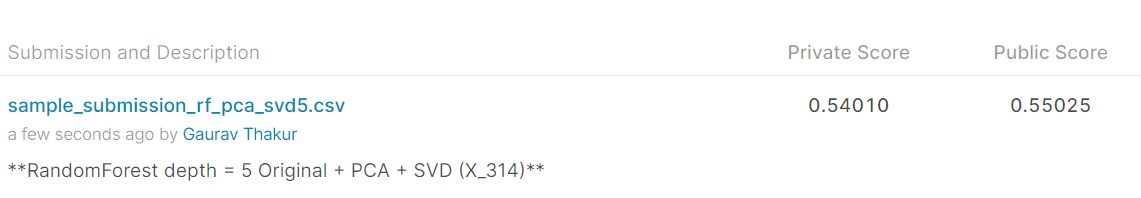

##### Train R2 = 0.64687
#####  Test Public Score = 0.55025
##### Test Private Score = 0.54010

### Submission Score of RFR using Original data + PCA +SVD + ICA   (Depth = 30)

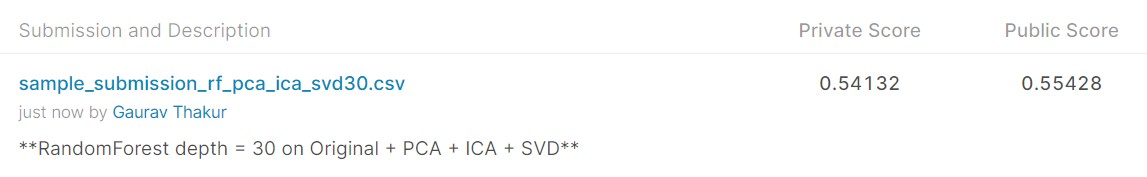

##### Train R2 = 0.66268
#####  Test Public Score = 0.55428
##### Test Private Score = 0.54132

From the above scoring we can infer that by combining the Original data with PCA , ICA and SVD data gives us overall good result of Public Test Score and Private Test Score.


### 4.6 Interactive Features with GRP

- Two way interactions X314, X315
- Three way interactions X118,X314,X315

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700

### 4.6.1 Fitting RandomForest Regressor on Original + PCA + ICA + SVD + Interactive + GRP

In [195]:
%%time

n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 3, 5, 10, 15, 20, 25, 30,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15,30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf6 = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor6 = RandomizedSearchCV(rf6, param_distributions=parameters, cv = 10, verbose=10,return_train_score=True, n_jobs=-1)
#Fit the model
best_regressor6 = regressor6.fit(combined_train, y_train)
# get the best parameters
best_max_depth6 = best_regressor6.best_estimator_.get_params()['max_depth']
best_n_estimators6 = best_regressor6.best_estimator_.get_params()['n_estimators']
best_max_features6 = best_regressor6.best_estimator_.get_params()['max_features']
best_min_samples_split6 = best_regressor6.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf6 = best_regressor6.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth using RF on Combined Data:', best_max_depth6)
print('Best n_estimators using RF on Combined Data:', best_n_estimators6)
print('Best max_features using RF on Combined Data:', best_max_features6)
print('Best min_samples_split using RF on Combined Data:', best_min_samples_split6)
print('Best min_samples_leaf using RF on Combined Data:', best_min_samples_leaf6)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth using RF on Combined Data: 25
Best n_estimators using RF on Combined Data: 500
Best max_features using RF on Combined Data: auto
Best min_samples_split using RF on Combined Data: 5
Best min_samples_leaf using RF on Combined Data: 50
CPU times: total: 1min 1s
Wall time: 6min 27s


#### 4.6.1.1 RandomForest Regressor on Pca + ICA + SVD + Original Dataset

In [196]:
rf6 = RandomForestRegressor(n_estimators=best_n_estimators6,
               max_features=best_max_features6,
               max_depth=best_max_depth6,
               min_samples_split=best_min_samples_split6,
               min_samples_leaf= best_min_samples_leaf6)

rf6.fit(combined_train, y_train)

pred_train_rf6 = rf6.predict(combined_train)
train_score_rf6 = r2_score(y_train, pred_train_rf6)
print('*'*100)
print(f"For max_depth={best_max_depth6}, Train R2 on Original + PCA + SVD + ICA using RF = {train_score_rf6}")
print('*'*100)
pred_cv_rf6 = rf6.predict(combined_cv)
cv_score_rf6 = r2_score(y_cv, pred_cv_rf6)
print(f"For max_depth={best_max_depth6}, CV R2 on Original + PCA + SVD + ICA + GRP + Interactive using RF = {cv_score_rf6}")
print('*'*100)

****************************************************************************************************
For max_depth=25, Train R2 on Original + PCA + SVD + ICA using RF = 0.6662743404152113
****************************************************************************************************
For max_depth=25, CV R2 on Original + PCA + SVD + ICA + GRP + Interactive using RF = 0.5939127597465679
****************************************************************************************************


#### 4.6.1.2 Training RFR on Full Train dataset and saving the model for submission

In [197]:
RF_model_combined = RandomForestRegressor(n_estimators=best_n_estimators6,
               max_features=best_max_features6,
               max_depth=best_max_depth6,
               min_samples_split=best_min_samples_split6,
               min_samples_leaf= best_min_samples_leaf6)

X_full_train_combined = np.vstack((combined_train,combined_cv))
y_full_train_combined = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

RF_model_combined.fit(X_full_train_combined,y_full_train_combined)

filename = 'RF_combined_feat_model.sav'
RF_model_combined = joblib.dump(RF_model_combined, filename)
print(f'Saved {filename}')

C:\Users\gaura\AppData\Local\Temp\ipykernel_2432\1686041836.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_combined.fit(X_full_train_combined,y_full_train_combined)


Saved RF_combined_feat_model.sav


In [198]:
filename = 'RF_combined_feat_model.sav'
RF_model_combined = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_combined = RF_model_combined.predict(X_full_train_combined)
train_score_combined = r2_score(y_full_train_combined, pred_train_combined)
print('*'*100)
print(f"Train R2 On Original Data + PCA + ICA + SVD + GRP + Interactive using RF = {train_score_combined}")

Loaded RF_combined_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA + ICA + SVD + GRP + Interactive using RF = 0.6651548135906065


In [199]:
pred_test_combined = RF_model_combined.predict(combined_test)
submission_combined = pd.read_csv('sample_submission.csv')
submission_combined['y'] = pred_test_combined
submission_combined.to_csv(f'sample_submission_combined={best_max_depth6}.csv', index=False)
submission_combined.head()

ID           y
0   1   77.819279
1   2   93.772404
2   3   78.381141
3   4   77.443688
4   5  111.606523

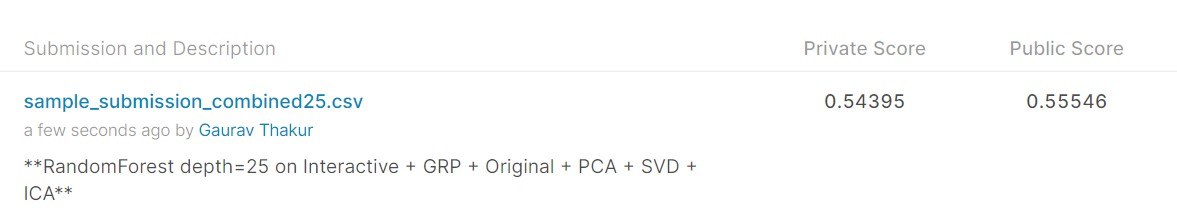

### 4.7 Extra Interactive Features 

- Two way interactions X47, X48  (First Place Solution)
- Two way interactions X118, X29
- Three way interactions X118,X29,X136

### 4.7.1 Fitting RandomForest Regressor on Original + PCA + ICA + SVD + More Interactive + GRP

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
n_estimators = [10, 20, 30, 50, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 3, 5, 10, 15, 20, 25, 30,50]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15,30, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50]

# create parameters dictionary
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#Create a Random Forest Regressor model
rf7 = RandomForestRegressor()
#Tune hyperparameters using RandomizedSearchCV
regressor7 = RandomizedSearchCV(rf7, param_distributions=parameters, cv = 10, verbose=10,return_train_score=True, n_jobs= 4)
#Fit the model
best_regressor7 = regressor7.fit(combined_train_new, y_train)
# get the best parameters
best_max_depth7 = best_regressor7.best_estimator_.get_params()['max_depth']
best_n_estimators7 = best_regressor7.best_estimator_.get_params()['n_estimators']
best_max_features7 = best_regressor7.best_estimator_.get_params()['max_features']
best_min_samples_split7 = best_regressor7.best_estimator_.get_params()['min_samples_split']
best_min_samples_leaf7 = best_regressor7.best_estimator_.get_params()['min_samples_leaf']
#Print The best parameters
print('Best max_depth using RF on Combined Data:', best_max_depth7)
print('Best n_estimators using RF on Combined Data:', best_n_estimators7)
print('Best max_features using RF on Combined Data:', best_max_features7)
print('Best min_samples_split using RF on Combined Data:', best_min_samples_split7)
print('Best min_samples_leaf using RF on Combined Data:', best_min_samples_leaf7)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best max_depth using RF on Combined Data: 3
Best n_estimators using RF on Combined Data: 30
Best max_features using RF on Combined Data: auto
Best min_samples_split using RF on Combined Data: 30
Best min_samples_leaf using RF on Combined Data: 20
CPU times: total: 2.3 s
Wall time: 2min 13s


In [50]:
from sklearn.metrics import r2_score
rf7 = RandomForestRegressor(n_estimators=best_n_estimators7,
               max_features=best_max_features7,
               max_depth=best_max_depth7,
               min_samples_split=best_min_samples_split7,
               min_samples_leaf= best_min_samples_leaf7)

rf7.fit(combined_train_new, y_train)

pred_train_rf7 = rf7.predict(combined_train_new)
train_score_rf7 = r2_score(y_train, pred_train_rf7)
print('*'*100)
print(f"For max_depth={best_max_depth7}, Train R2 on Original + PCA + SVD + GRP + More Interactive using RF = {train_score_rf7}")
print('*'*100)
pred_cv_rf7 = rf7.predict(combined_cv_new)
cv_score_rf7 = r2_score(y_cv, pred_cv_rf7)
print(f"For max_depth={best_max_depth7}, CV R2 on Original + PCA + SVD + GRP + More Interactive using RF = {cv_score_rf7}")
print('*'*100)

****************************************************************************************************
For max_depth=3, Train R2 on Original + PCA + SVD + GRP + More Interactive using RF = 0.625434359802292
****************************************************************************************************
For max_depth=3, CV R2 on Original + PCA + SVD + GRP + More Interactive using RF = 0.5962505888186028
****************************************************************************************************


In [51]:
import joblib
RF_model7 = RandomForestRegressor(n_estimators=best_n_estimators7,
               max_features=best_max_features7,
               max_depth=best_max_depth7,
               min_samples_split=best_min_samples_split7,
               min_samples_leaf= best_min_samples_leaf7)

X_full_train_rf7 = np.vstack((combined_train_new, combined_cv_new))
y_full_train_rf7 = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

RF_model7.fit(X_full_train_rf7,y_full_train_rf7)

filename = 'RF_Combined_New_feat_model.sav'
RF_model7 = joblib.dump(RF_model7, filename)
print(f'Saved {filename}')

Saved RF_Combined_New_feat_model.sav


In [52]:
filename = 'RF_Combined_New_feat_model.sav'
RF_model7 = joblib.load(filename)
print(f'Loaded {filename}')

pred_trainfull_rf7 = RF_model7.predict(X_full_train_rf7)
train_score_rf7 = r2_score(y_full_train_rf7, pred_trainfull_rf7)
print('*'*100)
print(f"Train R2 On Original + PCA + SVD + GRP + More Interactive using RF = {train_score_rf7}")

Loaded RF_Combined_New_feat_model.sav
****************************************************************************************************
Train R2 On Original + PCA + SVD + GRP + More Interactive using RF = 0.6204925290573429


In [53]:
pred_test_rf7 = RF_model7.predict(combined_test_new)
submission_rf7 = pd.read_csv('sample_submission.csv')
submission_rf7['y'] = pred_test_rf7
submission_rf7.to_csv(f'sample_submission_rf_combined_new={best_max_depth7}.csv', index=False)
submission_rf7.head()

ID           y
0   1   77.040182
1   2   93.921887
2   3   78.112930
3   4   77.797842
4   5  112.262912

## 5 XGBoost Regressor

### 5.1 Fitting RandomForest Regressor on Original + PCA + SVD + Interactive + GRP

### Searching hyperparameters for XGB Regressor

#### 5.1.1 Getting R2 score on Original data + PCA + SVD + Interactive + GRP using XGBR

In [ ]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

neigh2 = XGBRegressor(random_state=42,n_jobs= -1) 

parameters = {'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.3,0.5,1], 
              'n_estimators':[100,150,200,300,500], 
              'max_depth':[2,3,5,10,20], 
              'colsample_bytree':[0.1,0.3,0.5,0.7,1], 
              "min_child_weight" : [ 1, 3, 5, 7, 10 ],
              "min_samples_leaf": [2,5,10,20,50,100],
              'subsample':[0.1,0.3,0.5,0.9,1], 
              'gamma':[1e-2,1e-3,0,0.1,0.01,0.2,0.5,1],  
              'reg_lamda'  :[0,0.0001, 0.001, 0.005, 0.01, 0.05],
              'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]}  

reg_xg2 = RandomizedSearchCV(neigh2,parameters,cv= 30, scoring='r2', return_train_score=True, n_jobs= -1,
                       verbose=10) 

reg_xg2.fit(pca_svd_int_train, y_train)

In [ ]:
best_max_depth_xg2 = reg_xg2.best_estimator_.get_params()['max_depth']
best_n_estimators_xg2 = reg_xg2.best_estimator_.get_params()['n_estimators']
best_colsample_bytree_xg2 = reg_xg2.best_estimator_.get_params()['colsample_bytree']
best_subsample_xg2 = reg_xg2.best_estimator_.get_params()['subsample']
best_gamma_xg2 = reg_xg2.best_estimator_.get_params()['gamma']
best_reg_alpha_xg2 = reg_xg2.best_estimator_.get_params()['reg_alpha']
best_learning_rate_xg2 = reg_xg2.best_estimator_.get_params()['learning_rate']
best_min_child_weight_xg2 = reg_xg2.best_estimator_.get_params()["min_child_weight"]
best_min_samples_leaf_xg2 = reg_xg2.best_estimator_.get_params()["min_samples_leaf"]
best_reg_lamda_xg2 = reg_xg2.best_estimator_.get_params()['reg_lamda']

#Print The best parameters
print('Best Learning rate:', best_learning_rate_xg2)
print('Best max_depth:', best_max_depth_xg2)
print('Best n_estimators:', best_n_estimators_xg2)
print('Best colsample_bytree:', best_colsample_bytree_xg2)
print('Best subsample:', best_subsample_xg2)
print('Best reg_alpha:', best_reg_alpha_xg2)
print('Best gamma:', best_gamma_xg2)
print('Best min_child_weight:',best_min_child_weight_xg2)
print('Best min_samples_leaf:',best_min_samples_leaf_xg2)
print('Best reg_lamda:',best_reg_lamda_xg2)

In [65]:
xgb2 = XGBRegressor(n_estimators = 150,
               learning_rate = 0.05,
               max_depth = 2,
               subsample = 0.9,
               gamma = 0.01,
               reg_alpha a = 0.1,
                colsample_bytree = 0.5,
                random_state=42,n_jobs= -1)

xgb2.fit(pca_svd_int_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.1, reg_lambda=1, ...)

In [60]:
from sklearn.metrics import r2_score

pred_train_xg2 = xgb2.predict(pca_svd_int_train)
train_score_xg2 = r2_score(y_train, pred_train_xg2)
print(f"For max_depth={best_max_depth_xg2}, Train R2 = {train_score_xg2}")
pred_cv_xg2 = xgb2.predict(pca_svd_int_cv)
cv_score_xg2 = r2_score(y_cv, pred_cv_xg2)
print(f"For max_depth={best_max_depth_xg2}, CV R2 = {cv_score_xg2}")

For max_depth=3, Train R2 = 0.656698606185411
For max_depth=3, CV R2 = 0.5955359291173097


#### 5.1.2 Training XGBR on Full Train dataset and saving the model for submission

In [70]:
import joblib

xgb = XGBRegressor(n_estimators = 150,
               learning_rate = 0.05,
               max_depth = 2,
               subsample = 0.9,
               gamma = 0.01,
               reg_alpha = 0.1,
                colsample_bytree = 0.5,
                random_state=42,n_jobs= -1)

X_full_train_combined_xg = np.vstack((pca_svd_int_train,pca_svd_int_cv))
y_full_train_combined_xg = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))

xgb.fit(X_full_train_combined_xg, y_full_train_combined_xg)

filename = 'XGBR_combined_feat_model.sav'
xgb = joblib.dump(xgb, filename)
print(f'Saved {filename}')

Saved XGBR_combined_feat_model.sav


In [71]:
filename = 'XGBR_combined_feat_model.sav'
xgb = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_combined_xg = xgb.predict(X_full_train_combined_xg)
train_score_combined_xg = r2_score(y_full_train_combined_xg, pred_train_combined_xg)
print('*'*100)
print(f"Train R2 On Original Data + PCA + ICA + SVD + GRP + Interactive using RF = {train_score_combined_xg}")

Loaded XGBR_combined_feat_model.sav
****************************************************************************************************
Train R2 On Original Data + PCA + ICA + SVD + GRP + Interactive using RF = 0.6477241803523575


In [340]:
pred_test_combined_xg = xgb.predict(pca_svd_int_test)
submission_combined_xg = pd.read_csv('sample_submission.csv')
submission_combined_xg['y'] = pred_test_combined_xg
submission_combined_xg.to_csv(f'XG_submission={best_max_depth_xg2}.csv', index=False)
submission_combined_xg.head()

ID           y
0   1   78.521194
1   2   93.911690
2   3   78.820969
3   4   78.539925
4   5  110.255043

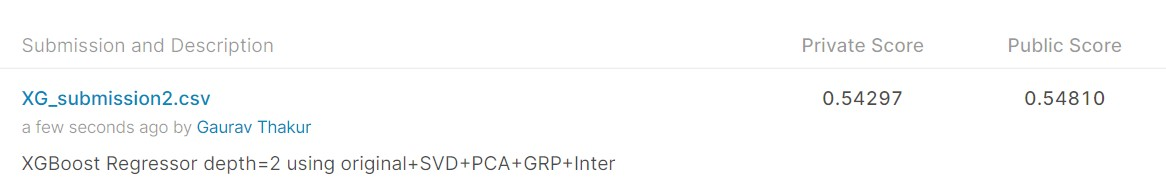

## 6. Stacking Regressor 

### 6.1 Fitting Stacking Regressor on Original + PCA + SVD + Interactive + GRP

In [54]:
filename = 'DTR_PCA_Original_feat_model.sav'
reg1 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded DTR_PCA_Original_feat_model.sav


In [55]:
filename = 'RF_PCA_SVD_Original_feat_model.sav'
reg2 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_PCA_SVD_Original_feat_model.sav


In [58]:
filename = 'RF_PCA_ICA_SVD_Original_feat_model.sav'
reg3 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_PCA_ICA_SVD_Original_feat_model.sav


In [59]:
filename = 'DTR_PCA_SVD_Original_feat_model.sav'
reg4 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded DTR_PCA_SVD_Original_feat_model.sav


In [60]:
filename = 'RF_Combined_New_feat_model.sav'
reg5 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded RF_Combined_New_feat_model.sav


In [61]:
filename = 'XGBR_combined_feat_model.sav'
reg6 = joblib.load(filename)
print(f'Loaded {filename}')

Loaded XGBR_combined_feat_model.sav


In [66]:
%%time
from sklearn.linear_model import LassoLarsCV,Ridge
from mlxtend.regressor import StackingCVRegressor

ridge_reg =  Ridge(random_state=42, fit_intercept=False, alpha=0)
stacked_model = StackingCVRegressor(regressors=(reg1,reg2,reg3,reg4,reg5,reg6),                           
                                        meta_regressor=ridge_reg,                            
                                        use_features_in_secondary = False, refit=True, cv=10,n_jobs= 4) 

stacked_model.fit(combined_train_new, y_train)

CPU times: total: 1min 31s
Wall time: 4min 50s


StackingCVRegressor(cv=10,
                    meta_regressor=Ridge(alpha=0, fit_intercept=False,
                                         random_state=42),
                    n_jobs=4,
                    regressors=(DecisionTreeRegressor(max_depth=3,
                                                      min_samples_leaf=5,
                                                      min_samples_split=500),
                                RandomForestRegressor(max_depth=5,
                                                      min_samples_leaf=10,
                                                      min_samples_split=5,
                                                      n_estimators=500),
                                RandomForestRegressor(max_depth=30,
                                                      min_samples_leaf=50,
                                                      n_estimators=5...
                                             eval_metric=None, gamma=1,
                 

#### 6.1.1 Getting R2 score on Combined new using Stacking Regressor

In [67]:
pred_train_stack = stacked_model.predict(combined_train_new)
train_score_stack = r2_score(y_train, pred_train_stack)
print(f"For Stacked model Train R2 = {train_score_stack}")
pred_cv_stack = stacked_model.predict(combined_cv_new)
cv_score_stack = r2_score(y_cv, pred_cv_stack)
print(f"For Stacked model CV R2 = {cv_score_stack}") 

For Stacked model Train R2 = 0.6461503151337606
For Stacked model CV R2 = 0.6009208246164991


#### 6.1.2 Training Stacking Regressor on Full Train dataset and saving the model for submission

In [68]:
Train_plus_Cv = np.vstack((combined_train_new,combined_cv_new))

Y_train_plus_cv = np.vstack((y_train.values.reshape(-1,1), y_cv.values.reshape(-1,1)))


ridge_reg =  Ridge(random_state=42, fit_intercept=False, alpha=0)
stacked_model = StackingCVRegressor(regressors=(reg1,reg2,reg3,reg4,reg5,reg6),                           
                                        meta_regressor=ridge_reg,                            
                                        use_features_in_secondary = False, refit=True, cv=10)


stacked_model.fit(Train_plus_Cv, Y_train_plus_cv)

filename = 'Stacked_combined_new_feat_model.sav'
stacked_model = joblib.dump(stacked_model, filename)
print(f'Saved {filename}')

Saved Stacked_combined_new_feat_model.sav


In [69]:
filename = 'Stacked_combined_new_feat_model.sav'
stacked_model = joblib.load(filename)
print(f'Loaded {filename}')

pred_train_full_stack = stacked_model.predict(Train_plus_Cv)
train_score_full_stack = r2_score(Y_train_plus_cv, pred_train_full_stack)
print('*'*100)
print(f"For Stacked model Train R2 = {train_score_full_stack}")

Loaded Stacked_combined_new_feat_model.sav
****************************************************************************************************
For Stacked model Train R2 = 0.6410966971571447


In [71]:
pred_test_full_stack = stacked_model.predict(combined_test_new)
submission_stacked = pd.read_csv('sample_submission.csv')
submission_stacked['y'] = pred_test_full_stack
submission_stacked.to_csv(f'sample_submission_Stacked_Combined_new.csv', index=False)
submission_stacked.head()

ID           y
0   1   78.327665
1   2   94.312471
2   3   78.949554
3   4   78.291162
4   5  111.607173

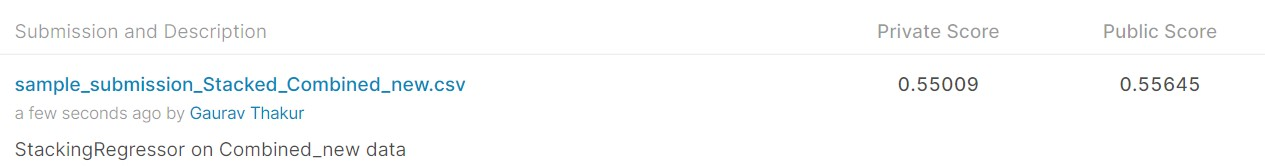

Private Test Score of Stacked Regressor is 0.55009 which stands in top 28.5% of the participants in the leaderboard

## 9. Summary

In [72]:
##### from prettytable import PrettyTable,ALL
from prettytable import PrettyTable,ALL

x = PrettyTable()
x.hrules = ALL
x.field_names = ['No',"Features used With Original Data", "Model", "Hyper Parameters","Train R2", " CV R2", 'FUll Train R2']

x.add_row([1,"\n Original", "Linear Regression", 'Default',0.6389,-1.89e+20,'NA'])
x.add_row([2,"\n Original + PCA", "Linear Regression", 'Default',0.6393,-1.84e+20,'NA'])
x.add_row([3,"\n Original", "SVR", 'Kernel: RBF \n Gamma : 0.0001 \n C: 1000 ',0.60335,0.54543,0.59784])
x.add_row([4,"\n Original + PCA", "SVR", 'Kernel: RBF \n Gamma : 0.0001 \n C: 1000 ',0.60585,0.46931,0.60005])
x.add_row([5,"\n Original", "DecisionTree Reg.", 'BEST MAX DEPTH: 10 \n BEST SAMPLE_SPLIT: 500 \n BEST SAMPLE_LEAF: 10 ',0.63113,0.60189,0.62817])
x.add_row([6,"\n Original + PCA", "DecisionTree Reg.", 'BEST MAX DEPTH: 3 \n BEST SAMPLE_SPLIT: 500 \n BEST SAMPLE_LEAF: 5 ',0.61628,0.59729,0.61244])
x.add_row([7,"\n Original + PCA + SVD", "DecisionTree Reg.", 'BEST MAX DEPTH: 3 \n BEST SAMPLE_SPLIT: 150 \n BEST SAMPLE_LEAF: 50 ',0.61702,0.59735,0.61309])
x.add_row([8,"\n Original + PCA + ICA", "DecisionTree Reg.", 'BEST MAX DEPTH: 3 \n BEST SAMPLE_SPLIT: 500 \n BEST SAMPLE_LEAF: 50 ',0.61623,0.59695,0.61246])
x.add_row([9,"\n Original", "RandomForest Reg.", 'BEST MAX DEPTH: 5 \n BEST N_ESTIMATORS: 500 \n BEST SAMPLE_SPLIT: 5 \n BEST SAMPLE_LEAF: 10 ',0.63765,0.59157, 0.63257])
x.add_row([10,"\n Original + PCA", "RandomForest Reg.", 'BEST MAX DEPTH: 5 \n BEST N_ESTIMATORS: 500 \n BEST SAMPLE_SPLIT: 5 \n BEST SAMPLE_LEAF: 10 ',0.64428,0.59091, 0.63763])
x.add_row([11,"\n Original + PCA + SVD", "RandomForest Reg.", 'BEST MAX DEPTH: 5 \n BEST N_ESTIMATORS: 500 \n BEST SAMPLE_SPLIT: 5 \n BEST SAMPLE_LEAF: 10 ',0.65551,0.59630,  0.64686])
x.add_row([12,"\n Original + PCA + ICA", "RandomForest Reg.", 'BEST MAX DEPTH: 3 \n BEST N_ESTIMATORS: 200 \n BEST SAMPLE_SPLIT: 5 \n BEST SAMPLE_LEAF: 20 ',0.62111,0.59008,  0.61555])
x.add_row([13,"\n Original + PCA + ICA + SVD", "RandomForest Reg.", 'BEST MAX DEPTH: 30 \n BEST N_ESTIMATORS: 50 \n BEST SAMPLE_SPLIT: 2 \n BEST SAMPLE_LEAF: 50 ', 0.66389,0.59612, 0.66268])
x.add_row([14,"\n Original + PCA + ICA + SVD \n + Interactive + GRP", "RandomForest Reg.", 'BEST MAX DEPTH: 25 \n BEST N_ESTIMATORS: 500 \n BEST SAMPLE_SPLIT: 5 \n BEST SAMPLE_LEAF: 50 ',  0.66627,0.59391,  0.66515])
x.add_row([15,"\n Original + PCA + ICA + SVD \n + More Interactive + GRP", "RandomForest Reg.", 'BEST MAX DEPTH: 3 \n BEST N_ESTIMATORS: 30 \n BEST SAMPLE_SPLIT: 30 \n BEST SAMPLE_LEAF: 20 ',  0.62543, 0.59625,  0.62049])
x.add_row([16,"\n Original + PCA + SVD + \n Interactive + GRP", "XGBoost Reg.", 'LEARNING RATE: 0.05 \n BEST MAX DEPTH: 2 \n BEST N_ESTIMATORS: 150 \n COL_SAMPLE_BYTREE: 0.5 \n BEST SUB_SAMPLE: 0.9 \n BEST REG_ALPHA" 0.1 \n BEST GAMMA: 0.01 ', 0.65669,0.59553,  0.64772])
x.add_row([17,"Original + PCA + SVD + \n Interactive + GRP +\n New Interactive", "Stacking Reg. \n MODEL6+MODEL7+ \n MODEL11+MODEL13+\n MODEL15+MODEL16 ", 'Combined Model params ', 0.64615, 0.60092,  0.64109])
print(x)

+----+----------------------------------+-------------------+--------------------------+----------+-----------+---------------+
| No | Features used With Original Data |       Model       |     Hyper Parameters     | Train R2 |    CV R2  | FUll Train R2 |
+----+----------------------------------+-------------------+--------------------------+----------+-----------+---------------+
| 1  |                                  | Linear Regression |         Default          |  0.6389  | -1.89e+20 |       NA      |
|    |             Original             |                   |                          |          |           |               |
+----+----------------------------------+-------------------+--------------------------+----------+-----------+---------------+
| 2  |                                  | Linear Regression |         Default          |  0.6393  | -1.84e+20 |       NA      |
|    |          Original + PCA          |                   |                          |          |     